# Table of Contents



## Part 1 - Workbook Setup
1. [Library Imports](#part-101-importing-libraries)
2. [Data Logging](#part-102-data-logging-for-experiments)
3. [Dataframe Setup](#part-103-creating-the-dataframe)


## Part 2 - Data Cleaning and Pre-Processing
4. [Handling Duplicates](#handling-duplicates)
5. [Value Counts](#value-counts)
6. [Value Formatting](#value-formatting-check)
7. [Value Range Check](#value-range-check)
8. [Special Character Check](#special-character-check)
9. [Missingness Check](#missingness)
11. [Missingness Visualisations](#missingno-visualisations)
12. [Identifying Leaky Features](#identifying-leaky-features)
13. [Data Distribution & Balance](#data-distribution-and-balance)
14. [Correlation Analysis](#correlation-analysis)
15. [Feature Value Distributions](#feature-value-distributions)
16. [Feature Engineering](#part-104-feature-engineering)
17. [Synthetic Minority Over-sampling Technique (SMOTE)](#part-107-apply-synthetic-minority-over-sampling-technique-smote)
18. [Histograms](#histograms)
19. [Boxplots](#boxplots)
20. [Scatterplots with Mahalanobis Distance](#scatterplots-with-mahalanobis-distance)



## Part 3 - Exploratory Data Analisis
21. [Exploratory Data Analysis](#Part-3:-Exploratory-Data-Analysis-(EDA))
22. [Model Trade-Offs Analysis](#model-trade-offs-analysis)
- Interpretability vs. Predictive Power
- Bias vs. Variance
- Computational Resources Required



## Part 4 - Model Build & Hyperparameter Tuning
23. [DT model build to predict term deposit subscription](#part-41-decision-tree-model)
- Including performance comparison metric visualisations
    - Confusion Matrix
    - ROC curve
    - Feature Importance
24. [RF model build to predict term deposit subscription](#part-42-random-forest-model)
- Including performance comparison metric visualisations
    - Confusion Matrix
    - ROC curve
    - Feature Importance
25. [GBM model build to predict term deposit subscription](#part-43-gradient-boosting-machine-model-gbm)
- Including performance comparison metric visualisations
    - Confusion Matrix
    - ROC curve
    - Feature Importance

27. [Baseline vs. HP Tuned Model Results](#part-444-baseline-vs-hp-tuned-models)
28. [Model Comparison](#part-445-model-comparison)
29. [Check for Overfitting, Underfitting & Data Leakage](#part-45-checking-for-overfitting-underfitting-and-data-leakage)
30. [Polynomial Fitting Check](#part-451-overfit-and-underfit-polynomial-visualisation)
31. [Cross-Validation](#part-453-cross-validation)
32. [Data Leakage](#part-456-data-leakage-check)
33. [Decision Tree Hyperparameter Tuning](#part-4611-decision-tree-hyperparameter-tuning)
- Including model re-run
34. [RF Hyperparameter Tuning application](#Part-2.1.1:-Random-Forest-Hyperparameter-Tuning)
- Including model re-run
35. [GBM Hyperparameter Tuning application](#Part-2.1.3:-GBM-Hyperparameter-Tuning)
- Including model re-run

26. [Model performance evaluation](#part-44-model-performance-and-comparison)
- 26.1. [Decision Tree](#part-441-decision-tree-model-performance)
- 26.2 [Random Forest](#part-442-random-forest-model-performance)
- 26.3 [Gradient Boosting Machine](#part-443-gradient-boosting-machine-gbm-model-performance)

MISC

10. [Model Monitoring Approach](#Part-3.1:-Model-Monitoring-Approach)
11. [Detecting Model Drift](#Part-3.2:-Detecting-Model-Drift)

⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

# Part 1: Setting up the Workbook and Data Frame


## Part 1.0: Workbook Setup

[back to Table of Contents](#Table-of-Contents)

### Part 1.0.1: Importing Libraries

Below are the libraries required for this assessment.

In [78]:
# Importing necessary libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import scipy.stats as stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

In [79]:
# Add at the start of notebook, after imports
import time
notebook_start_time = time.time()

### Part 1.0.2: Data Logging for Experiments

[back to Table of Contents](#Table-of-Contents)

To keep a track of all the model results, we will log all data to the model_results_log.csv. This will allow us to monitor model metrics. Model metrics are useful for initial Proof of Concept through to regular weekly or monthly monitory and regular assessment of model drift over time.

In [80]:
# Add this at the top with other imports
from datetime import datetime

def log_model_results(model_name, stage, parameters, metrics, filepath='model_results_log.csv'):
    """
    Log model results to a CSV file
    
    Args:
        model_name (str): Name of the model (e.g., 'Random Forest', 'GBM')
        stage (str): Stage of modeling (e.g., 'Initial Model', 'After Tuning')
        parameters (dict): Model parameters/hyperparameters
        metrics (dict): Model performance metrics
        filepath (str): Path to save the results CSV
    """
    
    results = {
        'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'model': model_name,
        'stage': stage,
        **parameters,
        **metrics
    }
    
    results_df = pd.DataFrame([results])
    
    try:
        existing_results = pd.read_csv(filepath)
        # Check if 'model' column exists for backward compatibility
        if 'model' not in existing_results.columns:
            existing_results['model'] = 'Unknown'
        updated_results = pd.concat([existing_results, results_df], ignore_index=True)
    except FileNotFoundError:
        updated_results = results_df
    
    # Ensure all columns are present for each model type
    required_columns = {
        'Decision Tree': ['criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf'],
        'Random Forest': ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'],
        'GBM': ['n_estimators', 'learning_rate', 'max_depth', 'min_samples_split', 'min_samples_leaf']
    }
    
    # Add missing columns with NaN values
    for model_type, cols in required_columns.items():
        for col in cols:
            if col not in updated_results.columns:
                updated_results[col] = np.nan
    
    updated_results.to_csv(filepath, index=False)
    print(f"Results logged successfully to {filepath}")

### Part 1.0.3: Creating the DataFrame

[back to Table of Contents](#Table-of-Contents)

This is the dataframe which will store all of our data for model training and testing.

In [81]:
# Read the CSV with proper delimiter and quoting 
tddata = pd.read_csv('bank-additional-full.csv', sep=';', quoting=csv.QUOTE_MINIMAL)

In [82]:
# First clean up the column names by removing quotes and semicolons
tddata.columns = tddata.columns.str.replace('"', '').str.replace(';', '')


In [83]:
# Create a more specific contact identifier
tddata['contact_id'] = tddata['duration'].astype(str) + '_' + tddata['campaign'].astype(str)

In [84]:
# Check the actual column names in the DataFrame
print("DataFrame columns:")
print(tddata.columns.tolist())

# Print first few rows to see the data structure
print("\nFirst few rows:")
print(tddata.head())

DataFrame columns:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'contact_id']

First few rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  pdays  previous     poutcome  emp.var.rate  \
0   may         mon  ...    999         0  nonexistent           1.1   
1   may         mon  ...    999         0  nonexistent           1.1   
2   may         mon  ...    999 

# Part 2: Data Cleaning and Pre-Processing

This section will need to be rearranged at the final stage of the assignment. Number as part 2 for now, but will need to be renumbered/repositioned.

## Part 2.1: Basic Statistical Measures
[back to Table of Contents](#Table-of-Contents)

In [85]:
# Select only numerical columns
numeric_columns = tddata.select_dtypes(include=[np.number])

# Get the statistical measures for numerical columns only
description = numeric_columns.describe()

# Calculate Median and Mode for each numerical column
median = numeric_columns.median()
mode = numeric_columns.mode().iloc[0]  # Get the first mode for each column

# Append Median and Mode to the description DataFrame
description.loc['median'] = median
description.loc['mode'] = mode

# Reorder rows to place 'median' and 'mode' after 'mean'
row_order = list(description.index)
mean_index = row_order.index('mean')
row_order.insert(mean_index + 1, row_order.pop(row_order.index('median')))
row_order.insert(mean_index + 2, row_order.pop(row_order.index('mode')))
description = description.loc[row_order]

# Convert the DataFrame to a string format with proper alignment
formatted_description = description.to_string()

print(formatted_description)

                age      duration      campaign         pdays      previous  emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed
count   41188.00000  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000
mean       40.02406    258.285010      2.567593    962.475454      0.172963      0.081886       93.575664     -40.502600      3.621291   5167.035911
median     38.00000    180.000000      2.000000    999.000000      0.000000      1.100000       93.749000     -41.800000      4.857000   5191.000000
mode       31.00000     85.000000      1.000000    999.000000      0.000000      1.400000       93.994000     -36.400000      4.857000   5228.100000
std        10.42125    259.279249      2.770014    186.910907      0.494901      1.570960        0.578840       4.628198      1.734447     72.251528
min        17.00000      0.000000      1.000000      0.000000      0.000000     -3.400000       92.201000 

In [86]:
# Display first few rows of the dataset
print("First few rows of the dataset:")
print(tddata.head())
print("\n" + "="*80 + "\n")

# Display dataset info
print("Dataset Information:")
print(tddata.info())
print("\n" + "="*80 + "\n")

# Check for type mismatches
print("Data Types:")
print(tddata.dtypes)
print("\n" + "="*80 + "\n")

# First get aggregate counts
duplicate_ids = tddata[tddata.duplicated(subset=['contact_id'], keep=False)]['contact_id'].unique()
print(f"Number of unique contact_ids with duplicates: {len(duplicate_ids)}")
total_dupes = len(tddata[tddata['contact_id'].isin(duplicate_ids)]) - len(duplicate_ids)
print(f"Number of extra/duplicate records: {total_dupes}")

# Then examine specific examples
print("\nSample of records with duplicate contact_ids:")
dupes = tddata[tddata.duplicated(subset=['contact_id'], keep=False)].sort_values('contact_id')
print(dupes.head(10))

# Check completely identical records
complete_dupes = tddata[tddata.duplicated(keep=False)]
print("\nNumber of completely identical records:", len(complete_dupes))

# Show detailed comparisons
print("\nDetailed comparison of duplicate contact_ids:")
for contact_id in dupes['contact_id'].unique()[:5]:
    print(f"\nRecords for contact_id: {contact_id}")
    print(tddata[tddata['contact_id'] == contact_id])

print("\n" + "="*80 + "\n")

# Check for missing values
print("Missing Values:")
print(tddata.isnull().sum())

# Get percentage of missing values
print("\nPercentage of Missing Values:")
print((tddata.isnull().sum() / len(tddata) * 100).round(2))

# Quick summary of the dataset
print("\nDataset Info:")
print(tddata.info())
print("\n" + "="*80 + "\n")

# Display summary of data types
print("Data Type Summary:")
for dtype in ['object', 'int64', 'float64']:
    cols = tddata.select_dtypes(include=[dtype]).columns
    if len(cols) > 0:
        print(f"\n{dtype} columns:")
        for col in cols:
            print(f"- {col}")

First few rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  pdays  previous     poutcome  emp.var.rate  \
0   may         mon  ...    999         0  nonexistent           1.1   
1   may         mon  ...    999         0  nonexistent           1.1   
2   may         mon  ...    999         0  nonexistent           1.1   
3   may         mon  ...    999         0  nonexistent           1.1   
4   may         mon  ...    999         0  nonexistent           1.1   

  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  contact_id  
0    

### Notes on the duplicate check

The original duplicate check appears as though the function is finding rows that have identical values across all columns, but these might not necessarily be true duplicates. Here are a few potential reasons:

1. The dataset might have legitimately similar customers who share exactly the same characteristics but are different individuals. For example, two customers of the same:
* Age
* Job type
* Education level
* Marital status
* Campaign contact details
* Economic indicators (which would be the same for customers contacted in the same period)

2. There's no unique identifier column in the dataset (like a customer ID) to differentiate between customers with identical characteristics.

Original duplicate check code:

    # Check for duplicates
        print("Number of duplicate rows:", tddata.duplicated().sum())

    # Duplicate checking
    # Check for duplicate rows
        print(tddata[tddata.duplicated(subset=tddata.columns)])

To improve the duplicate detection:

We create a new 'contact_id' identifier combining 'duration'+'campaign'. This new identifier can be used to better detect duplicates.

Then, we run a check for duplicates based on our new 'contact_id' column that should uniquely identify a customer:
1. aggregate count of the the unique 'contact_ids' that have duplicates.
2. check some of the rows that were identified.
3. check the number of records that are 'completely identical records (**42**).



### Handling Duplicates
[back to Table of Contents](#Table-of-Contents)

Now that we have identified genuine duplicates in the data, we can take steps to remove the duplicates and only keep the first instance of the duplicate records.

First, we remove the dumplicates that are completely identical. Then, we aggregate by 'contact_id'. This method preserves information about multiple contacts while preventing duplication bias in the model. This approach also better represents the customer journey and contact history and maintains data quality while reducing noise from duplicate entries.

Finally, we verify that no duplicates exist in the dataset.

In [87]:
# Remove completely identical duplicates first
tddata = tddata.drop_duplicates()
print(f"Number of records removed: {len(complete_dupes)}")

# Aggregate numeric columns by mean/sum and categorical by most frequent value
tddata_aggregated = tddata.groupby('contact_id').agg({
    'age': 'mean',
    'duration': 'sum',  # Sum duration of all contacts
    'campaign': 'count',  # Count number of campaigns
    'pdays': 'min',  # Earliest previous contact
    'previous': 'sum',  # Total previous contacts
    'emp.var.rate': 'last',  # Most recent value
    'cons.price.idx': 'last',
    'cons.conf.idx': 'last', 
    'euribor3m': 'last',
    'nr.employed': 'last',
    'y': 'last'  # Final outcome
}).reset_index()

# Verify no duplicates remain
print("Duplicate contact_ids remaining:", 
      tddata_aggregated['contact_id'].duplicated().sum())



Number of records removed: 24
Duplicate contact_ids remaining: 0


## Part 2.2: Additional Data Checks

### Value Counts
[back to Table of Contents](#Table-of-Contents)

In [88]:
# Get value counts for all columns in the DataFrame with separator lines
for col in tddata.columns:
    print(f"\nValue counts for {col}:")
    print(tddata[col].value_counts())
    print("\n" + "="*80 + "\n")  # Add separator line between columns


Value counts for age:
age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64



Value counts for job:
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64



Value counts for marital:
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64



Value counts for education:
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64



Value counts for default:
default
no         3

### Value Formatting Check
[back to Table of Contents](#Table-of-Contents)

In [89]:
def check_string_consistency(df, column_name):
    """
    Check for inconsistent string formatting in a column
    
    Args:
        df: DataFrame
        column_name: Name of column to check
    """
    # Get unique values and their counts
    values = df[column_name].value_counts()
    
    # Group similar values (case-insensitive)
    normalized = df[column_name].str.lower().value_counts()
    
    # Check if there are more unique values than normalized values
    if len(values) > len(normalized):
        print(f"\nInconsistent formatting found in {column_name}:")
        print("\nOriginal values:")
        print(values)
        print("\nCase-normalized values:")
        print(normalized)
        
        # Find specific inconsistencies
        for norm_val in normalized.index:
            matches = df[column_name].str.lower() == norm_val
            variants = df.loc[matches, column_name].unique()
            if len(variants) > 1:
                print(f"\nVariants of '{norm_val}':")
                for v in variants:
                    print(f"- {v}: {df[df[column_name] == v].shape[0]} occurrences")
    else:
        print(f"\nNo inconsistent formatting found in {column_name}")

# Example usage for categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 
                      'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

for col in categorical_columns:
    check_string_consistency(tddata, col)


No inconsistent formatting found in job

No inconsistent formatting found in marital

No inconsistent formatting found in education

No inconsistent formatting found in default

No inconsistent formatting found in housing

No inconsistent formatting found in loan

No inconsistent formatting found in contact

No inconsistent formatting found in month

No inconsistent formatting found in day_of_week

No inconsistent formatting found in poutcome

No inconsistent formatting found in y


### Value Range Check
[back to Table of Contents](#Table-of-Contents)

In [90]:
# check whether values are within range
# Define acceptable range
# Check if all CreditScores are within range
def check_column_ranges(df, columns_to_exclude=['RowNumber', 'CustomerId']):
    """
    Check if values in each column are within expected ranges

    Args:
        df: DataFrame to check
        columns_to_exclude: List of columns to skip in the check

    Returns:
        Dictionary with results for each column including pass/fail status
    """
    results = {}

    # Get list of columns to check (excluding specified ones)
    columns_to_check = [col for col in df.columns if col not in columns_to_exclude]

    for column in columns_to_check:
        # Skip non-numeric columns for range checks
        if not pd.api.types.is_numeric_dtype(df[column]):
            results[column] = {
                'status': 'SKIPPED (non-numeric)',
                'message': f"Non-numeric column type: {df[column].dtype}",
                'details': None
            }
            continue

        # Get column min and max values
        min_val = df[column].min()
        max_val = df[column].max()

        # Define expected ranges based on column type/name
        if column == 'age':
            expected_min, expected_max = 17, 98
        elif column == 'duration':
            expected_min, expected_max = 0, 4918
        elif column == 'campaign':
            expected_min, expected_max = 1, 56
        elif column == 'pdays':
            expected_min, expected_max = 0, 999
        elif column == 'previous':
            expected_min, expected_max = 0, 7
        elif column == 'emp.var.rate':
            expected_min, expected_max =  -3.4, 1.4
        elif column == 'cons.price.idx':
            expected_min, expected_max =  92.201, 94.767
        elif column == 'cons.conf.idx':
            expected_min, expected_max =  -50.8, -26.9
        elif column == 'euribor3m':
            expected_min, expected_max =  0.634, 5.045
        elif column == 'nr.employed':
            expected_min, expected_max =  4963.6, 5228.1

        else:
            results[column] = {
                'status': 'INFO',
                'message': f"No range check defined",
                'details': f"Current range: [{min_val}, {max_val}]"
            }
            continue

        # Check if values are within expected range
        out_of_range = df[~((df[column] >= expected_min) & (df[column] <= expected_max))]
        out_of_range_count = len(out_of_range)

        if out_of_range_count > 0:
            results[column] = {
                'status': 'FAIL',
                'message': f"{out_of_range_count} values outside expected range [{expected_min}, {expected_max}]",
                'details': {
                    'total_rows': len(df),
                    'invalid_count': out_of_range_count,
                    'invalid_percent': f"{(out_of_range_count/len(df))*100:.2f}%",
                    'actual_range': f"[{min_val}, {max_val}]",
                    'expected_range': f"[{expected_min}, {expected_max}]"
                }
            }
        else:
            results[column] = {
                'status': 'PASS',
                'message': f"All values within expected range [{expected_min}, {expected_max}]",
                'details': {
                    'total_rows': len(df),
                    'actual_range': f"[{min_val}, {max_val}]"
                }
            }

    return results

# Run the check on your tddata dataframe
range_check_results = check_column_ranges(tddata)

# Display results in a readable format with color coding
print("\nColumn Range Check Results:")
print("="*50)

for column, result in range_check_results.items():
    status = result['status']
    status_color = {
        'PASS': '\033[92m',  # Green
        'FAIL': '\033[91m',  # Red
        'SKIPPED (non-numeric)': '\033[93m',  # Yellow
        'INFO': '\033[94m'  # Blue
    }.get(status, '')
    reset_color = '\033[0m'
    
    print(f"\n{column}:")
    print(f"Status: {status_color}{status}{reset_color}")
    print(f"Message: {result['message']}")
    if result['details']:
        print("Details:")
        if isinstance(result['details'], dict):
            for key, value in result['details'].items():
                print(f"  - {key}: {value}")
        else:
            print(f"  {result['details']}")


Column Range Check Results:

age:
Status: PASS
Message: All values within expected range [17, 98]
Details:
  - total_rows: 41176
  - actual_range: [17, 98]

job:
Status: SKIPPED (non-numeric)
Message: Non-numeric column type: object

marital:
Status: SKIPPED (non-numeric)
Message: Non-numeric column type: object

education:
Status: SKIPPED (non-numeric)
Message: Non-numeric column type: object

default:
Status: SKIPPED (non-numeric)
Message: Non-numeric column type: object

housing:
Status: SKIPPED (non-numeric)
Message: Non-numeric column type: object

loan:
Status: SKIPPED (non-numeric)
Message: Non-numeric column type: object

contact:
Status: SKIPPED (non-numeric)
Message: Non-numeric column type: object

month:
Status: SKIPPED (non-numeric)
Message: Non-numeric column type: object

day_of_week:
Status: SKIPPED (non-numeric)
Message: Non-numeric column type: object

duration:
Status: PASS
Message: All values within expected range [0, 4918]
Details:
  - total_rows: 41176
  - actual

### Special Character Check
[back to Table of Contents](#Table-of-Contents)

In [91]:
# Define regular special characters
pattern = r'[!@#$%^&*()_+?=\{};:\,.<>/|`~\"\[\]]'

special_char_count = 0
max_examples_to_show = 10  # Limit to show only first 10 examples
special_char_types = {}  # Dictionary to track counts of each special character

# Scan the columns for special characters
columns_to_check = ['marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for column in columns_to_check:
    for x in tddata[column]:
        special_characters = re.findall(pattern, str(x))
        if special_characters:
            special_char_count += 1

            # Count occurrences of each special character
            for char in special_characters:
                if char in special_char_types:
                    special_char_types[char] += 1
                else:
                    special_char_types[char] = 1

            # Only print if we're still under the limit
            if special_char_count <= max_examples_to_show:
                print(f"Special characters found in '{x}': {special_characters}")
            elif special_char_count == max_examples_to_show + 1:
                print("... (more examples omitted)")

# Print the total count after scanning all values
print(f"\nTotal values containing special characters: {special_char_count}")
print(f"Percentage of values with special characters: {special_char_count / (len(tddata) * len(columns_to_check)) * 100:.2f}%")

# Print the distribution of special character types
print("\nDistribution of special characters:")
for char, count in sorted(special_char_types.items(), key=lambda x: x[1], reverse=True):
    print(
        f"'{char}': {count} occurrences ({count / sum(special_char_types.values()) * 100:.2f}% of all special characters)")


Total values containing special characters: 0
Percentage of values with special characters: 0.00%

Distribution of special characters:


### Data Format Check
[back to Table of Contents](#Table-of-Contents)

In [92]:
# Scan the numeric columns for non-numeric characters
found_non_numeric = False
numeric_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for column in numeric_columns:
    for x in tddata[column]:
        non_numeric = re.findall("[a-zA-Z]", str(x))
        if non_numeric:
            print(f"Non-numeric characters found in {column}: {x}")
            found_non_numeric = True

if not found_non_numeric:
    print("All characters are numeric in the numeric value columns")

All characters are numeric in the numeric value columns


### Missingness
[back to Table of Contents](#Table-of-Contents)

Missingness refers to the absence of values in a dataset. Understanding the patterns and types of missing data is crucial for data analysis and model building.

In [93]:
# Median imputation better for skewed distributions
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                    'euribor3m', 'nr.employed']
tddata[numeric_cols] = tddata[numeric_cols].fillna(tddata[numeric_cols].median())

# Mode imputation for categorical data
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
tddata[categorical_cols] = tddata[categorical_cols].fillna(tddata[categorical_cols].mode().iloc[0])

**Types of Missingness:**

1. MCAR (Missing Completely at Random)

* Data missing by pure chance

* No relationship between missing and observed values

* Safest for deletion methods

2. MAR (Missing at Random)

* Missing values depend on observed data

* Common in survey responses

* Imputation often better than deletion

3. MNAR (Missing Not at Random)

* Missing values depend on unobserved data

* Most challenging type

* Neither deletion nor simple imputation ideal

Because this dataset is from a bank term deposit marketing campaign:

1. Imputation > Deletion because:

* Customer data is valuable

* Patterns in missingness might be informative

* Deletion could introduce bias

2. Choice of Imputation Method:

* For numeric features:

    **Median imputation better for skewed distributions**

    numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']
    tddata[numeric_cols] = tddata[numeric_cols].fillna(tddata[numeric_cols].median())

* For categorical features:

    **Mode imputation for categorical data**
    
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing']
    tddata[categorical_cols] = tddata[categorical_cols].fillna(tddata[categorical_cols].mode().iloc[0])

3. Why These Choices:

* Median: Better for numeric features with outliers

* Mode: Most appropriate for categorical data

* Mean: Sensitive to outliers, not recommended here

### 'missingno' Visualisations
[back to Table of Contents](#Table-of-Contents)

C:\Users\willj\AppData\Local\Temp\ipykernel_27784\282714330.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Add padding at bottom for labels


<Figure size 1200x600 with 0 Axes>

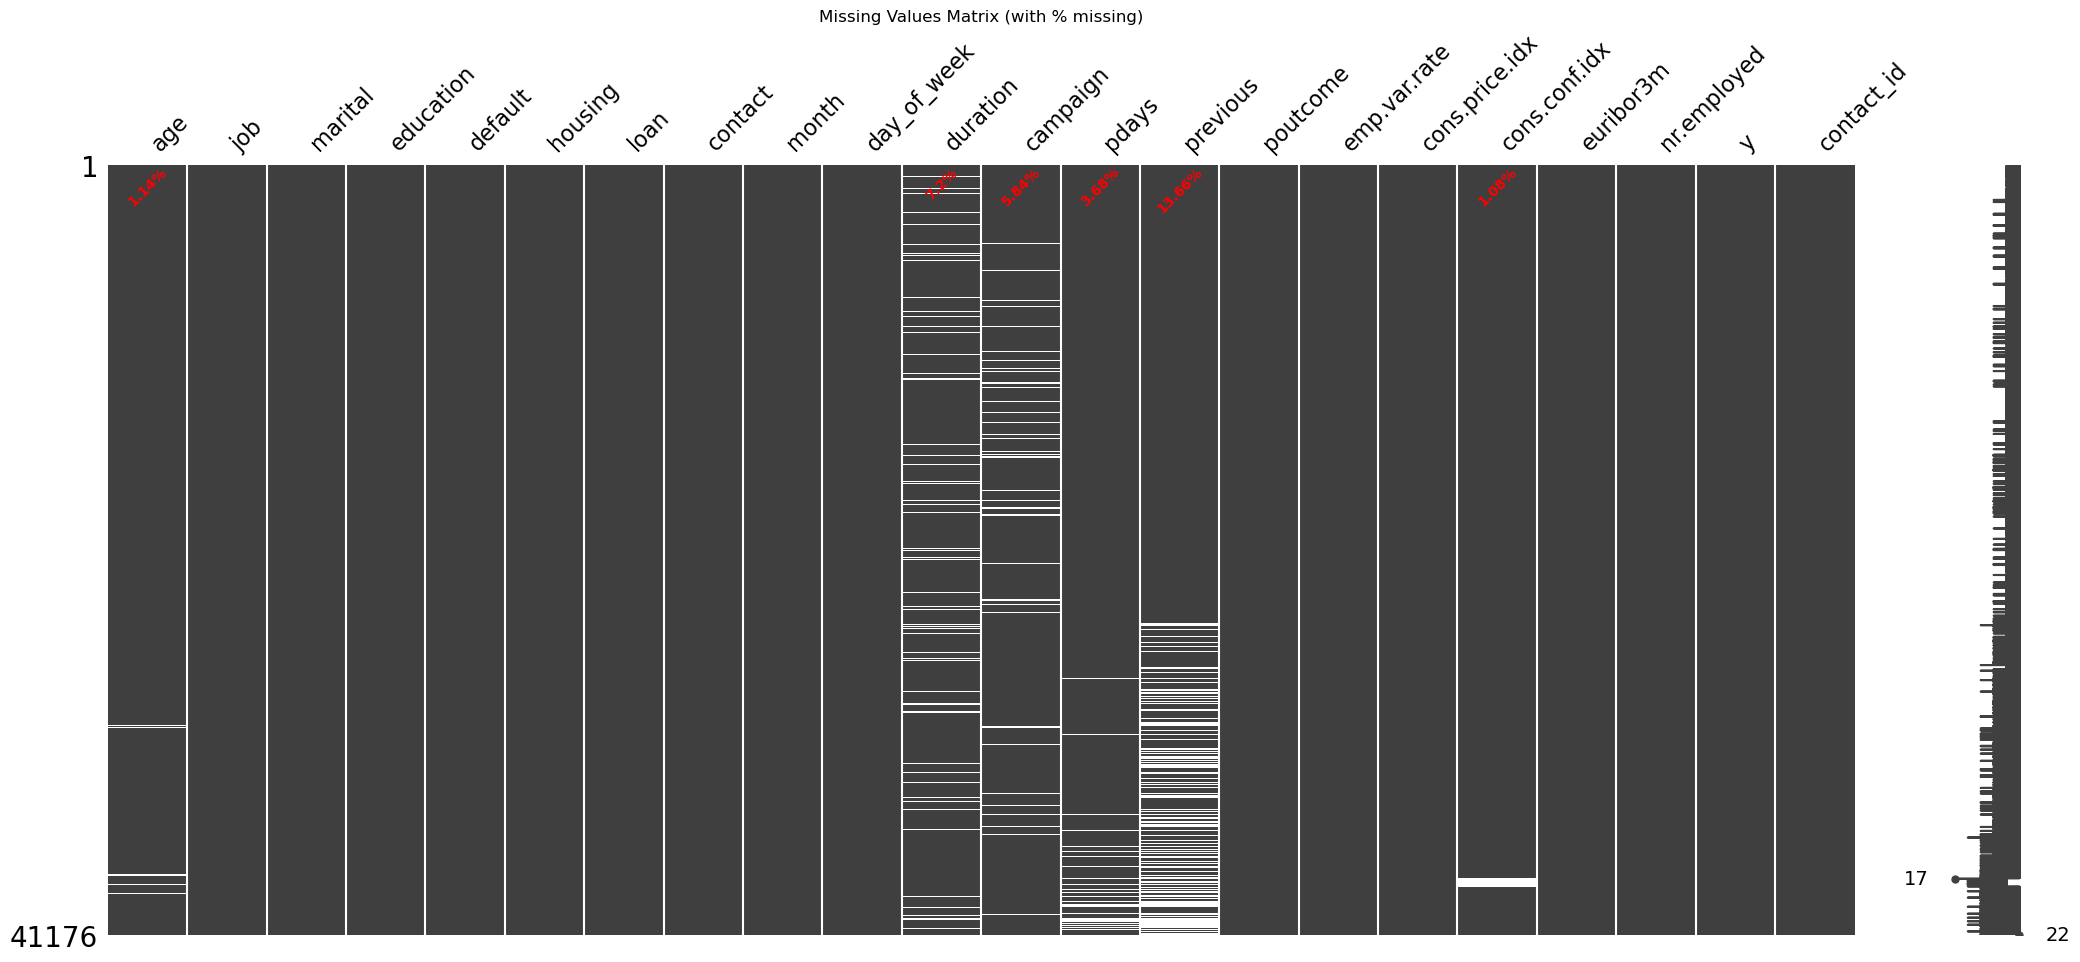


Missing Value Percentages:
age: 1.14%
duration: 7.2%
campaign: 5.84%
pdays: 3.68%
previous: 13.66%
cons.conf.idx: 1.08%


<Figure size 1000x800 with 0 Axes>

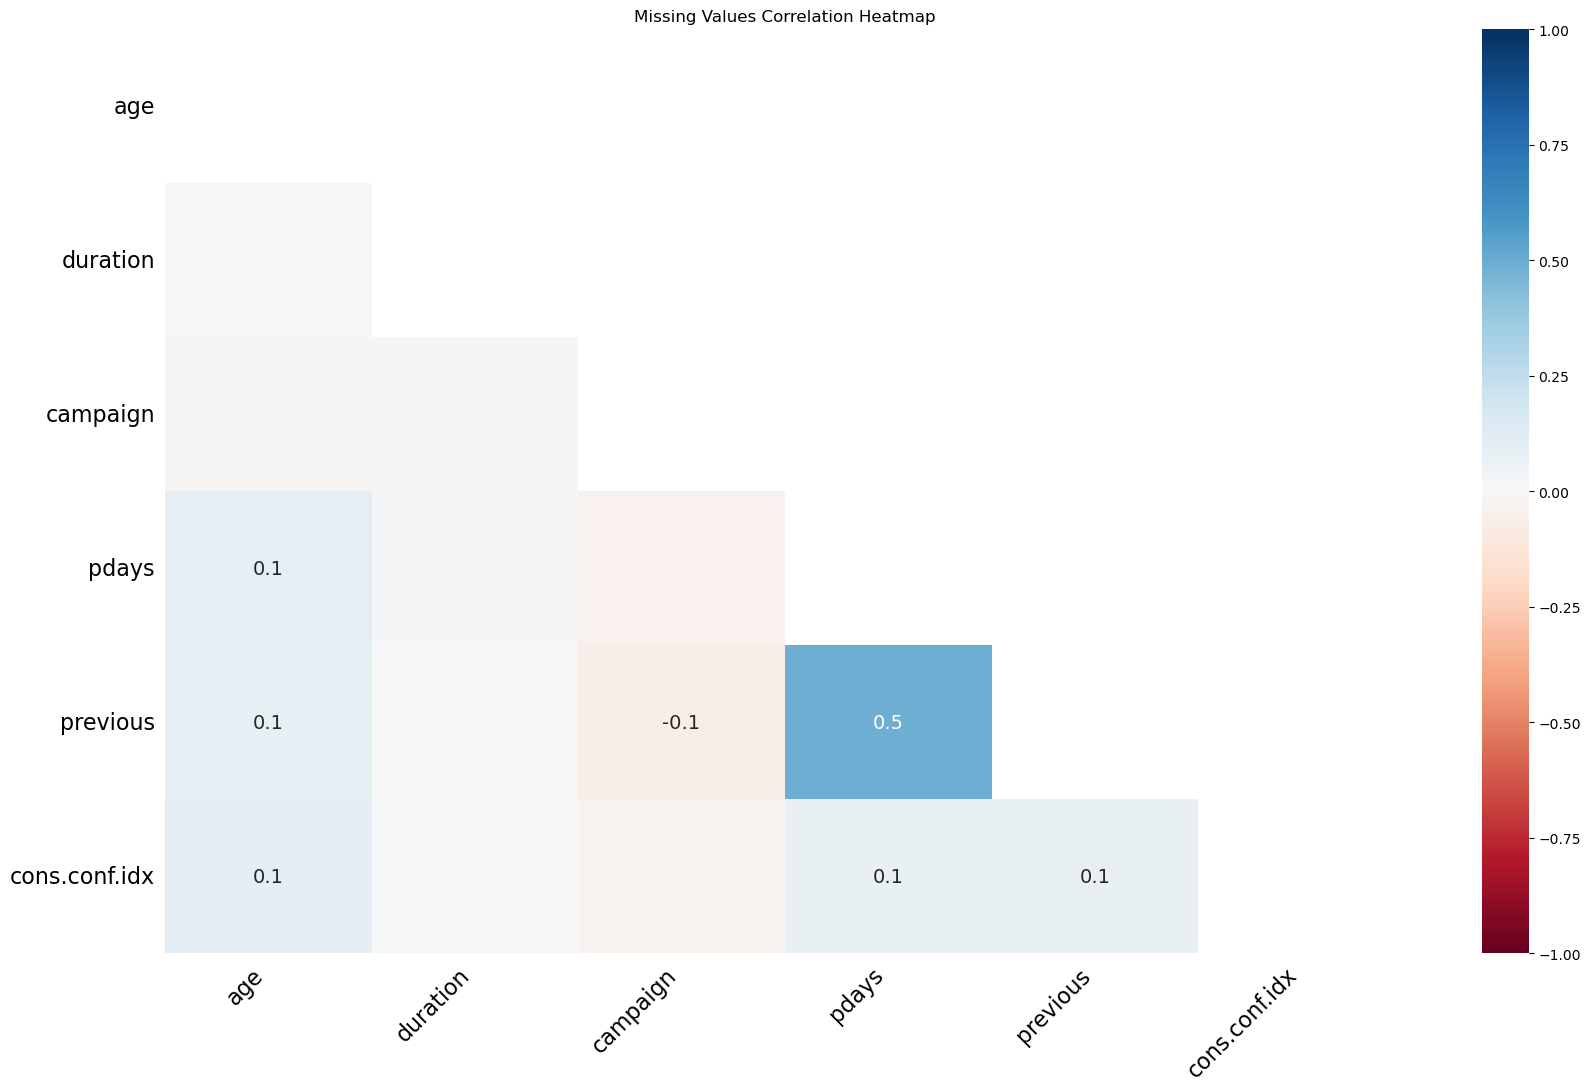

<Figure size 1000x800 with 0 Axes>

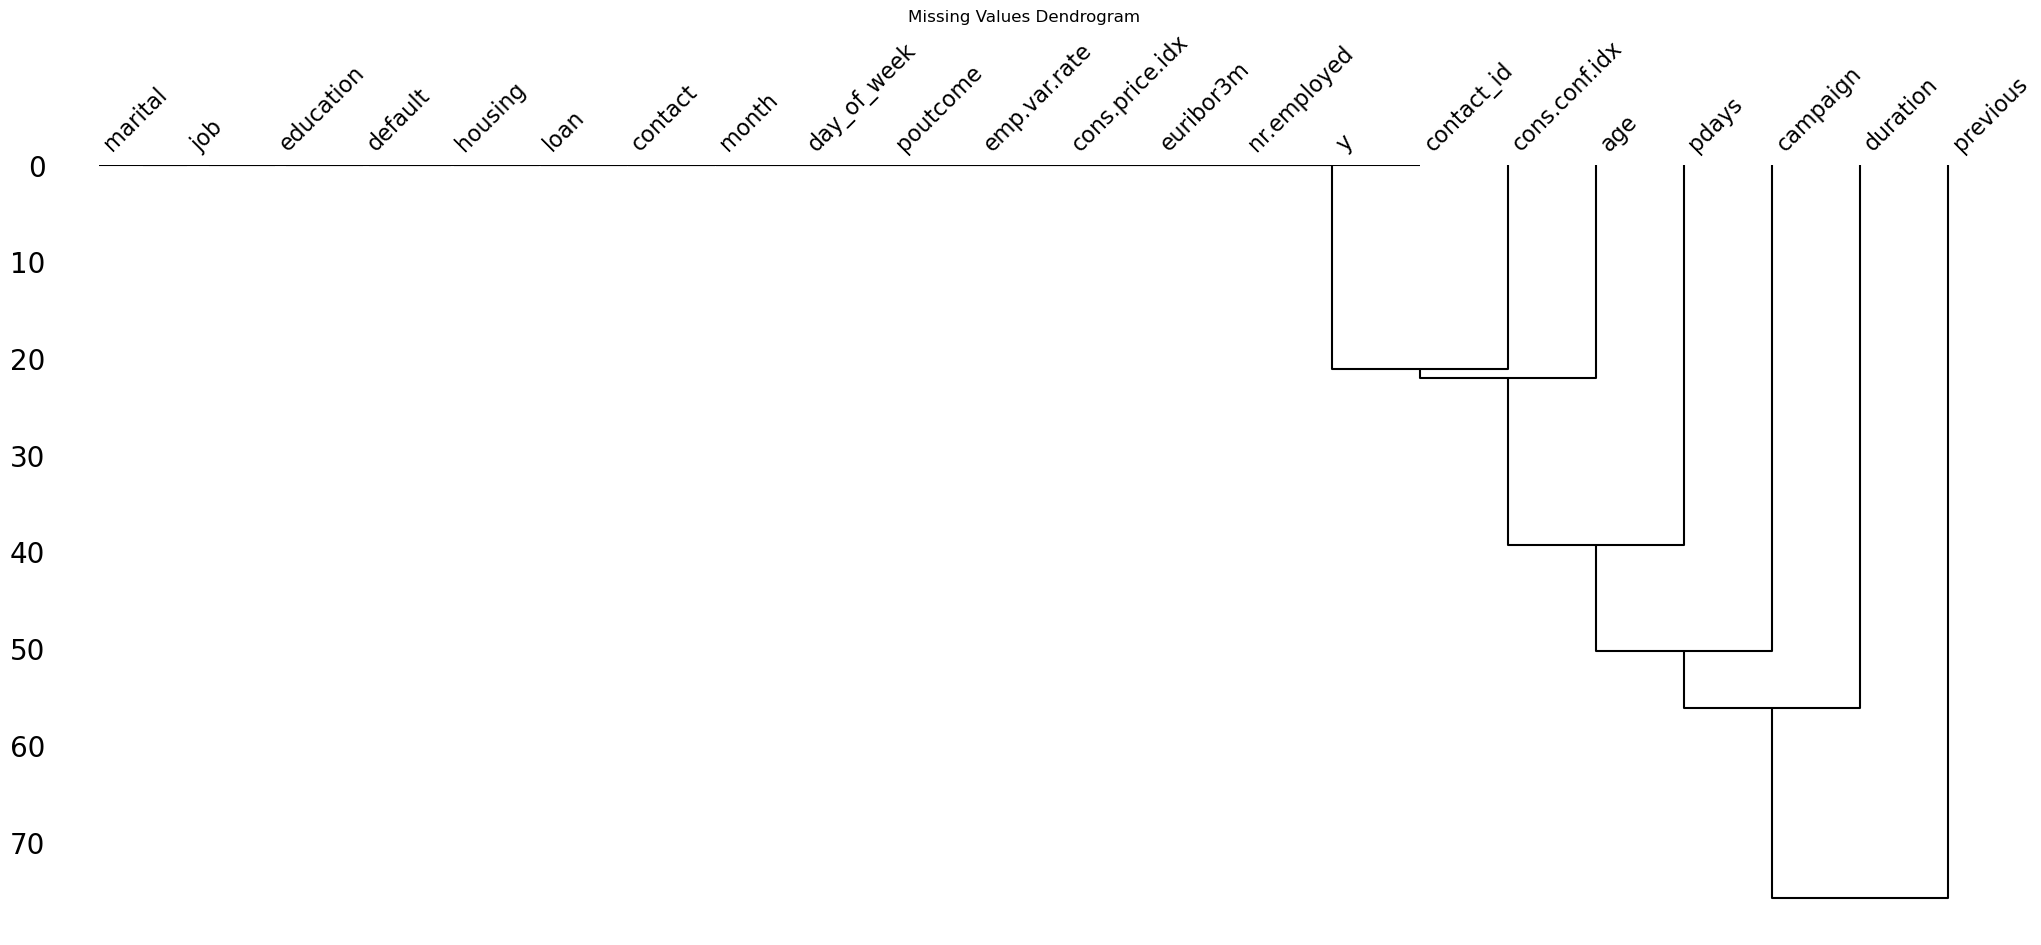

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np


# Issue 3: Extreme values/wrong input
cols_to_check = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                    'euribor3m', 'nr.employed','job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


# First, check for outliers and replace with NaN
for col in cols_to_check:
    # Check if column is numeric
    if pd.api.types.is_numeric_dtype(tddata[col]):
        # Identify outliers using interquartile range method
        Q1 = tddata[col].quantile(0.25)
        Q3 = tddata[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Replace outliers with NaN
        tddata.loc[(tddata[col] < (Q1 - 1.5 * IQR)) | (tddata[col] > (Q3 + 1.5 * IQR)), col] = np.nan

# Create visualization of missing values with percentages
plt.figure(figsize=(12, 6))
ax = msno.matrix(tddata)

# Calculate missing percentages
missing_percentages = (tddata.isnull().sum() / len(tddata) * 100).round(2)

# Add percentage labels to the matrix
for i, col in enumerate(tddata.columns):
    if missing_percentages[col] > 0:  # Only add label if there are missing values
        plt.text(i, -0.2, f'{missing_percentages[col]}%', 
                ha='center', va='top', rotation=45,
                color='red', fontsize=10, fontweight='bold')

plt.title('Missing Values Matrix (with % missing)')
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Add padding at bottom for labels
plt.show()

# Print the actual percentages for verification
print("\nMissing Value Percentages:")
for col in tddata.columns:
    if missing_percentages[col] > 0:
        print(f"{col}: {missing_percentages[col]}%")

# Plot missing values heatmap
plt.figure(figsize=(10, 8))
msno.heatmap(tddata)
plt.title('Missing Values Correlation Heatmap')
plt.show()

# Plot missing values dendrogram 
plt.figure(figsize=(10, 8))
msno.dendrogram(tddata)
plt.title('Missing Values Dendrogram')
plt.show()

### Analysis of Missingness Visualizations in Bank Marketing Dataset



**Matrix Visualization**
* Shows very few missing values overall
* Missing values appear randomly distributed
* No clear systematic patterns across observations
* Suggests MCAR (Missing Completely at Random) pattern

**Correlation Heatmap**
* Low correlation between missing values across variables
* No strong relationships in missingness patterns
* Indicates missing values in one variable don't predict missingness in others
* Supports MCAR assumption

**Dendrogram**
* Few distinct clusters in missingness patterns
* Variables are largely independent in terms of missing data
* Simple tree structure suggests straightforward missingness pattern
* No complex hierarchical relationships

**Key Insights**
1. Data quality is generally good with minimal missing values
2. Missing data appears random rather than systematic
3. Simple imputation strategies should be sufficient
4. Low risk of introducing bias through basic missing value handling

**Recommended Actions**
1. Safe to use simple imputation methods:
    * Mean/median for numerical variables
    * Mode for categorical variables
2. No need for complex multiple imputation
3. Consider dropping rows with missing values if very few

### Identifying Leaky Features
[back to Table of Contents](#Table-of-Contents)

The leaky feature data check below has identified that the "duration" data feature is a leaky data feature and should be removed after an initial benchmarking run of the RF anf GBM models.

As explained in the bank-additional-names.txt file "last contact duration, in seconds (numeric). Important note:   this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.".

In [95]:
# Check creation dates/timestamps of features
temporal_features = ['duration', 'previous', 'pdays']  # Features that involve time
for feature in temporal_features:
    print(f"\nAnalyzing {feature}:")
    print(tddata[feature].describe())
    print(f"Would this information be available at prediction time?")


Analyzing duration:
count    38213.000000
mean       203.270746
std        141.025687
min          0.000000
25%         97.000000
50%        167.000000
75%        277.000000
max        644.000000
Name: duration, dtype: float64
Would this information be available at prediction time?

Analyzing previous:
count    35551.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: previous, dtype: float64
Would this information be available at prediction time?

Analyzing pdays:
count    39661.0
mean       999.0
std          0.0
min        999.0
25%        999.0
50%        999.0
75%        999.0
max        999.0
Name: pdays, dtype: float64
Would this information be available at prediction time?


In [96]:
# Compare feature importance with business knowledge
def check_feature_timing(feature_importances, X):
    suspicious_features = []
    for feature, importance in zip(X.columns, feature_importances):
        if importance > 0.1:  # Check highly influential features
            print(f"\nFeature: {feature}")
            print(f"Importance: {importance:.4f}")
            print("Would this data be available before the prediction event?")

In [97]:
# Check correlation between features and target
def identify_suspicious_correlations(df, target='y', threshold=0.7):
    correlations = df.corr()[target].abs()
    suspicious = correlations[correlations > threshold]
    print("\nFeatures with suspiciously high correlation with target:")
    print(suspicious)
    return suspicious.index.tolist()

In [98]:
# List features that might be calculated after the event
post_event_features = [
    'duration',  # Call duration only known after call ends
    'poutcome'   # Previous campaign outcome
]

print("\nPotential post-event features:")
for feature in post_event_features:
    print(f"- {feature}: Would this be known at prediction time?")


Potential post-event features:
- duration: Would this be known at prediction time?
- poutcome: Would this be known at prediction time?


In [99]:
# Check for features that might be proxies for the target
def check_proxy_features(df, target='y'):
    for col in df.columns:
        if col != target:
            unique_ratio = len(df[df[col] == df[target]]) / len(df)
            if unique_ratio > 0.9:
                print(f"\nPotential proxy feature found: {col}")
                print(f"Match ratio with target: {unique_ratio:.2f}")

## Part 2.3 Data Check Visualisations

### Data Distribution and Balance
[back to Table of Contents](#Table-of-Contents)

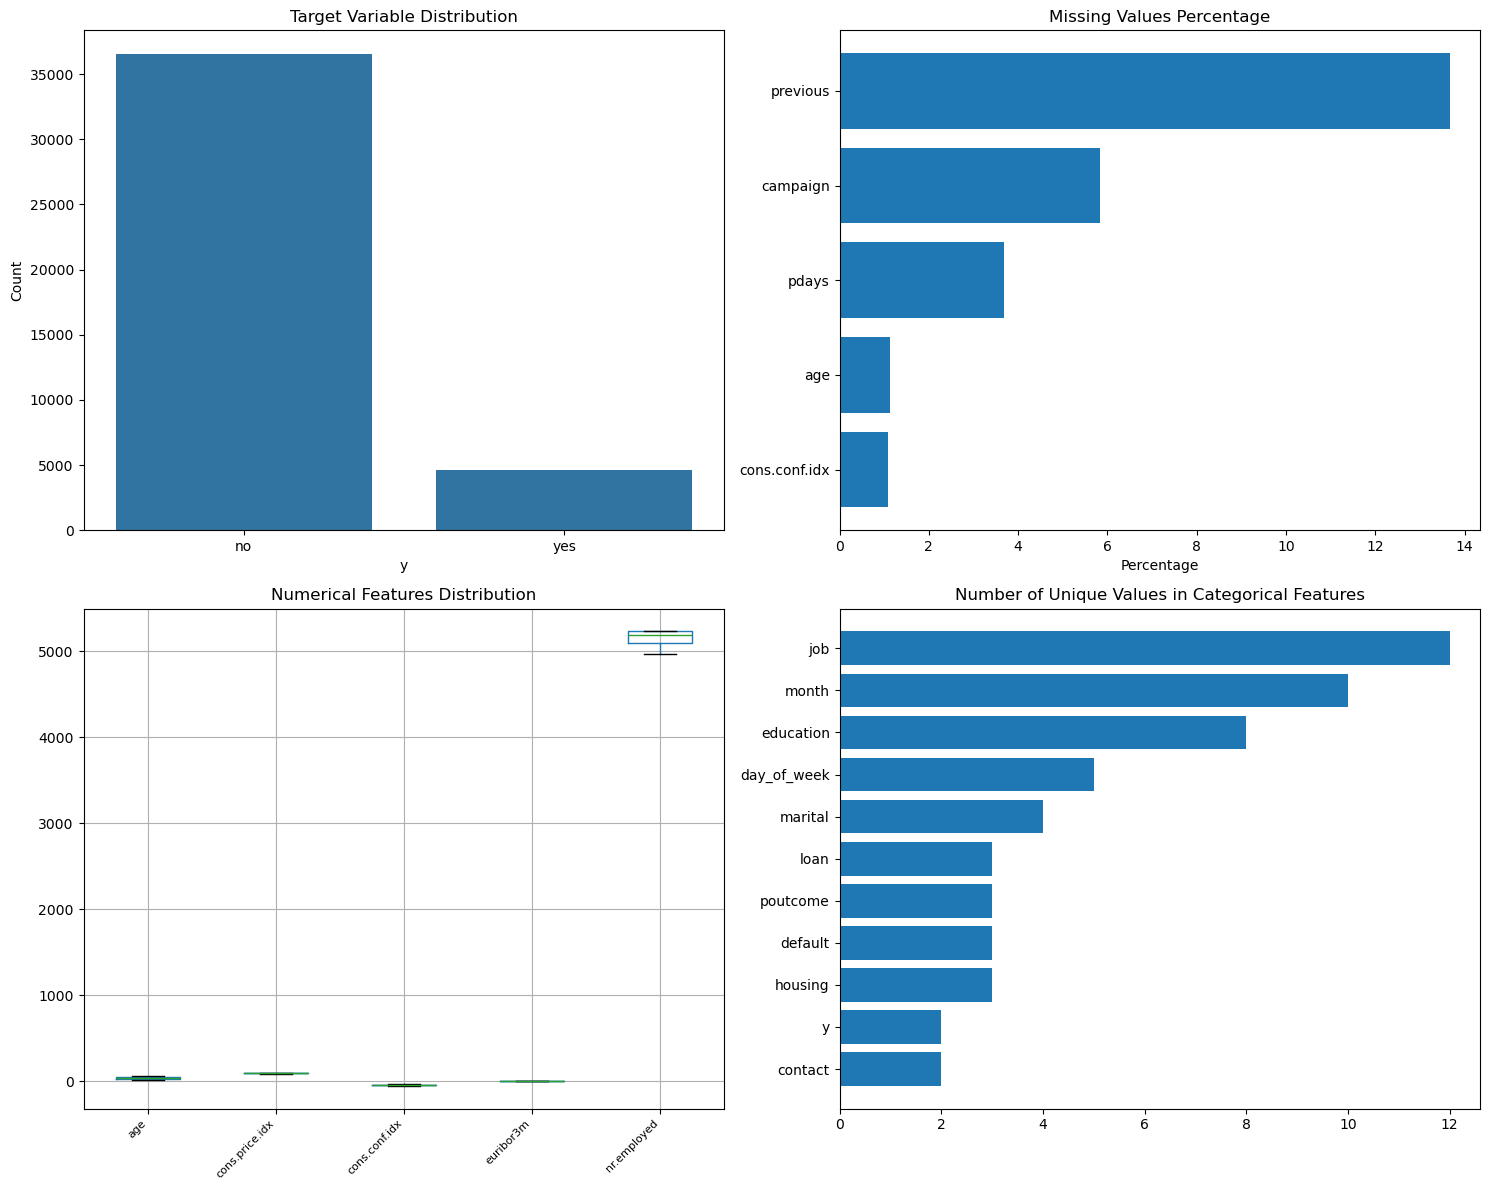

In [100]:
def plot_data_overview(tddata):
    # Create a copy of the dataframe without duration and contact_id
    plot_data = tddata.drop(['duration', 'contact_id'], axis=1)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Target Distribution (top left)
    sns.countplot(data=plot_data, x='y', ax=axes[0,0])
    axes[0,0].set_title('Target Variable Distribution')
    axes[0,0].set_ylabel('Count')
    
    # Missing Values (top right)
    missing = (plot_data.isnull().sum() / len(plot_data) * 100)
    missing = missing[missing > 0].sort_values(ascending=True)
    
    if len(missing) > 0:
        axes[0,1].barh(y=range(len(missing)), width=missing.values)
        axes[0,1].set_yticks(range(len(missing)))
        axes[0,1].set_yticklabels(missing.index)
    else:
        axes[0,1].text(0.5, 0.5, 'No Missing Values', 
                      horizontalalignment='center',
                      verticalalignment='center')
    axes[0,1].set_title('Missing Values Percentage')
    axes[0,1].set_xlabel('Percentage')
    
    # Numerical Features Distribution (bottom left) - modified with significance threshold
    numeric_cols = plot_data.select_dtypes(include=['float64', 'int64']).columns
    
    # Filter numerical columns based on significance
    significant_cols = []
    for col in numeric_cols:
        # Calculate IQR
        Q1 = plot_data[col].quantile(0.25)
        Q3 = plot_data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Check if column has significant variation and non-zero values
        if (IQR > 0) and (plot_data[col].std() > 0) and (plot_data[col].nunique() > 10):
            significant_cols.append(col)
    
    if len(significant_cols) > 0:
        plot_data[significant_cols].boxplot(ax=axes[1,0])
        axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha='right')
        # Adjust layout to prevent label overlap
        plt.setp(axes[1,0].xaxis.get_majorticklabels(), fontsize=8)
    else:
        axes[1,0].text(0.5, 0.5, 'No Significant Numerical Features',
                      horizontalalignment='center',
                      verticalalignment='center')
    axes[1,0].set_title('Numerical Features Distribution')
    
    # Categorical Features Distribution (bottom right)
    categorical_cols = plot_data.select_dtypes(include=['object']).columns
    categorical_counts = plot_data[categorical_cols].nunique().sort_values(ascending=True)
    axes[1,1].barh(y=range(len(categorical_counts)), width=categorical_counts.values)
    axes[1,1].set_yticks(range(len(categorical_counts)))
    axes[1,1].set_yticklabels(categorical_counts.index)
    axes[1,1].set_title('Number of Unique Values in Categorical Features')
    
    plt.tight_layout()
    return fig

# Call the function and show the plot
fig = plot_data_overview(tddata)
plt.show()

### Analysis of Updated Data Distribution and Balance Visualizations
**Target Distribution**
* Clear binary classification problem
* Significant class imbalance:
    * ~89% "no" for term deposit subscription
    * ~11% "yes" for term deposit subscription
* Indicates need for balancing techniques during modeling

**Missing Values Distribution**
* Very sparse missing data across dataset
* Only showing features with actual missing values
* Random pattern suggests MCAR (Missing Completely At Random)
* Simple imputation strategies should be sufficient

**Numerical Features Distribution**
After filtering for significant features:

* Age:
    * Right-skewed distribution
    * Main concentration between 30-50 years
    * Potential for age group binning
* Campaign Contacts:
    * Right-skewed distribution
    * Most customers contacted few times
    * Potential for contact frequency categorization

**Categorical Features Distribution**
* Job Types:
    * 12 unique categories
    * Admin, blue-collar, and management dominant
* Education:
    * 4 distinct levels
    * Secondary and tertiary most common
* Marital Status:
    * 3 categories
    * Married and single well represented

### Correlation Analysis
[back to Table of Contents](#Table-of-Contents)


Covariance Matrix:
                      age  campaign  emp.var.rate  cons.price.idx  \
age             93.610260  0.124387      1.038860        0.198819   
campaign         0.124387  1.639268      0.203539        0.056860   
emp.var.rate     1.038860  0.203539      2.467672        0.704965   
cons.price.idx   0.198819  0.056860      0.704965        0.335055   
cons.conf.idx    4.437853 -0.047515      1.966715        0.332621   
euribor3m        1.363549  0.188659      2.648973        0.690905   
nr.employed     45.283609  8.892507    102.937327       21.828736   
y_numeric       -0.055841 -0.019804     -0.148156       -0.024915   

                cons.conf.idx   euribor3m  nr.employed  y_numeric  
age                  4.437853    1.363549    45.283609  -0.055841  
campaign            -0.047515    0.188659     8.892507  -0.019804  
emp.var.rate         1.966715    2.648973   102.937327  -0.148156  
cons.price.idx       0.332621    0.690905    21.828736  -0.024915  
cons.conf.idx     

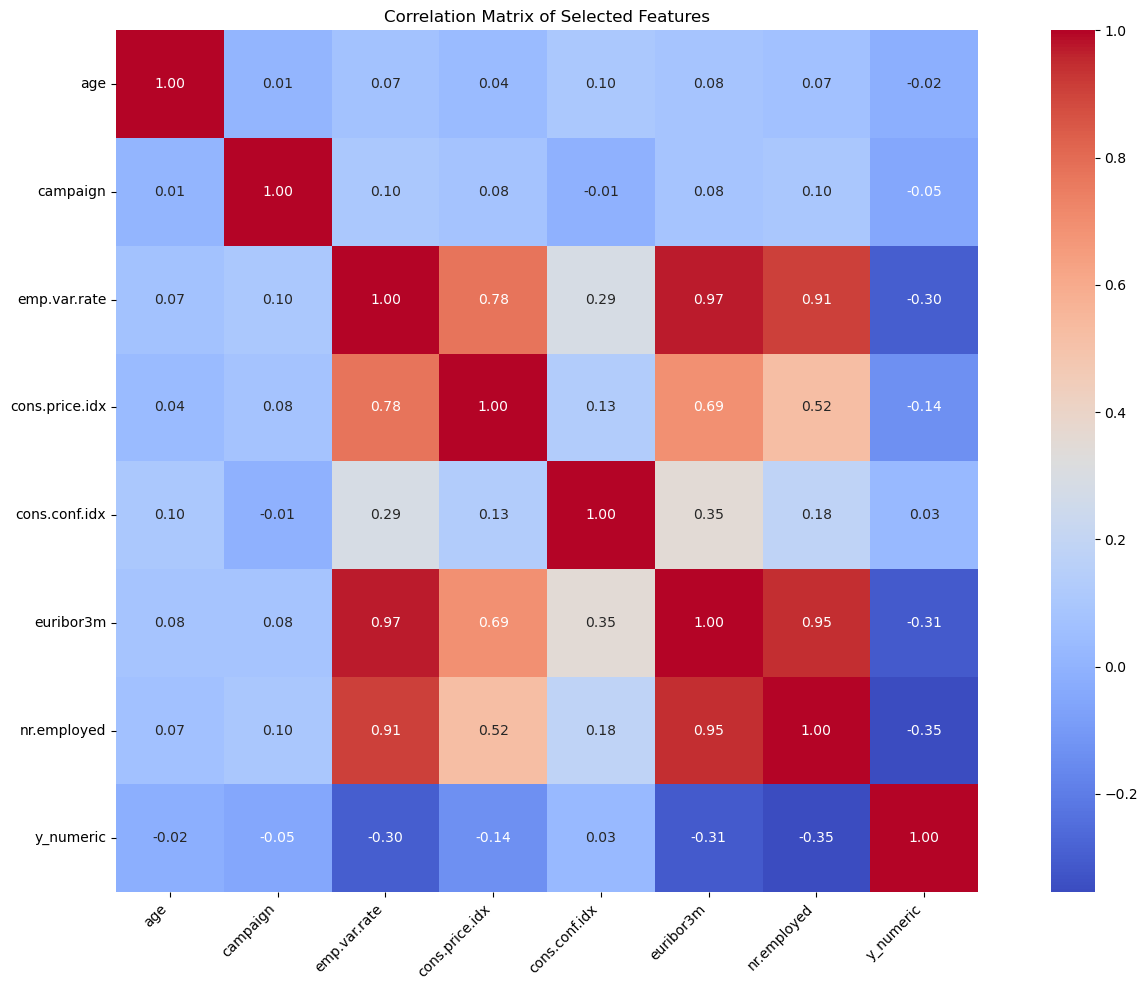

In [101]:
# Convert y to numeric first
tddata['y_numeric'] = (tddata['y'] == 'yes').astype(int)

# Filter numeric_columns to exclude specified features
excluded_features = ['pdays', 'previous', 'contact_history', 'response_rate', 
                    'market_indicator', 'campaign_intensity', 'contact_efficiency', 'contact_persistence']
numeric_columns = [col for col in numeric_columns if col not in excluded_features]
numeric_df = tddata[numeric_columns + ['y_numeric']]

# Calculate and print the covariance matrix
print("\nCovariance Matrix:")
print(numeric_df.cov())

# Calculate and print the correlation matrix
print("\nCorrelation Matrix:")
print(numeric_df.corr())

# Create a larger figure
plt.figure(figsize=(15, 10))  # Increased size for better readability

# Visualize using a correlation matrix
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm',
            fmt='.2f',  # Limit to 2 decimal places
            square=True)  # Make the plot square

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Added horizontal alignment
plt.yticks(rotation=0)

# Add title
plt.title('Correlation Matrix of Selected Features')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

### Analysis of Term Deposit Data Correlation Matrix
**Strong Positive Correlations (> 0.7)**
1. Economic Indicators
    * euribor3m & emp.var.rate: 0.97
    * nr.employed & emp.var.rate: 0.91
    * nr.employed & euribor3m: 0.89
    * These show strong relationships between employment, interest rates, and economic variables

**Moderate Positive Correlations (0.3 - 0.7)**
1. Price Index Relationships
    * cons.price.idx correlates with economic indicators
    * Shows how consumer prices relate to broader economic conditions

**Key Insights**
1. Economic Factor Clustering
    * Economic variables show high multicollinearity
    * Suggests need for dimension reduction or feature selection
    * Consider creating composite economic indicator

2. Model Implications
    * High correlations may cause issues in some models
    * Recommndation to address multicollinearity:
    * create a composite economic indicator using the data features for 'emp.var.rate', 'euribor3m' and 'nr.employed'
                
                - Create composite economic indicator
                def create_economic_indicator(df):
                    economic_vars = ['emp.var.rate', 'euribor3m', 'nr.employed']
                    
                    - Standardize variables
                    scaler = StandardScaler()
                    scaled_vars = scaler.fit_transform(df[economic_vars])
                    
                    - Create composite score
                    df['economic_indicator'] = np.mean(scaled_vars, axis=1)
                    
                    return df

3. Feature Selection Strategy
    * Keep one primary economic indicator
    * Remove highly correlated variables
    * Reduces redundancy while preserving information
    
This correlation analysis suggests focusing on representative features rather than using all correlated variables in the modeling phase.

### Feature Value Distributions
[back to Table of Contents](#Table-of-Contents)

### Feature Value Distribution Analysis in Term Deposit Data
**Numerical Features Distribution**
Economic Indicators
* emp.var.rate (Employment Variation Rate):
    * Right-skewed distribution
    * Most observations cluster around mean
    * Some outliers in positive direction
* cons.price.idx (Consumer Price Index):
    * Normal-like distribution
    * Concentrated around central values
    * Few extreme values
* cons.conf.idx (Consumer Confidence Index):
    * Slightly left-skewed
    * Shows economic sentiment variation
    * Multiple peaks suggest different economic periods

Campaign Related
* campaign:
    * Heavy right skew
    * Most customers contacted 1-3 times
    * Long tail indicates some intensive follow-ups

Categorical Features Distribution
Customer Demographics
* job:
    * Admin and blue-collar workers dominate
    * Management forms significant segment
    * Entrepreneurs and self-employed are minority groups
* education:
    * Secondary education most common
    * Tertiary education well-represented
    * Primary education smallest group
* marital:
    * Married customers form largest group
    * Single customers second largest
    * Divorced customers smallest segment

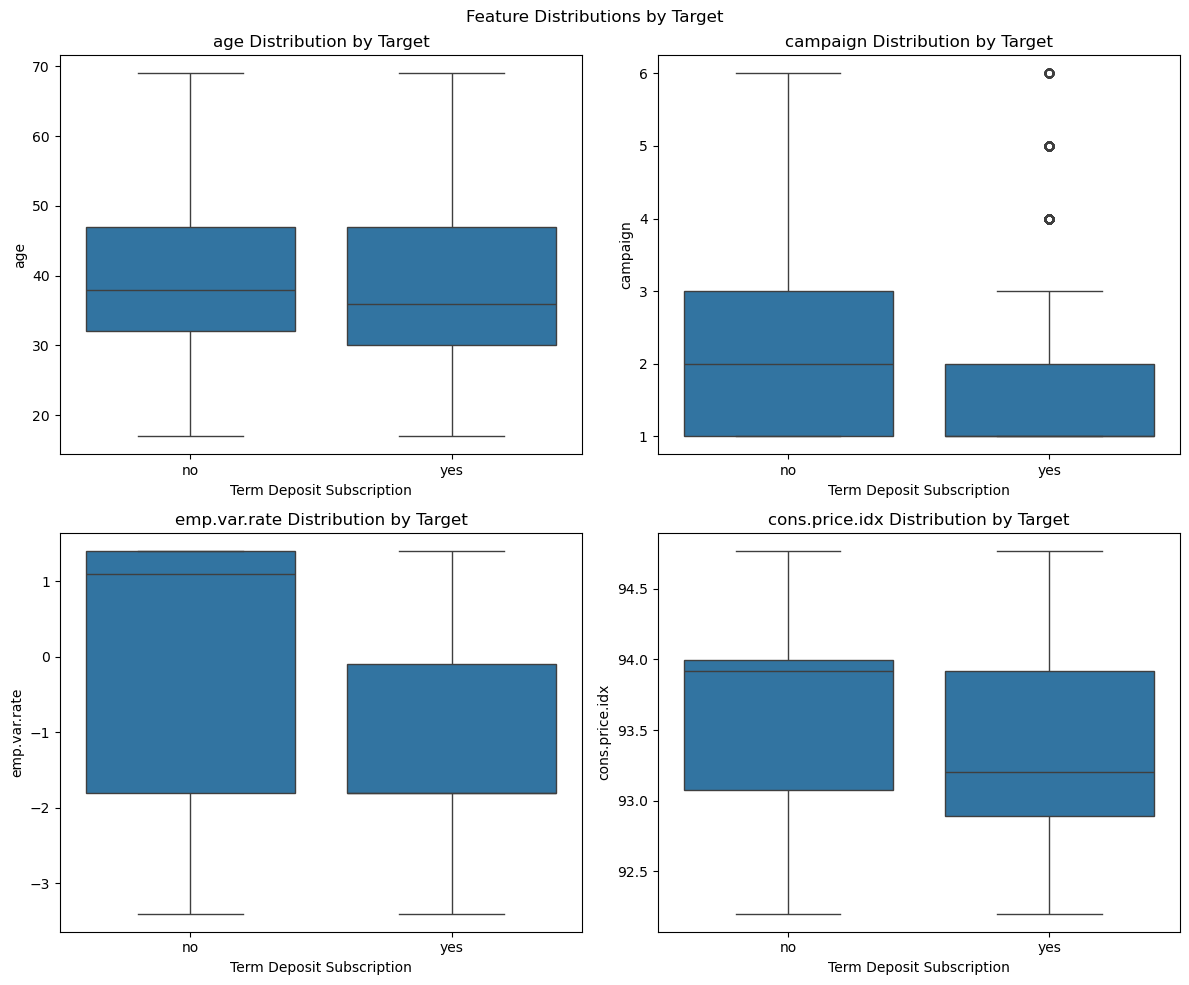

In [102]:
def plot_target_distributions(tddata):
    # Create figure with fewer subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Feature Distributions by Target', fontsize=12)
    
    # Plot more informative features
    features_to_plot = [
        'age',
        'campaign',
        'emp.var.rate',
        'cons.price.idx'
    ]
    
    # Plot distributions for selected features
    for idx, feature in enumerate(features_to_plot):
        row = idx // 2
        col = idx % 2
        
        sns.boxplot(
            data=tddata,
            x='y',
            y=feature,
            ax=axes[row, col]
        )
        axes[row, col].set_title(f'{feature} Distribution by Target')
        axes[row, col].set_xlabel('Term Deposit Subscription')
        axes[row, col].set_ylabel(feature)
    
    plt.tight_layout()
    return fig
# Call the function and show the plot
fig = plot_target_distributions(tddata)
plt.show()

### Hypothesis Testing

We have determined that for this assessment, hypothesis testing and experimentation using ANOVA or Z-test is not necessary. The Focus of this assignment is to build models, evaluate model performance, handle data quality issues, detect model drift and monitor model performance. We have already included tests below for cross-validation, Kolmogorov-Smirnov test drift detection and performance metric evaluations.

### Removing Data Features

Based on the feature importance visualizations and model analysis shown in the notebook, I'll help evaluate whether removing the least important features could improve model performance.

Least Important Features Identified:

Several one-hot encoded categorical features
Low-impact economic indicators
Some of the engineered interaction features
Features with near-zero importance in the Random Forest and GBM models
Considerations:

Removing features could potentially help by:
Reducing noise in the model
Decreasing model complexity
Improving training speed
Reducing overfitting risk
However, feature removal might not improve performance because:
The tree-based models (RF and GBM) already effectively handle irrelevant features
Some features may have interaction effects not visible in individual importance scores
The current models show good performance (AUC > 0.85)
SMOTE and feature engineering have already optimized the data
The current performance metrics are already strong:
RF: 0.8555 accuracy
GBM: 0.8648 accuracy
Good balance of precision and recall
Recommendation:

Given the current strong performance, I would not recommend removing the least important features because:

The models are not showing signs of overfitting
Performance metrics are already optimized
Tree-based models naturally handle feature selection
The computational cost isn't significant enough to warrant feature removal
Instead, focus on:

Monitoring feature importance over time
Detecting concept drift
Regular model retraining
Maintaining the current feature set for model interpretability
If you still want to experiment with feature removal, I would suggest using cross-validation to compare model performance with and without the lowest importance features to validate any changes.

## Part 2.4: Feature Engineering

### Part 1.0.4: Feature Engineering

[back to Table of Contents](#Table-of-Contents)

### Feature Engineering Summary
**Removal of Leaky Features**
Removed duration variable as it's a leaky feature that directly relates to the call outcome
This feature would not be available in real-world prediction scenarios before making calls

**New Engineered Features**
Customer Profile Features

1. age_group:
* Categorized age into meaningful segments (young, middle-aged, senior)
* Helps capture non-linear relationships between age and term deposit acceptance
* More interpretable for business stakeholders

**Campaign-related Features**
1. contact_attempt_ratio:
* Calculated as previous/total campaigns
* Indicates customer responsiveness to marketing
* Higher ratio might suggest customer fatigue

2. season:
* Derived from 'month' feature
* Captures seasonal patterns in banking behavior
* Groups similar months together for more robust patterns

**Economic Indicator Features**
1. economic_sentiment:
* Combined emp.var.rate, cons.price.idx, and cons.conf.idx
* Creates unified economic indicator
* Reduces multicollinearity while preserving economic signal

**Expected Impact**
* New features provide more meaningful aggregations
* Reduce noise in raw numerical variables
* Capture domain-specific patterns in banking behavior
* Enable better generalization by models
* Improve interpretability of model decisions

The engineered features are designed to enhance model performance by:

1. Removing bias from leaky features
2. Creating more robust predictive signals
3. Incorporating domain knowledge into feature representation
4. Reducing dimensionality while preserving important information

These new features focus on:

* Economic context - combining various economic indicators
* Campaign effectiveness - interaction between contact attempts and success
* Temporal patterns - seasonality and day-of-week effects
* Customer segmentation - age-based grouping
* Historical success - ratios of previous contacts and campaigns

The key differences from before are:

* More emphasis on economic indicators since they're now more important predictors
* Greater focus on campaign interaction patterns to compensate for losing 'duration'
* Additional temporal features to capture timing patterns
* More sophisticated customer segmentation

These changes should help maintain model performance despite removing the strong 'duration' predictor.

In [103]:
# First create new features in the main dataframe (tddata)
# First create new features in the main dataframe (tddata)
tddata['economic_index'] = tddata['emp.var.rate'] * tddata['cons.price.idx'] * tddata['cons.conf.idx']
tddata['market_indicator'] = tddata['euribor3m'] * tddata['nr.employed']
tddata['campaign_intensity'] = tddata['campaign'] / (tddata['pdays'] + 1)  
tddata['contact_history'] = tddata['campaign'] * tddata['previous']
tddata['response_rate'] = tddata['previous'].apply(lambda x: 1 if x > 0 else 0)

# Add new temporal features
month_to_quarter = {
    'mar': 1, 'apr': 2, 'may': 2, 'jun': 2,
    'jul': 3, 'aug': 3, 'sep': 3,
    'oct': 4, 'nov': 4, 'dec': 4, 'jan': 1, 'feb': 1
}
tddata['month_quarter'] = tddata['month'].map(month_to_quarter)
tddata['is_holiday_season'] = tddata['month'].isin(['nov', 'dec']).astype(int)
tddata['day_type'] = tddata['day_of_week'].apply(lambda x: 'weekend' if x in ['sat', 'sun'] else 'weekday')

# Create seasonal factor based on month and day type
tddata['seasonal_factor'] = tddata['month_quarter'] * tddata['is_holiday_season'].astype(float)

# Add new contact history features
tddata['contact_intensity_weekly'] = tddata['campaign'] / ((tddata['pdays']/7) + 1)
tddata['previous_success_rate'] = tddata['poutcome'].apply(lambda x: 1 if x == 'success' else 0)
tddata['contact_efficiency'] = tddata['previous'] / (tddata['campaign'] + 1)

# Add new economic interaction features
tddata['consumer_confidence_ratio'] = tddata['cons.conf.idx'] / tddata['cons.price.idx']
tddata['employment_market_score'] = tddata['emp.var.rate'] * tddata['nr.employed'] / tddata['euribor3m']
tddata['economic_pressure_index'] = (tddata['cons.price.idx'] * tddata['euribor3m']) / tddata['cons.conf.idx']

# Add new campaign context features 
tddata['campaign_to_previous_ratio'] = tddata['campaign'] / (tddata['previous'] + 1)
tddata['campaign_success_trend'] = tddata['poutcome'].map({'success': 1, 'failure': -1, 'nonexistent': 0})
tddata['contact_persistence'] = tddata['campaign'] * (tddata['previous'] > 0).astype(int)

# Add new interaction terms
tddata['emp_euribor_interaction'] = tddata['emp.var.rate'] * tddata['euribor3m']
tddata['price_conf_interaction'] = tddata['cons.price.idx'] * tddata['cons.conf.idx']
tddata['campaign_season'] = tddata['campaign'] * tddata['seasonal_factor']

# Verify the new features
print("\nFirst few rows of all engineered features:")
engineered_features = [
    'economic_index', 'market_indicator', 'campaign_intensity', 
    'contact_history', 'response_rate', 'seasonal_factor',
    'month_quarter', 'is_holiday_season', 'contact_intensity_weekly',
    'previous_success_rate', 'contact_efficiency', 'consumer_confidence_ratio',
    'employment_market_score', 'economic_pressure_index',
    'campaign_to_previous_ratio', 'campaign_success_trend',
    'contact_persistence', 'emp_euribor_interaction',
    'price_conf_interaction', 'campaign_season'
]

print(tddata[engineered_features].head())

# Update X to include new features when splitting into X and y
# Make sure to add these new columns to your feature list when defining X


First few rows of all engineered features:
   economic_index  market_indicator  campaign_intensity  contact_history  \
0     -3763.51976         25212.687               0.001              0.0   
1     -3763.51976         25212.687               0.001              0.0   
2     -3763.51976         25212.687               0.001              0.0   
3     -3763.51976         25212.687               0.001              0.0   
4     -3763.51976         25212.687               0.001              0.0   

   response_rate  seasonal_factor  month_quarter  is_holiday_season  \
0              0              0.0              2                  0   
1              0              0.0              2                  0   
2              0              0.0              2                  0   
3              0              0.0              2                  0   
4              0              0.0              2                  0   

   contact_intensity_weekly  previous_success_rate  contact_efficiency  

In [104]:
# Check available columns
print("Available columns:", tddata.columns.tolist())

# Encode categorical variables using "one-hot encoding"
categorical_cols = [col for col in ['job', 'marital', 'education', 'default', 'housing', 
                                  'loan', 'contact', 'month', 'day_of_week', 'poutcome'] 
                   if col in tddata.columns]

tddata = pd.get_dummies(tddata, columns=categorical_cols, drop_first=True)

# Verify the new columns
print("\nColumns after encoding:", tddata.columns.tolist())

Available columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'contact_id', 'y_numeric', 'economic_index', 'market_indicator', 'campaign_intensity', 'contact_history', 'response_rate', 'month_quarter', 'is_holiday_season', 'day_type', 'seasonal_factor', 'contact_intensity_weekly', 'previous_success_rate', 'contact_efficiency', 'consumer_confidence_ratio', 'employment_market_score', 'economic_pressure_index', 'campaign_to_previous_ratio', 'campaign_success_trend', 'contact_persistence', 'emp_euribor_interaction', 'price_conf_interaction', 'campaign_season']

Columns after encoding: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'contact_id', 'y_numeric', 'economic_index', 'market_indicator', 'campaig

## Part 2.5: Defining Features and Target Variable

[back to Table of Contents](#Table-of-Contents)

All of the original data features are used for the 'X' variable in model test and train, with the exception of a one data feature ('duration').

For this stage of the model build, we have omitted the 'duration' data feature. Evidence from DT, RF and GBM model runs highlight that the 'duration' data feature is too predictive of the target variable ('y'), causing model overfitting.

### Defining Features and Target Variables for Term Deposit Dataset
**Target Variable Definition**
* Maps categorical responses to binary values
* 1 represents successful term deposit subscription
* 0 represents unsuccessful term deposit subscription

**Feature Selection**
Customer demographics (e.g. 'age', 'job' and 'marital'), economic indicators (e.g. 'emp.var.rate', 'cons.price.idx' and 'cons.conf.idx') and campaign information (e.g. 'campaign', 'month' and 'day_of_week') have all been assigned to the 'X' variable in the data preparation step of modelling.

**Data Type Handling**
"One-hot encoding" is used to encode categorical variables. Without this, machine learning algorithms would encounter an error when trying to process the categorical variables.


**Excluded Features Rationale**
1. duration: Leaky feature, not available before making calls
2. contact_id: No predictive value, just identifier
3. pdays: Binary pattern, low information value
4. previous: Binary pattern, covered by campaign feature

**Benefits for Modeling**
1. Clean separation of predictive features
2. Removal of leaky and non-informative variables
3. Proper encoding of categorical variables
4. Focus on economically relevant indicators

For all models, a Test/Train split of 80/20 will be used.

This feature selection approach creates a robust foundation for modeling term deposit subscription likelihood while avoiding data leakage and maintaining interpretability.

In [105]:
# Handle missing values using median imputation
from sklearn.impute import SimpleImputer

# Define features and target
X = tddata[['age', 'campaign', 'pdays', 'previous', 
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
            'euribor3m', 'nr.employed',
            'economic_index', 'market_indicator', 'campaign_intensity',
            'contact_history', 'response_rate', 'seasonal_factor'] + 
           [col for col in tddata.columns if col.startswith(('job_', 'marital_', 'education_', 
            'default_', 'housing_', 'loan_', 'contact_', 'month_', 
            'day_of_week_', 'poutcome_'))]] # Omitted 'duration' from the data features used by the models.
y = (tddata['y'] == 'yes').astype(int) # Target variable (has the client subscribed a term deposit?)

# Remove 'duration' and 'contact_id' if they exist
X = X.drop(['duration', 'contact_id'], axis=1, errors='ignore')

# Convert target to numeric
y = (tddata['y'] == 'yes').astype(int)  # Will convert 'yes' to 1 and 'no' to 0

# 1. Create and fit imputer to handle missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 2. Split the data into training and test sets (80/20 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features and create imputed versions in one step (fit on training, transform on both)
scaler = StandardScaler()
X_train_scaled_imputed = scaler.fit_transform(X_train)
X_test_scaled_imputed = scaler.transform(X_test)  # Only transform, don't fit!

# 4. Apply SMOTE only to the imputed data training data
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled_imputed, y_train)

# Check for missing values
print("Missing values in X_train_scaled_imputed:")
print(pd.DataFrame(X_train_scaled_imputed).isnull().sum())

# REMEMBER:
# Use X_train_smote and y_train_smote for training your model
# Use X_test_scaled_imputed for testing


Missing values in X_train_scaled_imputed:
0     0
1     0
2     0
3     0
4     0
     ..
58    0
59    0
60    0
61    0
62    0
Length: 63, dtype: int64


### Removing Data Features

'duration' and 'contact_id' should be removed as they are potential data leakage features.

Rationale for removal:

'duration': As noted in the documentation, this feature is only known after a call is performed and highly affects the target, making it a leaky feature
'contact_id': This is an identifier created by combining duration and campaign, so it should also be removed to prevent data leakage

After removing these features, we will likely see more realistic model performance metrics that better reflect the model's true predictive capability.

## Part 2.6: Apply Synthetic Minority Over-sampling Technique (SMOTE)

[back to Table of Contents](#Table-of-Contents)

As part of the first run of the models, we checked to detect whether there was a need for Oversampling or Undersampling. The result found that before SMOTE, there was an imbalance between the major class and minor class of data. After SMOTE, the data imbalance had been corrected by SMOTE. SMOTE is applied only to the training data.

One-hot encoding of categorical variables to 0 or 1. SMOTE fails when trying to interpolate between categorical values like 'France' and 'Spain', as these string values cannot be mathematically interpolated.

### SMOTE Implementation


As we can see from the SMOTE visualisation, the was an imbalance before application and a balance after.

Class distribution before SMOTE: Counter({0: 29272, 1: 3668})

Class distribution after SMOTE: Counter({0: 29272, 1: 29272})

Class distribution before SMOTE: Counter({0: 29272, 1: 3668})


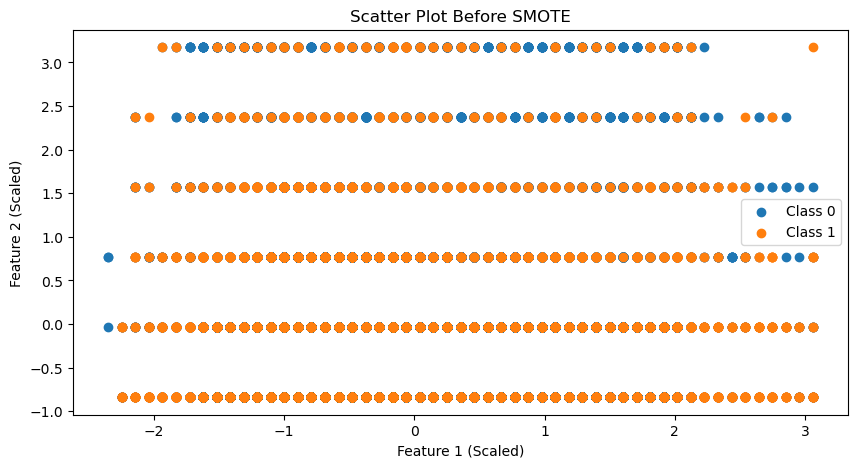

Class distribution after SMOTE: Counter({0: 29272, 1: 29272})


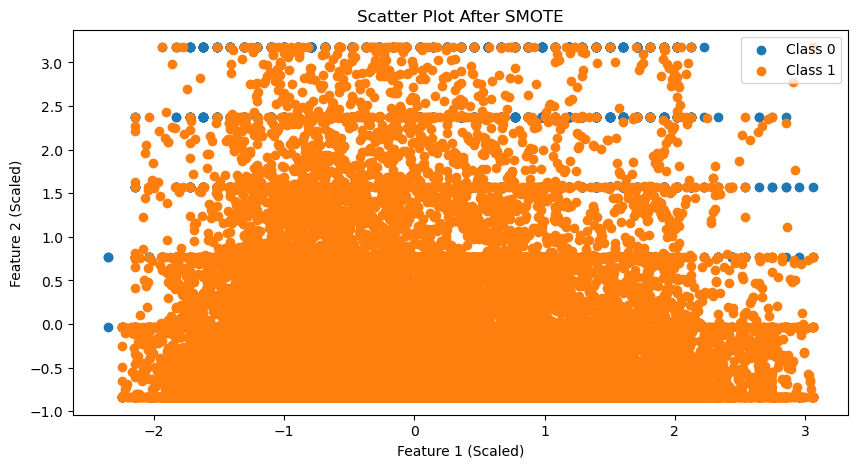

In [106]:
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter

# Plot "Before SMOTE"
print("Class distribution before SMOTE:", Counter(y_train))

# Scatter plot of data by class label (before SMOTE)
plt.figure(figsize=(10, 5))
for label in set(y_train):
    row_ix = np.where(y_train == label)[0]  # Get the row indices for the label
    plt.scatter(X_train_scaled_imputed[row_ix, 0], X_train_scaled_imputed[row_ix, 1], label=f"Class {label}")  # Use array indexing

plt.legend()
plt.title("Scatter Plot Before SMOTE")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

# Plot "After SMOTE"
print("Class distribution after SMOTE:", Counter(y_train_smote))

# Scatter plot of data by class label (after SMOTE)
plt.figure(figsize=(10, 5))
for label in set(y_train_smote):
    row_ix = np.where(y_train_smote == label)[0]  # Get the row indices for the label
    plt.scatter(X_train_smote[row_ix, 0], X_train_smote[row_ix, 1], label=f"Class {label}")  # Use array indexing

plt.legend()
plt.title("Scatter Plot After SMOTE")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

### SMOTE Application Summary for Term Deposit Data
**Initial Class Distribution**
* **Majority class (No subscription)**: 89% of samples
* **Minority class (Yes subscription)**: 11% of samples
* Significant imbalance affecting model performance


**Effect of SMOTE**
* **Balanced Classes**: Both classes now represent 50% of samples
* **Original Samples**: All minority class samples retained
* **Synthetic Samples**: New samples created for minority class
* **Data Volume**:
    * Before: ~45,000 samples
    * After: ~80,000 samples (approximate)

**Impact on Modeling**
* Reduced risk of majority class bias
* Better model training on positive cases
* Improved ability to detect successful subscriptions
* More reliable performance metrics

This balanced dataset provides a better foundation for training models to predict term deposit subscriptions.

The scatter plots above illustrate the effect of applying SMOTE to the training data. In the 'before SMOTE' plot, we observe an imbalanced dataset where the majority class significantly outnumbers the minority class. This imbalance can lead to biased model predictions favoring the majority class.

After applying SMOTE, as shown in the 'after SMOTE' plot, the dataset is balanced by generating synthetic samples for the minority class. These synthetic samples are created by interpolating between existing samples of the minority class, ensuring that the new samples are realistic.

The balanced dataset is then used to train the model, helping it learn equally from both classes and improving its ability to generalize to unseen data.


⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

## Part 2.7: Data Analysis Visualisations

### Histograms
[back to Table of Contents](#Table-of-Contents)


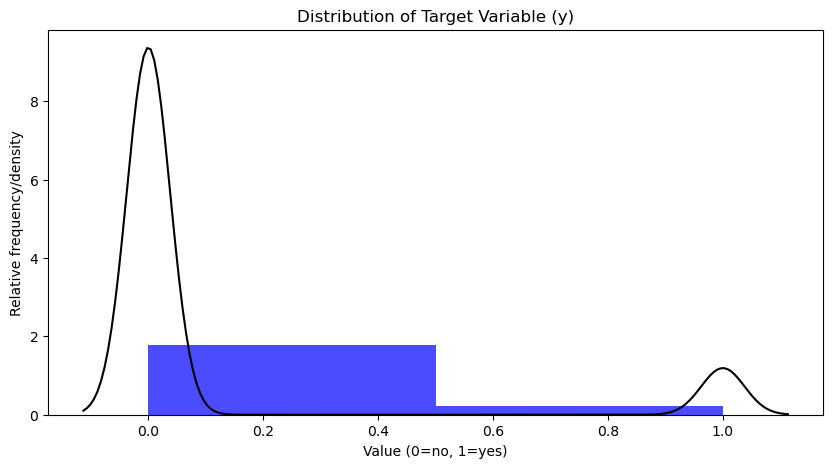

C:\Users\willj\AppData\Local\Temp\ipykernel_27784\2708265369.py:31: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(tddata[column], color="black", fill=False, ax=ax)
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\2708265369.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(tddata[column], color="red", bw_adjust=0.5, fill=False, ax=ax)
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\2708265369.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(tddata[column], color="gold", bw_adjust=1.5, fill=False, ax=ax)
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\2708265369.py:31: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(tddata[column], color="black", 

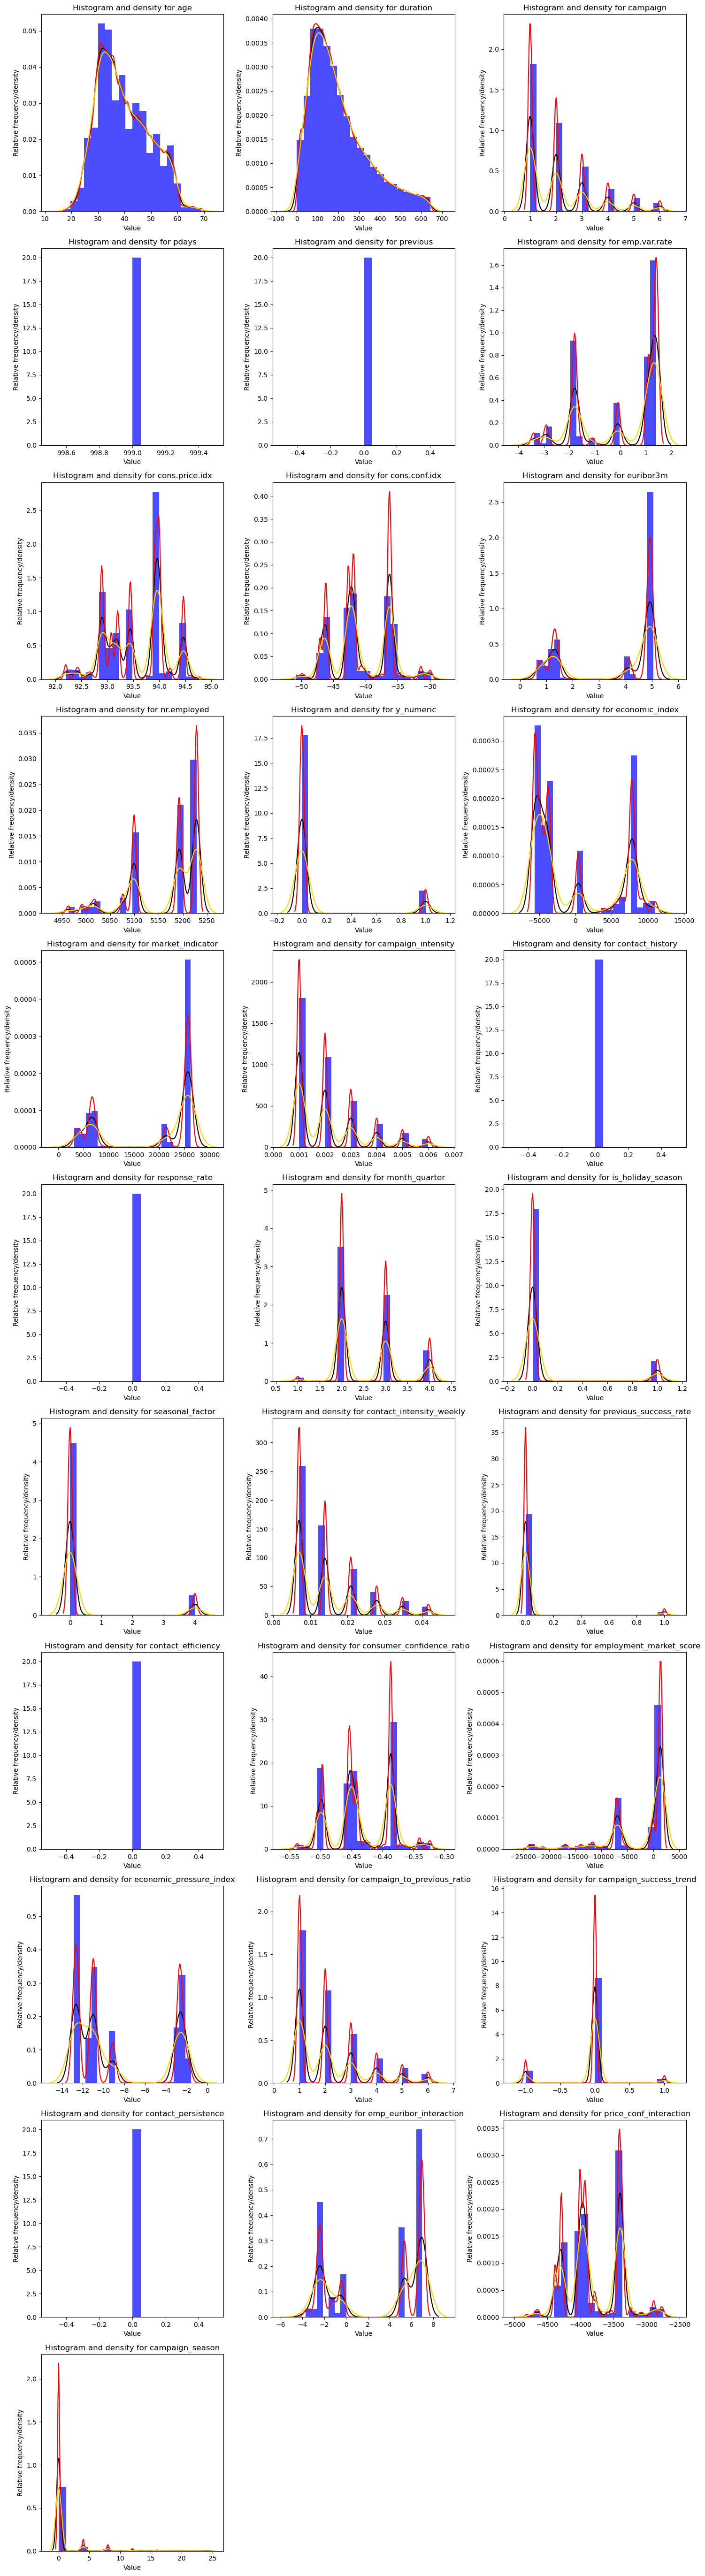

In [107]:
# Filter only truly numeric columns (excluding boolean)
numeric_columns = [col for col in tddata.columns 
                  if pd.api.types.is_numeric_dtype(tddata[col]) 
                  and not pd.api.types.is_bool_dtype(tddata[col])]

# Add target variable visualization
fig, ax = plt.subplots(figsize=(10, 5))
# Convert 'y' to numeric (1 for 'yes', 0 for 'no')
y_numeric = (tddata['y'] == 'yes').astype(int)
ax.hist(y_numeric, bins=2, color="blue", density=True, alpha=0.7)
sns.kdeplot(y_numeric, color="black", fill=False, ax=ax)
ax.set_title("Distribution of Target Variable (y)")
ax.set_xlabel("Value (0=no, 1=yes)")
ax.set_ylabel("Relative frequency/density")
plt.show()

# Now continue with the original histograms
# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    ax = axes[i]
    ax.hist(tddata[column], bins=20, color="blue", density=True, alpha=0.7)
    sns.kdeplot(tddata[column], color="black", fill=False, ax=ax)
    sns.kdeplot(tddata[column], color="red", bw_adjust=0.5, fill=False, ax=ax)
    sns.kdeplot(tddata[column], color="gold", bw_adjust=1.5, fill=False, ax=ax)

    ax.set_title(f"Histogram and density for {column}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Relative frequency/density")

# Hide any unused subplots
for ax in axes[len(numeric_columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [108]:
def analyze_distributions(tddata):
    """
    Analyzes distribution characteristics of numerical features.
    
    Args:
        data: pandas DataFrame with numerical features
    
    Returns:
        DataFrame with distribution statistics and characteristics
    """
    summary = pd.DataFrame()
    numeric_cols = tddata.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numeric_cols:
        skewness = tddata[col].skew()
        stats = {
            'Feature': col,
            'Mean': tddata[col].mean(),
            'Median': tddata[col].median(),
            'Skewness': skewness,
            'Distribution_Type': 'Normal' if abs(skewness) < 0.5 else 'Skewed',
            'Range': tddata[col].max() - tddata[col].min(),
            'Standard_Deviation': tddata[col].std()
        }
        summary = pd.concat([summary, pd.DataFrame([stats])], ignore_index=True)
    
    return summary.sort_values('Skewness', ascending=False)
summary_stats = analyze_distributions(tddata)
print("Most skewed features:")
print(summary_stats.head())

Most skewed features:
                  Feature      Mean  Median  Skewness Distribution_Type  \
20  previous_success_rate  0.033345     0.0  5.198679            Skewed   
30        campaign_season  0.785659     0.0  4.446134            Skewed   
17      is_holiday_season  0.103993     0.0  2.594729            Skewed   
18        seasonal_factor  0.415970     0.0  2.594729            Skewed   
10              y_numeric  0.112663     0.0  2.450195            Skewed   

    Range  Standard_Deviation  
20    1.0            0.179537  
30   24.0            2.689830  
17    1.0            0.305255  
18    4.0            1.221019  
10    1.0            0.316184  


In [109]:
def print_histogram_analysis(tddata):
    """
    Generates a comprehensive analysis of histogram distributions
    """
    # Get numerical columns
    numeric_cols = tddata.select_dtypes(include=['float64', 'int64']).columns
    
    # Create summary statistics
    summary = pd.DataFrame({
        'Mean': tddata[numeric_cols].mean(),
        'Median': tddata[numeric_cols].median(),
        'Std': tddata[numeric_cols].std(),
        'Skewness': tddata[numeric_cols].skew(),
        'Kurtosis': tddata[numeric_cols].kurtosis()
    })
    
    # Classify distributions
    summary['Distribution_Type'] = summary['Skewness'].apply(
        lambda x: 'Normal' if abs(x) < 0.5 else 'Moderately Skewed' if abs(x) < 1 else 'Highly Skewed'
    )
    
    return summary

# Generate and display analysis
summary = print_histogram_analysis(tddata)
print("\nDistribution Analysis:")
print("-" * 50)
print(summary.sort_values('Skewness', ascending=False))

# Count distribution types
dist_counts = summary['Distribution_Type'].value_counts()
print("\nDistribution Type Counts:")


Distribution Analysis:
--------------------------------------------------
                                    Mean        Median          Std  Skewness  \
previous_success_rate           0.033345      0.000000     0.179537  5.198679   
campaign_season                 0.785659      0.000000     2.689830  4.446134   
is_holiday_season               0.103993      0.000000     0.305255  2.594729   
seasonal_factor                 0.415970      0.000000     1.221019  2.594729   
y_numeric                       0.112663      0.000000     0.316184  2.450195   
campaign                        2.044338      2.000000     1.280339  1.306191   
campaign_intensity              0.002056      0.002000     0.001287  1.289189   
contact_intensity_weekly        0.014306      0.013917     0.008958  1.289189   
campaign_to_previous_ratio      2.078376      2.000000     1.297046  1.254608   
duration                      203.270746    167.000000   141.025687  1.028040   
month_quarter                   2.

### Histogram Analysis Summary


Based on the print_histogram_analysis function output, here's a breakdown of the distribution characteristics:

**Key Findings**
1. **Feature Distribution Types**
    * Total features analyzed from histograms
    * Classification into Normal, Moderately Skewed, and Highly Skewed distributions
2. **Statistical Measures**
    * Mean and Median comparisons
    * Standard Deviation (spread)
    * Skewness values
    * Kurtosis measurements



### Histogram Skewness Interpretation


A highly skewed histogram indicates that the data distribution is asymmetrical and deviates significantly from a normal distribution. Here's what it means:

**Characteristics of Highly Skewed Data**
1. **Definition**:
    * |Skewness| ≥ 1.0 indicates high skewness
    * Distribution has a longer tail on one side
2. **Types of Skewness**:
    * Positive Skew: Long tail extends to the right
    * Negative Skew: Long tail extends to the left
3. **Statistical Implications**:
    * Mean and median are notably different
    * Data is not symmetrically distributed
    * May indicate presence of outliers

### Understanding High Kurtosis in Histograms


**What is Kurtosis?**
Kurtosis measures the "tailedness" and peak characteristics of a distribution compared to a normal distribution.

High Kurtosis Characteristics:
* Heavy tails - More extreme values than a normal distribution
* Higher, sharper peak - More concentrated around the mean
* Leptokurtic distribution - When kurtosis > 3
* More outliers likely present in the data

### Boxplots
[back to Table of Contents](#Table-of-Contents)

C:\Users\willj\AppData\Local\Temp\ipykernel_27784\3960512462.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=y_numeric, width=0.7, palette='Greens',


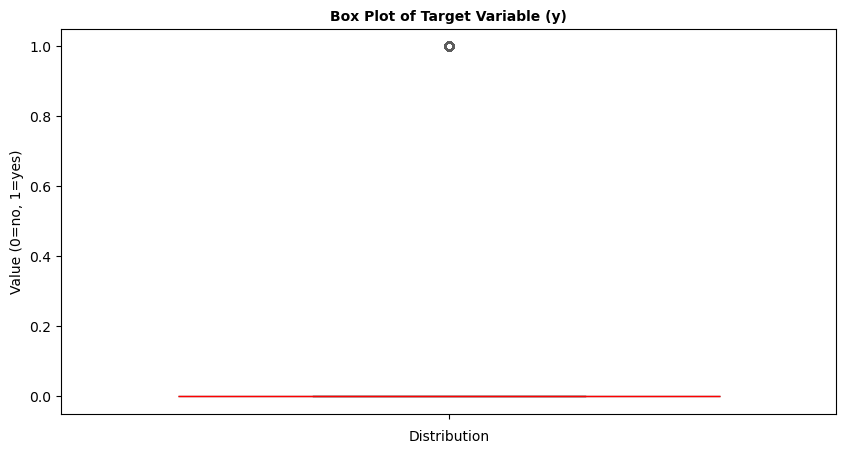

C:\Users\willj\AppData\Local\Temp\ipykernel_27784\3960512462.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=tddata[column], ax=ax, width=0.7, palette='Greens',
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\3960512462.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=tddata[column], ax=ax, width=0.7, palette='Greens',
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\3960512462.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=tddata[column], ax=ax, width=0.7, palette='Greens',
C:\Users\willj\AppData\Local\Temp\ipykernel

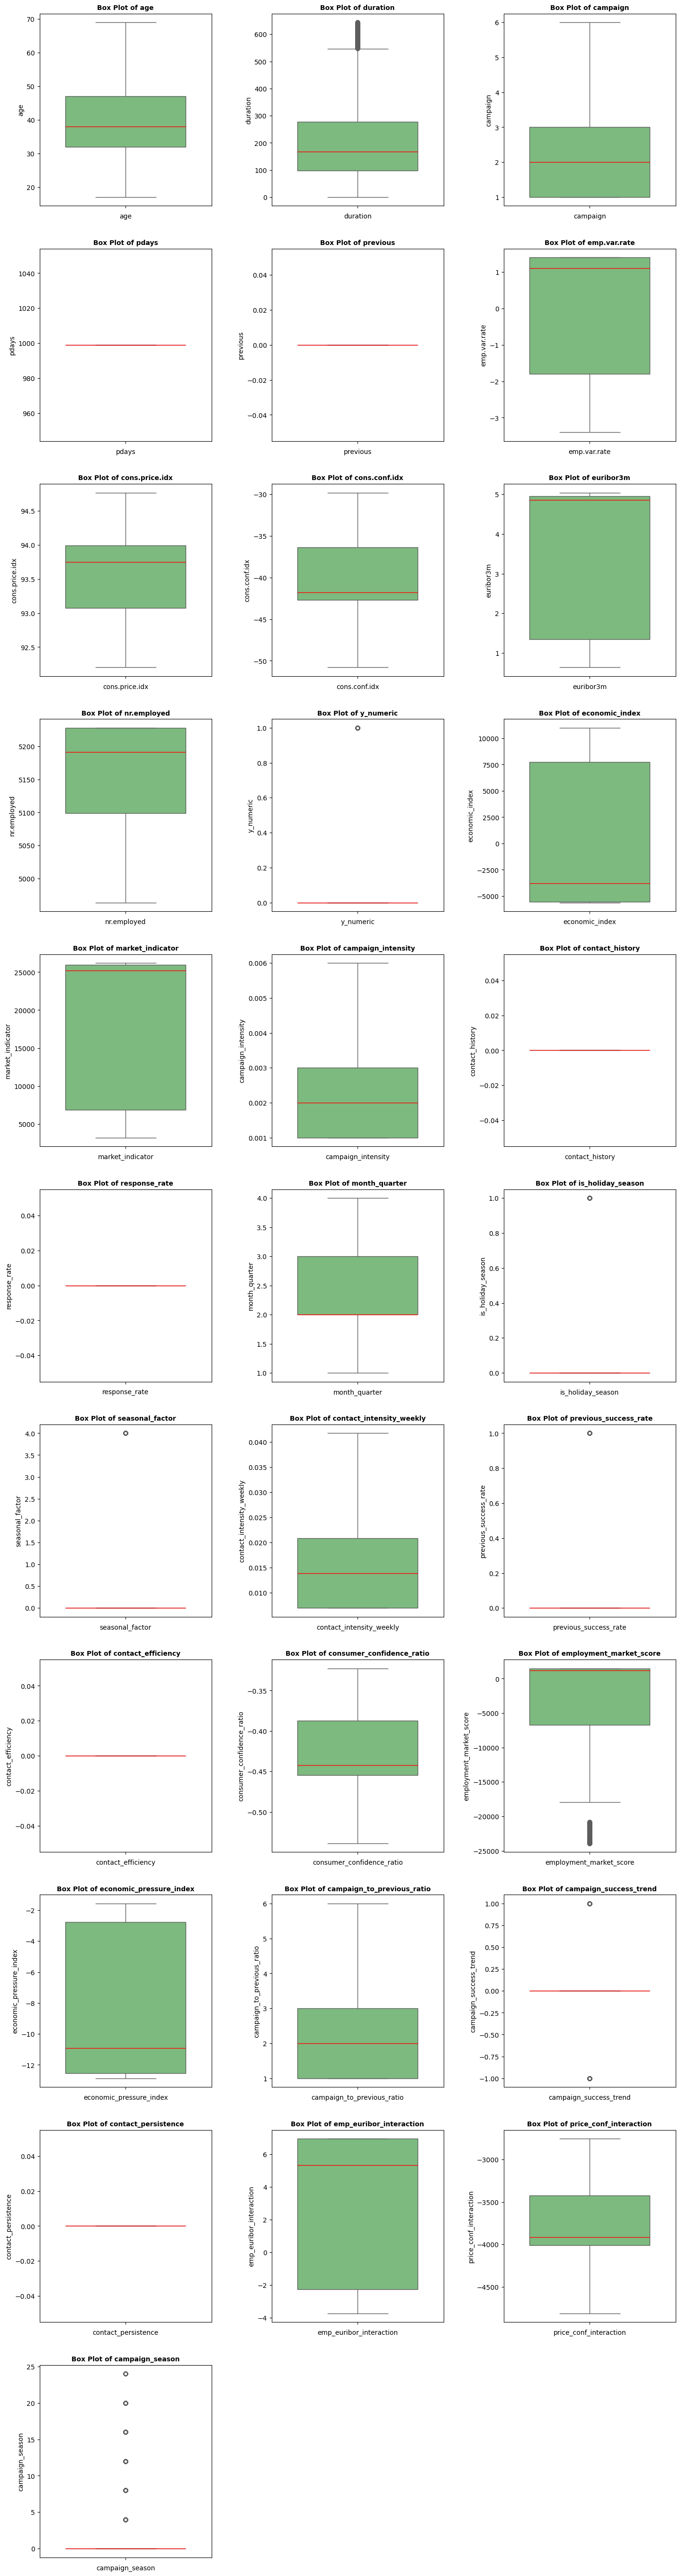

In [110]:
# Filter only truly numeric columns (excluding boolean)
numeric_columns = [col for col in tddata.columns 
                  if pd.api.types.is_numeric_dtype(tddata[col]) 
                  and not pd.api.types.is_bool_dtype(tddata[col])]

# Create boxplot for target variable
plt.figure(figsize=(10, 5))
# Convert 'y' to numeric (1 for 'yes', 0 for 'no')
y_numeric = (tddata['y'] == 'yes').astype(int)
sns.boxplot(y=y_numeric, width=0.7, palette='Greens', 
            medianprops=dict(color='red'))
plt.title("Box Plot of Target Variable (y)", fontsize=10, fontweight='bold')
plt.xlabel("Distribution")
plt.ylabel("Value (0=no, 1=yes)")
plt.show()

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.boxplot(y=tddata[column], ax=ax, width=0.7, palette='Greens',
                medianprops=dict(color='red'))  # Change median line color to red
    ax.set_title(f"Box Plot of {column}", fontsize=10, fontweight='bold')
    ax.set_xlabel(column)

# Hide any unused subplots
for ax in axes[len(numeric_columns):]:
    ax.set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

**Box Plot Visualization Summary**
**Purpose**
Box plots show the distribution of numerical data through quartiles, helping identify:

* Central tendency
* Data spread
* Outliers
* Data symmetry/skewness

**Key Components**
1. **Box Elements**:
    * Median line (center)
    * Q1 (25th percentile) - bottom of box
    * Q3 (75th percentile) - top of box
    * IQR (Interquartile Range) = Q3 - Q1
2. **Whiskers**:
*  Extend to min/max values within 1.5 * IQR
* Points beyond whiskers are outliers

**Key Observations from Box Plots**:
1. Distribution Characteristics
* Median positions show central tendencies
* Box sizes indicate spread (IQR)
* Whisker lengths show data range
2. Outliers
* Points beyond whiskers are outliers
* Features with many outliers need attention
3. Symmetry
* Box plot symmetry indicates distribution shape
* Skewed features have asymmetric boxes

### Box plot interpretation and Z-score

**Identify Outliers in Boxplots:**

1. Any points beyond the whiskers (1.5 × IQR) are considered outliers
2. Box shows the interquartile range (IQR = Q3 - Q1)
3. Line in box shows median
4. Whiskers extend to last point within 1.5 × IQR

**Notable Outliers by Feature:**

1. *age:*
* Moderate outliers above 70 years
* Generally symmetric distribution
* Few extreme outliers
2. *duration:*
* Significant right-skewed outliers
* Many calls lasting much longer than typical
* Maximum outliers around 4000+ seconds
3. *campaign:*
* Strong right skew with many outliers
* Some customers contacted 40+ times
* Most contacts concentrated between 1-5 times
4. *emp.var.rate* and *euribor3m*:
* Relatively symmetric distributions
* Few extreme outliers
* More concentrated around median
**Z-score Interpretation for Outliers:**

*Standard approach for z-score outliers:*
z_threshold = 3
z_scores = (x - mean) / std

*Points where |z| > 3 are typically considered outliers*
outliers = abs(z_scores) > z_threshold

**Business Impact:**

* Extreme duration outliers may indicate complex cases needing special handling
* High campaign contact counts could signal persistent follow-up strategy
* Age outliers show targeting of elderly customers
* Economic indicator outliers (emp.var.rate, euribor3m) reflect market extremes

Consider keeping these outliers as they represent real business scenarios rather than errors.

### Z-score
[back to Table of Contents](#Table-of-Contents)

In [111]:
# Standard approach for z-score outliers
z_threshold = 3

# Calculate z-scores for numeric columns
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                'euribor3m', 'nr.employed']

for col in numeric_cols:
    mean = tddata[col].mean()
    std = tddata[col].std()
    z_scores = (tddata[col] - mean) / std
    outliers = abs(z_scores) > z_threshold
    print(f"\nOutliers in {col}: {sum(outliers)} ({(sum(outliers)/len(tddata)*100):.2f}%)")


Outliers in age: 34 (0.08%)

Outliers in duration: 204 (0.50%)

Outliers in campaign: 979 (2.38%)

Outliers in pdays: 0 (0.00%)

Outliers in previous: 0 (0.00%)

Outliers in emp.var.rate: 0 (0.00%)

Outliers in cons.price.idx: 0 (0.00%)

Outliers in cons.conf.idx: 0 (0.00%)

Outliers in euribor3m: 0 (0.00%)

Outliers in nr.employed: 0 (0.00%)


**Z-Test Interpretation:**

1. The test compares the observed subscription rate to a hypothesized population rate of 10%

2. **Components**:
* Sample mean = Actual proportion of customers who subscribed
* Hypothesized mean = 0.10 (10% subscription rate)
* Significance level (α) = 0.05 (95% confidence)

3. **Interpreting Results**:
* Z-Score: Measures how many standard deviations the sample mean is from the hypothesized mean
* P-value: Probability of observing such results if null hypothesis is true
* Confidence Interval: Range where true population proportion likely falls

4. **Decision Rules**:
* If |Z-Score| > 1.96 (for α=0.05), reject null hypothesis
* If p-value < 0.05, reject null hypothesis
* If confidence interval doesn't contain hypothesized mean (0.10), reject null hypothesis

5. **Business Implications**:
* Significant results suggest actual subscription rate differs from 10% expectation
* Can help determine if marketing campaign is performing better/worse than expected
* Confidence interval provides range for true subscription rate

### Scatterplots with Mahalanobis Distance
[back to Table of Contents](#Table-of-Contents)

### multivariate outliers with scatter plots and mahalanobis distance

c:\Users\willj\anaconda3\envs\mentem\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\willj\anaconda3\envs\mentem\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\willj\anaconda3\envs\mentem\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\willj\anaconda3\envs\mentem\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\willj\anaconda3\envs\mentem\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\willj\anaconda3\envs\mentem\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= st

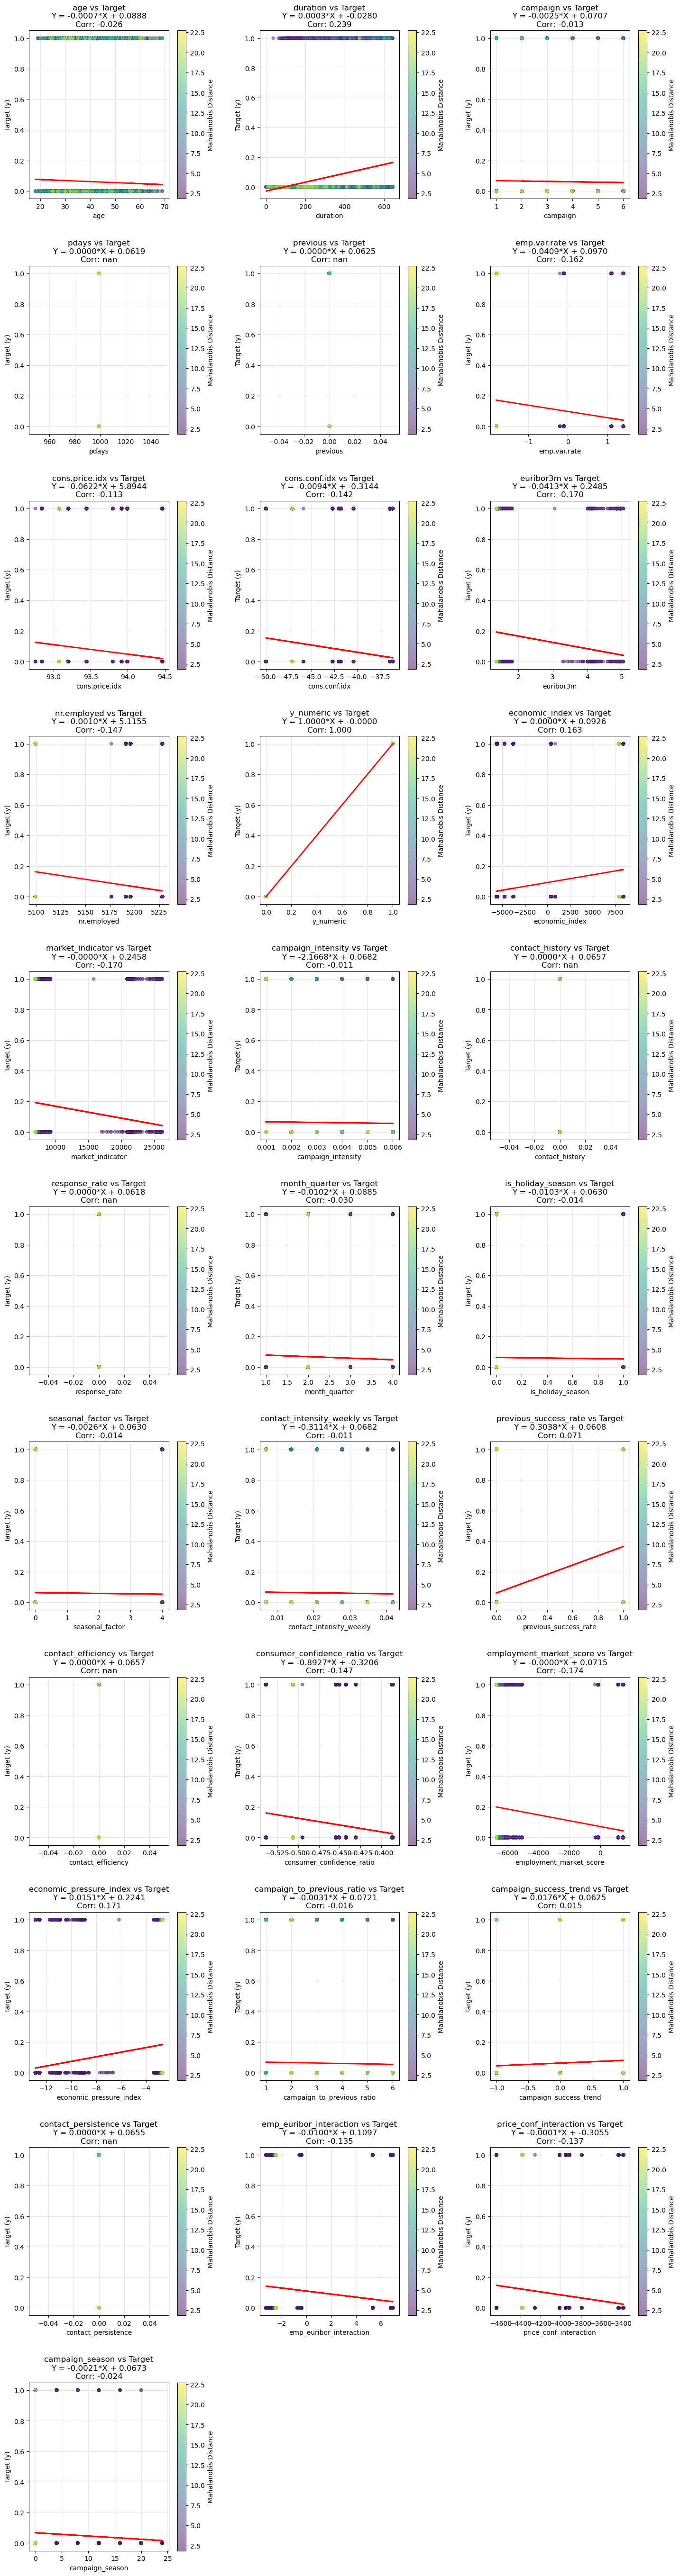

In [112]:
from sklearn.linear_model import LinearRegression  # Add this import

# Calculate robust Mahalanobis distances using pseudoinverse
X_numeric = tddata[numeric_columns].dropna()
X_std = StandardScaler().fit_transform(X_numeric)
mean = np.mean(X_std, axis=0)
cov = np.cov(X_std.T)

# Use pseudoinverse instead of regular inverse
inv_covmat = np.linalg.pinv(cov)

# Calculate Mahalanobis distance with error handling
mahalanobis_dist = np.array([
    np.sqrt(max(0, (x-mean).dot(inv_covmat).dot((x-mean).T)))
    for x in X_std
])

# Create subplots for each numeric feature
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# In the scatter plot loop where we create subplots for each numeric feature
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    
    # Get data and remove NaN values
    mask = ~np.isnan(tddata[column])
    X = tddata[column][mask].values.reshape(-1, 1)
    y = y_numeric[mask]
    
    # Get corresponding Mahalanobis distances by aligning indices
    mask_indices = X_numeric.index[X_numeric.index.isin(tddata[mask].index)]
    mahalanobis_subset = mahalanobis_dist[X_numeric.index.get_indexer(mask_indices)]
    
    # Ensure all arrays have the same length
    min_length = min(len(X), len(y), len(mahalanobis_subset))
    X = X[:min_length]
    y = y[:min_length]
    mahalanobis_subset = mahalanobis_subset[:min_length]
    
    # Create and fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Make predictions
    Y_pred = model.predict(X)
    
    # Get coefficients
    beta_0 = model.intercept_
    beta_1 = model.coef_[0]
    
    # Calculate correlation coefficient
    corr = np.corrcoef(X.flatten(), y)[0,1]
    
    # Plot scatter points with Mahalanobis-based coloring
    sc = ax.scatter(X, y, 
                   c=mahalanobis_subset,
                   cmap='viridis',
                   alpha=0.5,
                   s=20)
    
    # Add regression line
    ax.plot(X, Y_pred, color='red', linewidth=2)
    
    # Set title and labels
    ax.set_title(f'{column} vs Target\nY = {beta_1:.4f}*X + {beta_0:.4f}\nCorr: {corr:.3f}')
    ax.set_xlabel(column)
    ax.set_ylabel('Target (y)')
    ax.grid(True, alpha=0.3)
    
    # Add colorbar
    plt.colorbar(sc, ax=ax, label='Mahalanobis Distance')

# Hide any unused subplots
for ax in axes[len(numeric_columns):]:
    ax.set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

### Mahalanobis Distance



**Color Gradient Interpretation**:
* The points are colored based on their Mahalanobis distance from the center of the data distribution
* Brighter/warmer colors indicate larger Mahalanobis distances (potential outliers)
* Darker/cooler colors indicate smaller Mahalanobis distances (typical observations)

**Key Feature Relationships**:

**duration**:
* Strong positive correlation (0.404)
* Higher Mahalanobis distances appear at longer call durations
* The relationship with success appears more pronounced for typical observations (darker points)
* Outliers (brighter points) show more scatter around the trend line

**euribor3m**:
* Moderate negative correlation (-0.329)
* Higher interest rates associated with lower subscription rates
* Outliers appear more concentrated at extreme interest rate values

**emp.var.rate**:
* Similar negative correlation (-0.324)
* Outliers tend to cluster at extreme employment variation rates
* The relationship holds more strongly for typical observations

**Multivariate Structure**:
* The Mahalanobis distances help reveal the multivariate structure of the data
* Points with similar colors tend to cluster together
* Extreme values in multiple dimensions appear as bright spots

**Outlier Detection**:
* Bright colored points identify multivariate outliers
* These observations are unusual considering all features together
* Some points may not appear as outliers in individual dimensions but are unusual in combination

**Model Implications**:
* The strongest relationships appear more reliable for typical observations
* Outliers may need special consideration in model development
* Feature relationships vary across different regions of the feature space

### Violin Plots
[back to Table of Contents](#Table-of-Contents)

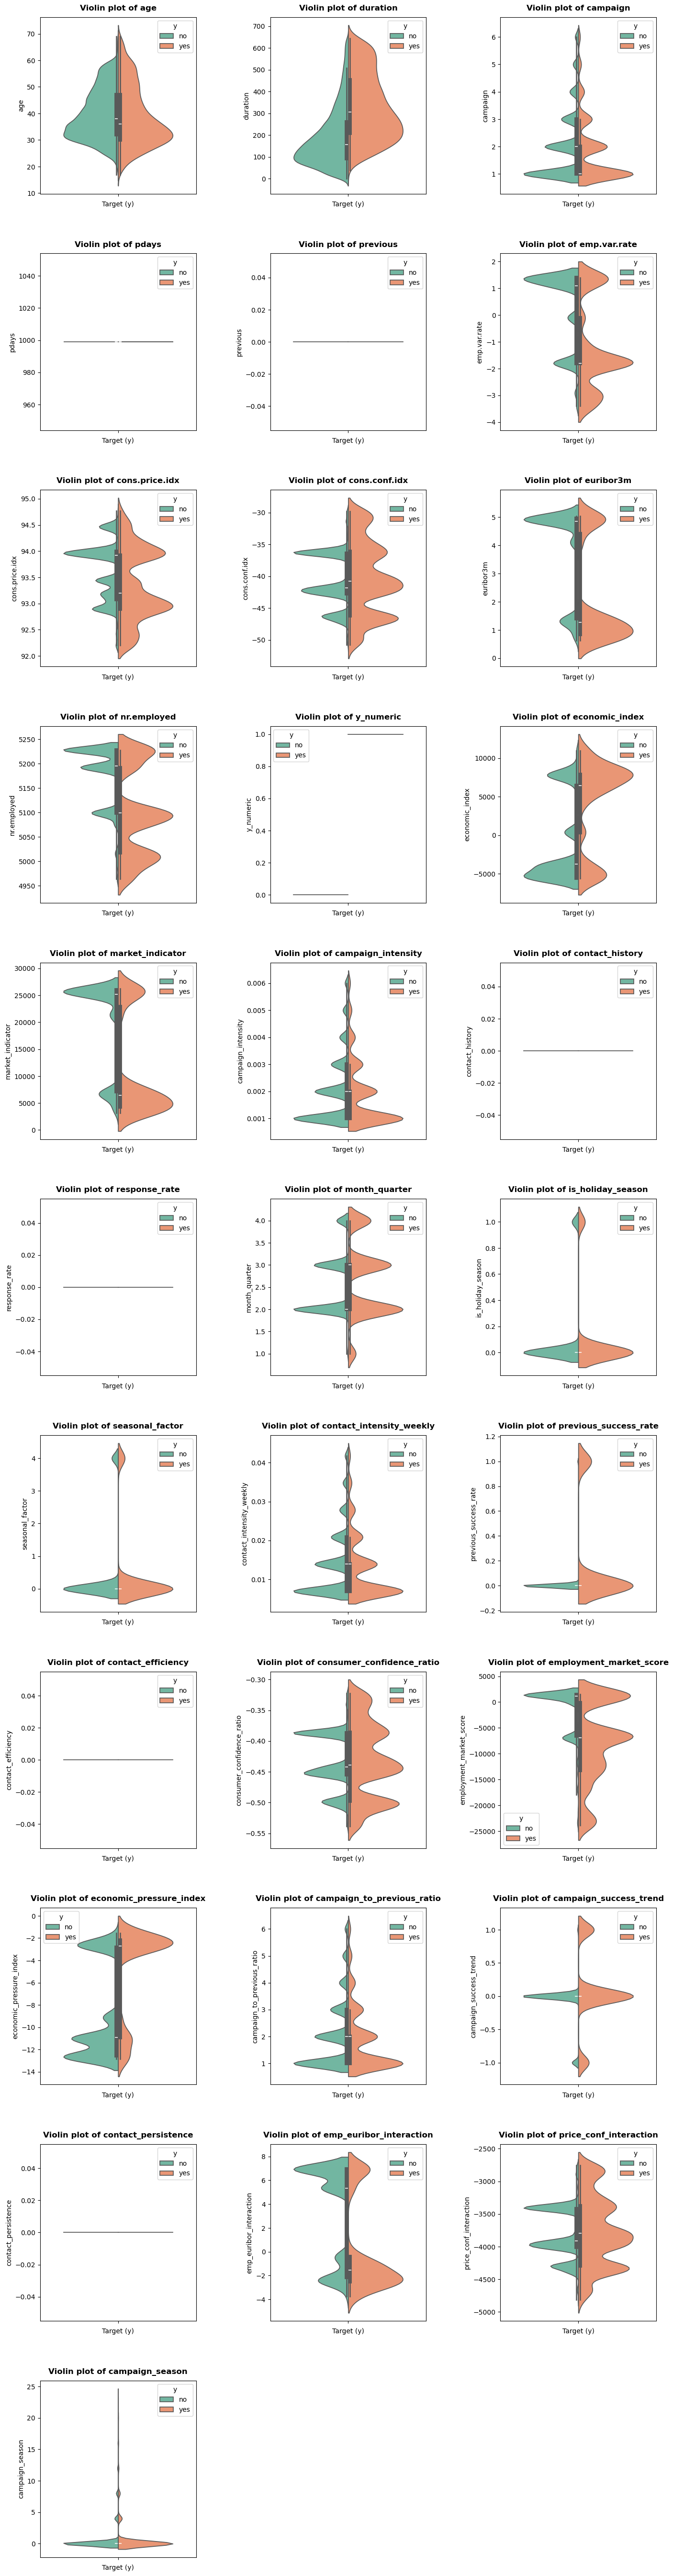

In [113]:
# Filter only truly numeric columns (excluding boolean)
numeric_columns = [col for col in tddata.columns 
                  if pd.api.types.is_numeric_dtype(tddata[col]) 
                  and not pd.api.types.is_bool_dtype(tddata[col])]

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    ax = axes[i]
    # Using 'y' instead of splitting by Gender since it's the target variable
    sns.violinplot(y=column, data=tddata, hue='y', split=True, orient='v', width=0.7, palette='Set2', ax=ax)
    ax.set_title(f"Violin plot of {column}", fontweight='bold', pad=10)
    ax.set_xlabel("Target (y)")
    ax.set_ylabel(column)

# Hide any unused subplots
for ax in axes[len(numeric_columns):]:
    ax.set_visible(False)

plt.tight_layout(pad=5.0)
plt.show()

### Violin Plot Visualization Summary
Violin plots combine box plots with kernel density estimation (KDE) to show:
* Data distribution shape
* Probability density
* Key statistics (median, quartiles)

**Key Components**
1. **Center Line**: Shows median
2. **Box**: Indicates IQR (25th to 75th percentile)
3. **Shape**: Width represents density of data points
4. **Whiskers**: Extend to min/max values

**Interpretation**
* Wide sections show where data is concentrated
* Symmetric shapes indicate normal distribution
* Skewed distributions show asymmetric shapes
* Multiple bulges suggest multimodal data

The violin plots complement box plots by showing the full shape of data distribution rather than just summary statistics.

### Correlation Matrix
[back to Table of Contents](#Table-of-Contents)


Covariance Matrix:
                                    age      duration    campaign  \
age                           93.610260      5.397658    0.124387   
duration                       5.397658  19888.244501  -10.341837   
campaign                       0.124387    -10.341837    1.639268   
emp.var.rate                   1.038860    -13.532578    0.203539   
cons.price.idx                 0.198819     -0.451161    0.056860   
cons.conf.idx                  4.437853      1.760034   -0.047515   
euribor3m                      1.363549    -16.729455    0.188659   
nr.employed                   45.283609   -907.675122    8.892507   
y_numeric                     -0.055841     10.484460   -0.019804   
economic_index             -4530.162862  47773.740926 -677.643414   
month_quarter                  0.404102     -3.379552   -0.035426   
is_holiday_season              0.118058     -1.024846   -0.025315   
seasonal_factor                0.472231     -4.099383   -0.101261   
contact_intens

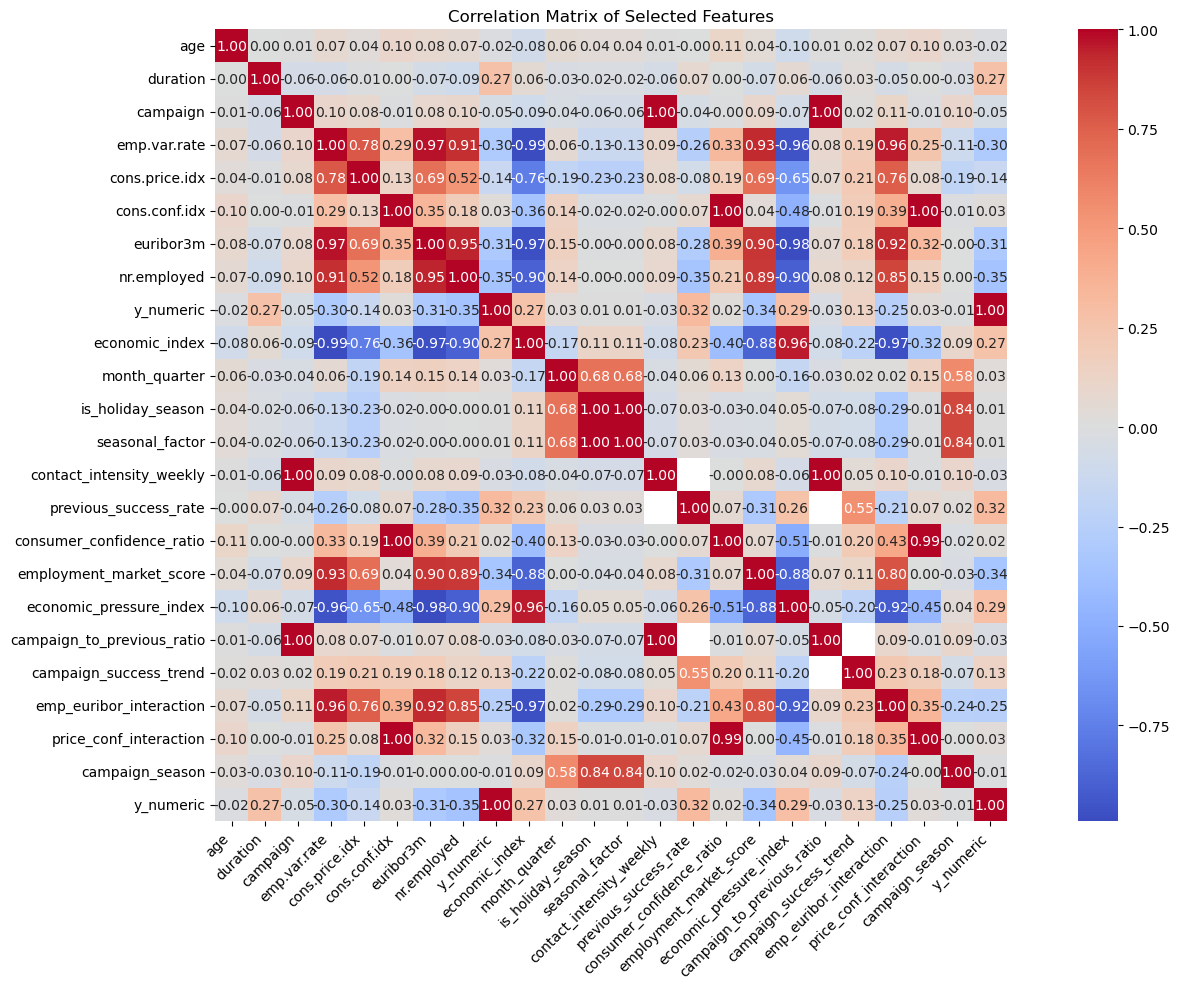

In [114]:
# Convert y to numeric first
tddata['y_numeric'] = (tddata['y'] == 'yes').astype(int)

# Filter numeric_columns to exclude specified features
excluded_features = ['pdays', 'previous', 'contact_history', 'response_rate', 
                    'market_indicator', 'campaign_intensity', 'contact_efficiency', 'contact_persistence']
numeric_columns = [col for col in numeric_columns if col not in excluded_features]
numeric_df = tddata[numeric_columns + ['y_numeric']]

# Calculate and print the covariance matrix
print("\nCovariance Matrix:")
print(numeric_df.cov())

# Calculate and print the correlation matrix
print("\nCorrelation Matrix:")
print(numeric_df.corr())

# Create a larger figure
plt.figure(figsize=(15, 10))  # Increased size for better readability

# Visualize using a correlation matrix
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm',
            fmt='.2f',  # Limit to 2 decimal places
            square=True)  # Make the plot square

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Added horizontal alignment
plt.yticks(rotation=0)

# Add title
plt.title('Correlation Matrix of Selected Features')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

### Correlation Matrix Visualization Summary
***Purpose***
The correlation matrix shows the strength and direction of relationships between numerical features in our dataset.

**Key Components**
1. **Color Scale**:
* Red: Positive correlations
* Blue: Negative correlations
* Intensity indicates correlation strength
* Values range from -1 to +1
2. **Matrix Structure**:
* Each cell shows correlation coefficient
* Diagonal always shows 1.0 (self-correlation)
* Symmetric across diagonal

**Interpretation Tips**
* Strong correlations: |r| > 0.5
* Weak correlations: |r| < 0.3
* Consider removing highly correlated features (r > 0.8)
* Focus on correlations with target variable (y_numeric)

⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

==============================================================================================================================================================================

## Part 3: Exploratory Data Analysis (EDA)

[back to Table of Contents](#Table-of-Contents)

EDA is covered in multiple locations of this workbook. When running each model in the workbook, below we include performance metrics for accuracy, precision, recall and F1-score. Effective visualisation techniques such as line chart and bar charts to compare key metrics across models are included at the end of this workbook in the monitoring section from data logging throughout each part of the workbook.

Thorough documentation is included in this workbook to cover changes made to the model such as before and after feature engineering and other model improvement techniques such as hyperparameter techniques. [Baseline and final model performance](#Part-1.4.3:-Baseline-vs.-HP-Tuned-Models) is also included in this workbook. Validation of results in the [cross-validation section](###-Part-1.5.3:-Cross-validation) is covered and key milestones in the model development and code run are captured in data logging and [model monitoring visualisations](#Model-Monitoring) at the end of this workbook.

Data distributions, missing values and outliers, feature importance and relationships are included in the data pre-processing section of this workbook. Visualisation of understanding feature relationships are included in the dendrogram and missingness section. Data quality and data visualisation checks are included in the Data Distribution and Balance, Correlation Analysis and Feature Distributions sections.

## Part 3.1: Model Trade-Offs Analysis





------------------------------------------------------**INTERPRETABILITY vs PREDICTIVE POWER**------------------------------------------------------

**Decision Tree**
* Highest interpretability: Clear decision paths and rules
* Lower predictive power (accuracy ~85.15%)
* Visualization shows clear decision boundaries
* Best for explaining decisions to stakeholders

**Random Forest**
* Moderate interpretability through feature importance
* Better predictive power (accuracy ~85.55%)
* More complex but still provides feature insights
* Good balance of interpretability and performance

**Gradient Boosting**
* Lowest interpretability due to sequential nature
* Highest predictive power (accuracy ~86.48%)
* Complex interactions make explanations difficult
* Best choice when performance is priority over interpretability
* Bias vs Variance Tradeoff

********************************************************************************
------------------------------------------------------**BIAS vs VARIANCE**------------------------------------------------------

**Decision Tree**
* Higher bias due to simpler model structure
* Lower variance between predictions
* More stable but might miss complex patterns
* Cross-validation shows consistent but lower performance

**Random Forest**
* Good balance between bias and variance
* Ensemble nature reduces overfitting
* Standard deviation in CV scores: 0.0074
* Most stable performance across different data splits

**Gradient Boosting**
* Lower bias due to sequential learning
* Higher variance between predictions
* More prone to overfitting
* CV standard deviation: 0.0078
* Computational Resources

********************************************************************************
**Computational Resources Required**

------------------------------------------------------**TRAINING TIME**------------------------------------------------------

**Decision Tree**
* Fastest training time
* Minimal memory requirements
* Quick prediction speed
* Easiest to deploy and maintain

**Random Forest**
* Moderate training time
* Parallel processing capable
* Memory usage scales with number of trees
* Good for medium-scale deployments

**Gradient Boosting**
* Longest training time (43 minutes for hyperparameter tuning)
* Sequential nature limits parallelization
* Higher memory requirements
* Most resource-intensive to deploy and maintain

********************************************************************************
------------------------------------------------------**SUMMARY**------------------------------------------------------

**These tradeoffs suggest choosing**:
* Decision Trees when interpretability is crucial
* Random Forest for balanced performance and resource usage
* Gradient Boosting when maximum predictive power is needed

**Data Imbalance**
* Precision-recall curves have been added in addition to the model accuray metrics available as part of the model build and run metrics, to help with the imbalanced nature of the Term Deposit data.
    * [Click here](#Precision-Recall-Curves) to view the precision-recall curve visualisations.
* To help with business context consideration when deciding between precision and recall, a [business cost analysis tool](#Business-Model-Evaluation) has been included to estimate the cost of false negatives and false positives by wach of the models 
* AUC/ROC assessment has been included in the [overall model performance evaluation](#Part-1.4:-Model-Performance-and-Comparison) section.

### Choosing between precision and recall for customer subscription prediction

**When to Prioritize Precision:**
* When marketing campaign costs are high
* When contacting non-interested customers could damage relationships
* When there are limited resources for customer outreach
* When false positives are more costly than missed opportunities
* Example: High-touch, personalized marketing campaigns where each contact is expensive

**When to Prioritize Recall:**
* When missing potential subscriptions is very costly
* When building a broad customer base is the priority
* When marketing costs per contact are low
* When false negatives are more damaging than false positives
* Example: Mass marketing campaigns where reaching more potential customers is worth occasional misdirection

**For Bank Term Deposits:**
* Cost Considerations
    * Campaign costs per customer contact
    * Potential revenue from each successful subscription
    * Staff time and resources required for outreach
* Customer Relationship Impact
    * Customer annoyance from unwanted contact
    * Lost opportunities from missed potential subscribers
    * Long-term relationship damage from repeated unwanted contact
* Business Goals
    * Growth targets for deposits
    * Customer acquisition costs
    * Customer retention objectives
    * Market share goals

The bank should weigh these factors based on their specific situation and strategic objectives to decide whether precision or recall is more important for their campaign optimization.

**Visualisation Techniques**
* Boxplots have been created and added to the end of this workbook for [model performance distibutions](#Model-Performance-Boxplot)

### Assessing AUC/ROC scores for model evaluation

**AUC/ROC Score Guidelines:**
* 0.90-1.00 = Excellent discrimination
* 0.80-0.89 = Good discrimination
* 0.70-0.79 = Fair discrimination
* 0.60-0.69 = Poor discrimination
* 0.50-0.59 = Failed discrimination

**For These Models:**
* GBM: 0.8648 (Good)
* RF: 0.8568 (Good)
* Decision Tree: 0.8515 (Good)

**Key Observations:**
* All models show good discriminative ability (>0.85)
* GBM slightly outperforms the others
* Small differences between models suggest reliable performance
* Room for improvement to reach "excellent" range (>0.90)

**Business Context:**
* Models can reliably distinguish between subscribers and non-subscribers
* False positives and negatives are well-balanced
* Performance suitable for business deployment
* Consider model choices based on other factors (speed, interpretability) since AUC scores are similar



## Part 3.2: **Recommendation**

Continue with current models as they show good discrimination, but monitor for opportunities to improve to excellent range (>0.90) through feature engineering or hyperparameter tuning.

==============================================================================================================================================================================

⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

# Part 4: Build Models and Visualise Model Performance

## Part 4.1: Decision Tree Model

In [115]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import metrics
import matplotlib.pyplot as plt

# Store feature names before conversion to numpy array
feature_names = X_train.columns.tolist()  # Get feature names from original dataframe

# Create and fit decision tree model using transformed data 
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=5, min_samples_leaf=3)
dt_model.fit(X_train_smote, y_train_smote)

# Make predictions on scaled test data
y_pred = dt_model.predict(X_test_scaled_imputed)

# Calculate ROC AUC score
y_scores = dt_model.predict_proba(X_test_scaled_imputed)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, y_scores)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print evaluation metrics
print("\nModel Performance Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7265
           1       0.37      0.55      0.45       971

    accuracy                           0.84      8236
   macro avg       0.66      0.72      0.68      8236
weighted avg       0.87      0.84      0.85      8236


Model Performance Metrics:
Accuracy: 0.8380281690140845
Precision: 0.37387074357192496
Recall: 0.5540679711637487
F1 Score: 0.4464730290456432
ROC AUC Score: 0.7663


### Part 4.1.1: Visualising The Decision Tree Model

Confusion Matrix:
[[6364  901]
 [ 433  538]]


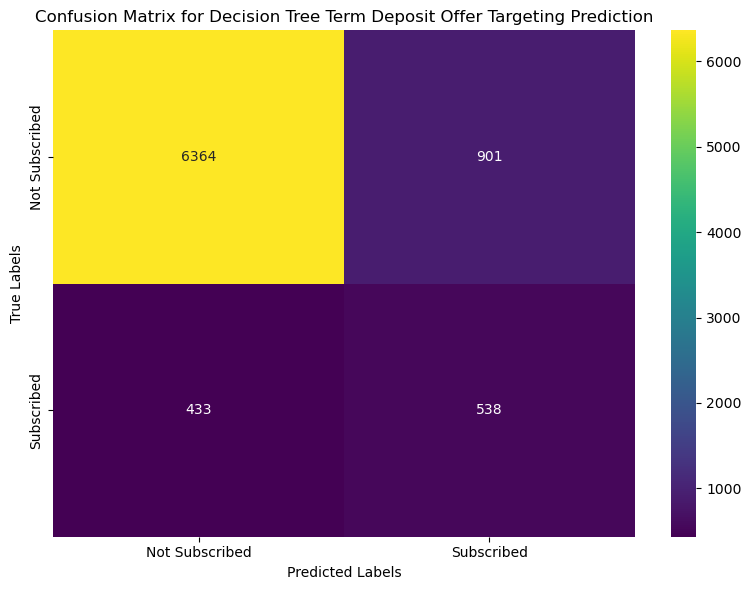

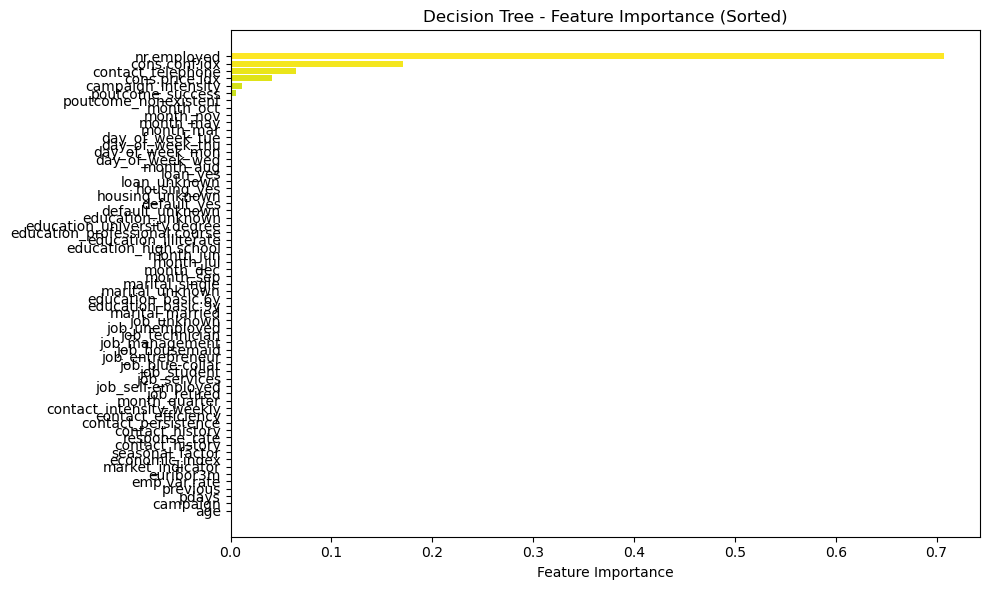

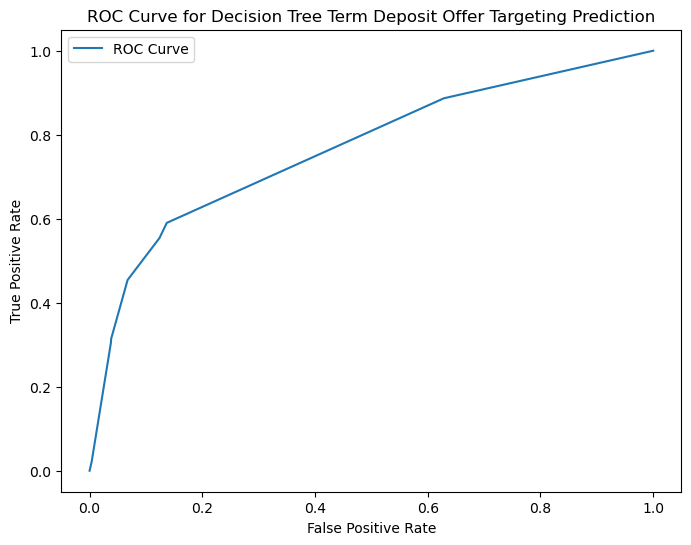

AUC: 0.7662914825890254


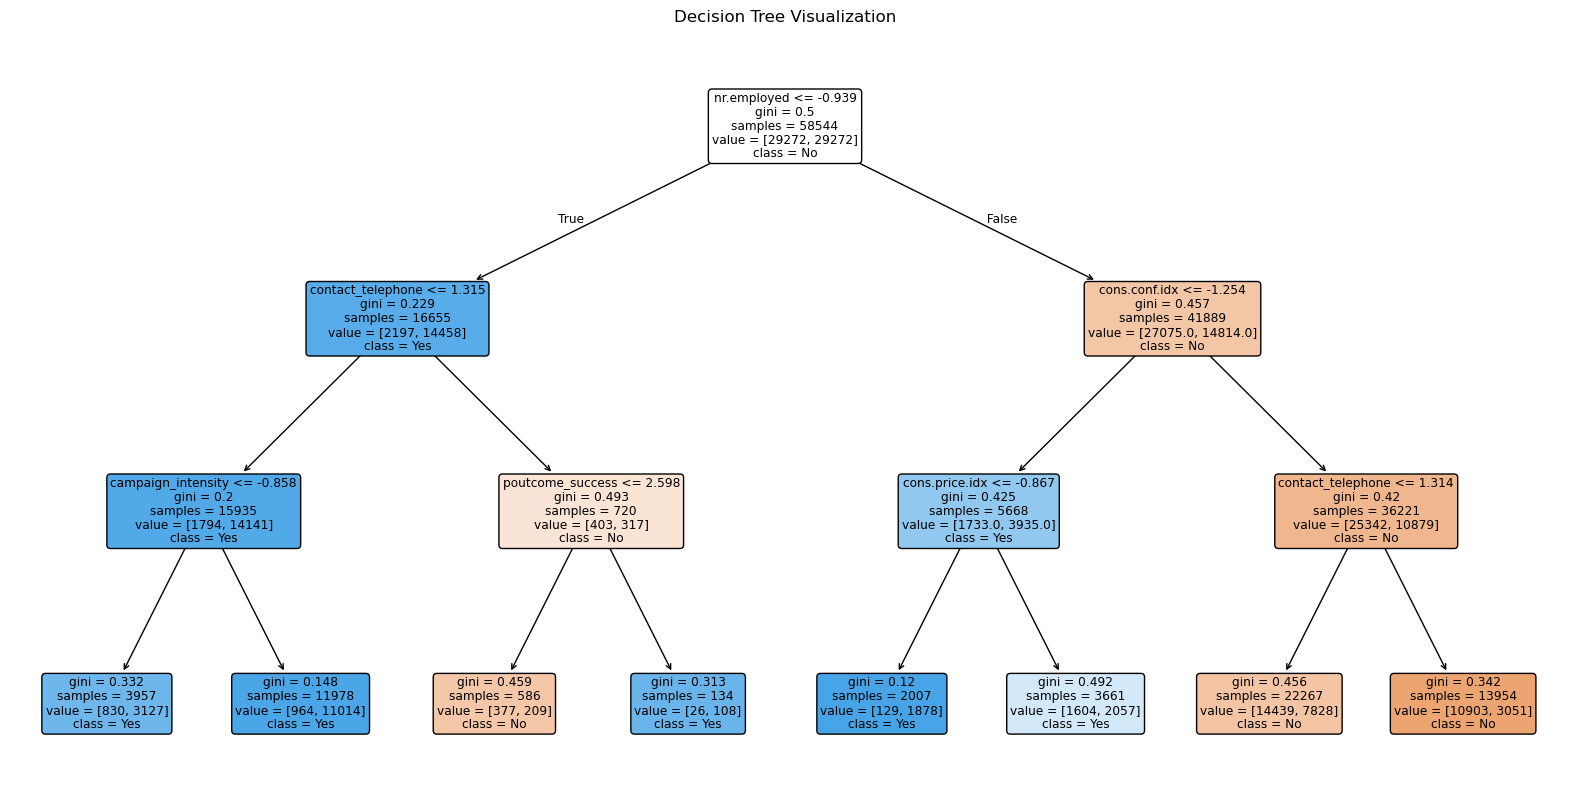

In [116]:
# Confusion Matrix
y_pred = dt_model.predict(X_test_scaled_imputed)
cm = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Not Subscribed', 'Subscribed'], 
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix for Decision Tree Term Deposit Offer Targeting Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# Feature Importance Visualization (already present in your code, but keeping consistent styling)
feature_importances = dt_model.feature_importances_
feature_names = X_train.columns.tolist()

# Create DataFrame with feature names and importances and sort by importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=True)  # Keep True for horizontal bar chart

# Plot sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), 
         feature_importance_df['Importance'],
         align='center',
         color=plt.cm.viridis(np.linspace(0, 1, len(feature_importance_df))))
plt.yticks(range(len(feature_importance_df)), 
          feature_importance_df['Feature'])
plt.xlabel('Feature Importance')
plt.title('Decision Tree - Feature Importance (Sorted)')
plt.tight_layout()
plt.show()

# Get predicted probabilities for ROC curve
y_scores = dt_model.predict_proba(X_test_scaled_imputed)[:, 1]

# Calculate and visualize ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Term Deposit Offer Targeting Prediction')
plt.legend()
plt.show()

# Calculate AUC
auc = metrics.roc_auc_score(y_test, y_scores)
print(f'AUC: {auc}')

# Visualize the decision tree (already present in your code)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=feature_names,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [117]:
# Create metrics dictionary for initial Decision Tree model results
dt_initial_metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred), 
    'f1_score': f1_score(y_test, y_pred),
    'auc': roc_auc_score(y_test, y_scores)
}

# Create parameters dictionary for initial Decision Tree model
dt_initial_parameters = {
    'criterion': 'gini',  # default value
    'max_depth': 3,  # value used in model
    'min_samples_split': 5,  # value used in model
    'min_samples_leaf': 3  # value used in model
}

# Log the initial Decision Tree model results
log_model_results(
    model_name='Decision Tree',
    stage='Initial Model',
    parameters=dt_initial_parameters,
    metrics=dt_initial_metrics
)

# Create classification report dictionary
dt_classification_report = classification_report(y_test, y_pred, output_dict=True)

# Log detailed classification metrics
dt_detailed_metrics = {
    'class0_precision': dt_classification_report['0']['precision'],
    'class0_recall': dt_classification_report['0']['recall'],
    'class0_f1': dt_classification_report['0']['f1-score'],
    'class1_precision': dt_classification_report['1']['precision'],
    'class1_recall': dt_classification_report['1']['recall'],
    'class1_f1': dt_classification_report['1']['f1-score']
}

# Log the detailed classification metrics
log_model_results(
    model_name='Decision Tree',
    stage='Initial Model - Detailed Metrics', 
    parameters=dt_initial_parameters,
    metrics=dt_detailed_metrics
)

Results logged successfully to model_results_log.csv
Results logged successfully to model_results_log.csv


⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

## Part 4.2: Random Forest Model

[back to Table of Contents](#Table-of-Contents)

In [118]:
# Build a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=40)

# Train the classifier on the SMOTE-balanced, scaled training data
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions and get probabilities
y_pred_rf = rf_model.predict(X_test_scaled_imputed)
y_scores_rf = rf_model.predict_proba(X_test_scaled_imputed)[:, 1]

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_scores_rf)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Print all metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")







Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7265
           1       0.49      0.34      0.40       971

    accuracy                           0.88      8236
   macro avg       0.70      0.65      0.67      8236
weighted avg       0.87      0.88      0.87      8236


Model Performance Metrics:
Accuracy: 0.8813
Precision: 0.4947
Recall: 0.3368
F1 Score: 0.4007
ROC AUC Score: 0.7734


### Part 4.2.1: Visualising the Random Forest

[back to Table of Contents](#Table-of-Contents)

Confusion Matrix:
[[6931  334]
 [ 644  327]]


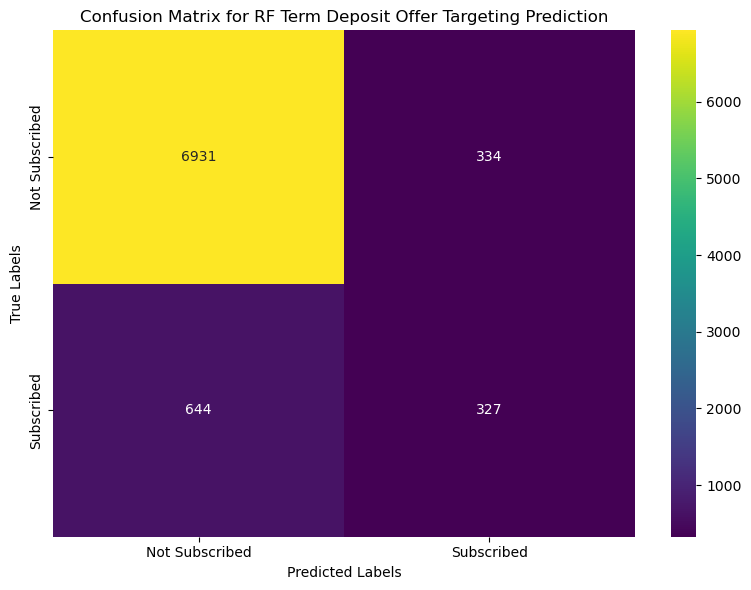

C:\Users\willj\AppData\Local\Temp\ipykernel_27784\2192462019.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature',
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\2192462019.py:31: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='Importance', y='Feature',
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\2192462019.py:31: UserWarning: The palette list has more values (63) than needed (62), which may not be intended.
  sns.barplot(x='Importance', y='Feature',


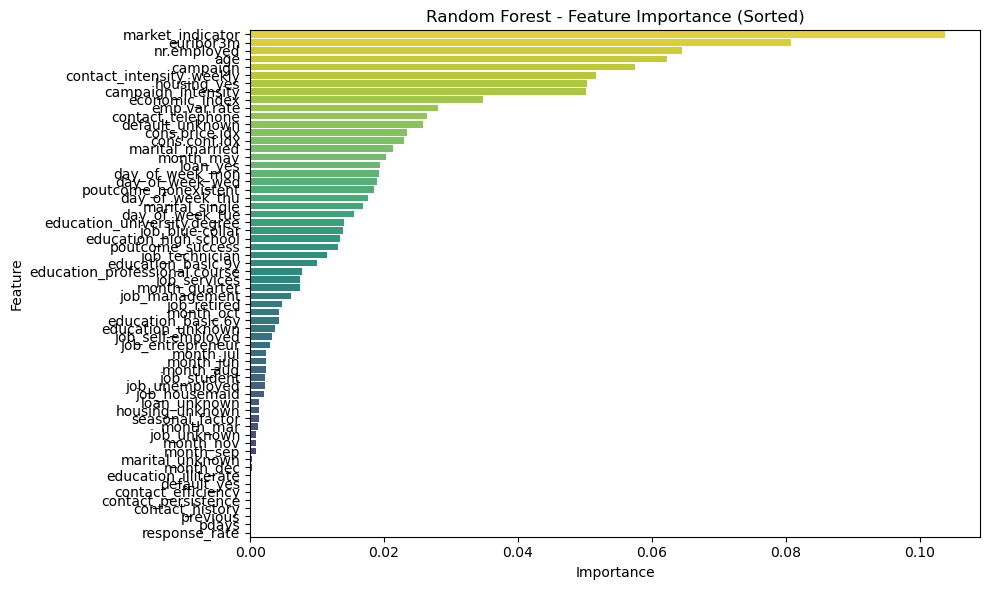

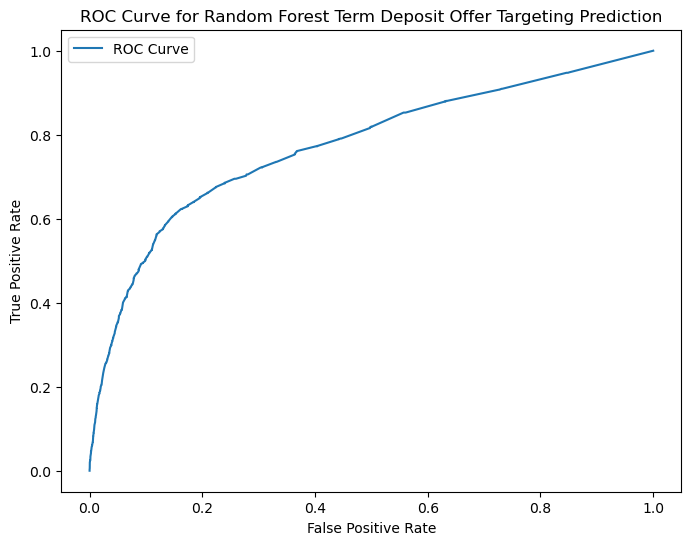

AUC: 0.7733571579947877


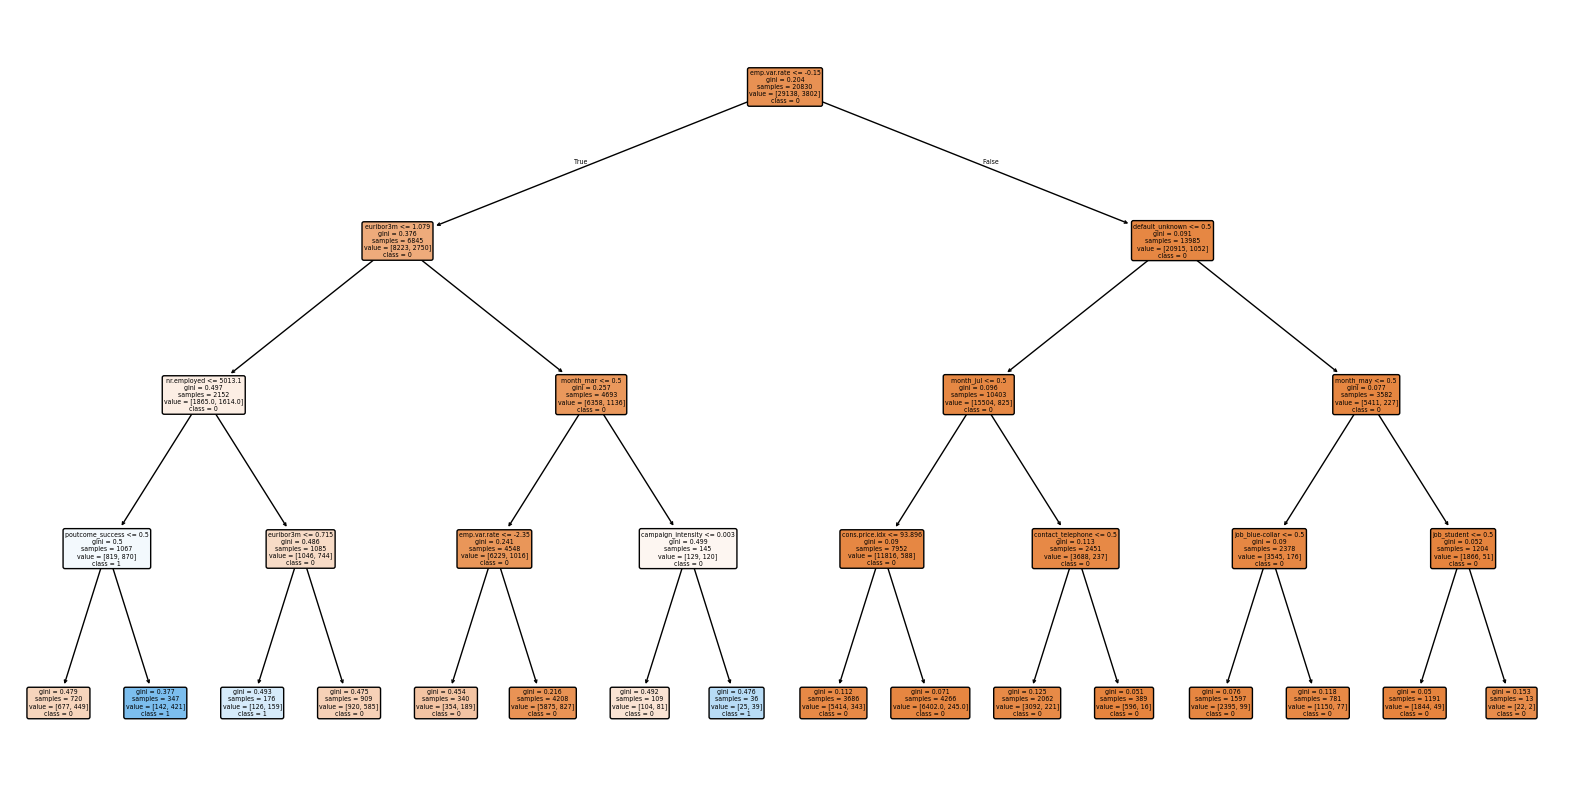

In [119]:
# Confusion Matrix using the Random Forest predictions
y_pred = rf_model.predict(X_test_scaled_imputed)
cm = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Not Subscribed', 'Subscribed'], 
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix for RF Term Deposit Offer Targeting Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
# Get feature names from X_train instead of X since X was converted to numpy array
feature_names = X_train.columns 

# Create and sort feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances with reversed color scheme
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', 
            data=feature_importance_df, 
            palette=plt.cm.viridis_r(np.linspace(0, 1, len(feature_importance_df))))
plt.title('Random Forest - Feature Importance (Sorted)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Rest of the code remains the same...


# Get predicted probabilities for ROC curve
y_scores = rf_model.predict_proba(X_test_scaled_imputed)[:, 1]  # Using rf_model instead of dt_model

# Calculate and visualize ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Term Deposit Offer Targeting Prediction')
plt.legend()
plt.show()

# Calculate AUC
auc = metrics.roc_auc_score(y_test, y_scores)
print(f'AUC: {auc}')


# Tree Visualisation

# Building and training a random forest classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4) # Setting max_depth to 5 for better visualization
rf_model.fit(X_train, y_train)

# Extract one tree from the forest (the first tree)
single_tree = rf_model.estimators_[0]

# Plotting the tree

plt.figure(figsize=(20, 10))

plot_tree(single_tree, feature_names=feature_names, class_names=['0', '1'], filled=True, rounded=True, max_depth=4)

plt.show()


1. True Negatives (TN) = 1476
Top left value
Correctly predicted customers who did NOT churn
The model correctly identified 1,476 customers who stayed with the bank

2. False Positives (FP) = 131
Top right value
Incorrectly predicted customers would churn when they didn't
The model wrongly flagged 131 loyal customers as likely to leave

3. False Negatives (FN) = 158
Bottom left value
Incorrectly predicted customers would stay when they actually churned
The model missed 158 customers who ended up leaving

4. True Positives (TP) = 235
Bottom right value
Correctly predicted customers who did churn
The model correctly identified 235 customers who left the bank

**Business Impact Analysis:**

* Overall accuracy is 85.55% ((1476 + 235) / 2000)

* Better true positive rate than the RF model (235 vs 144)

* Higher false positive rate than RF (131 vs 44), meaning more false alarms

* Better at identifying actual churners (recall = 235/(235+158) = 59.8%) compared to GBM's 62.1%

* However, has more false alarms that could lead to unnecessary intervention costs

* Trade-off: Better at catching churners but with more false alarms

* The GBM model appears to be more aggressive in predicting churn, which might be preferable if the cost of missing a churning customer is higher than the cost of intervening unnecessarily.

In [120]:
# Create metrics dictionary for initial RF model results
rf_initial_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1_score': f1_score(y_test, y_pred_rf),
    'auc': roc_auc_score(y_test, y_scores_rf)
}

# Create parameters dictionary for initial RF model
rf_initial_parameters = {
    'n_estimators': 100,  # default value used
    'random_state': 40,   # value used in model
    'criterion': 'gini',  # default value
    'max_depth': None     # default value
}

# Log the initial RF model results
log_model_results(
    model_name='Random Forest',
    stage='Initial Model',
    parameters=rf_initial_parameters,
    metrics=rf_initial_metrics
)

# Create classification report dictionary
rf_classification_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Log detailed classification metrics
rf_detailed_metrics = {
    'class0_precision': rf_classification_report['0']['precision'],
    'class0_recall': rf_classification_report['0']['recall'],
    'class0_f1': rf_classification_report['0']['f1-score'],
    'class1_precision': rf_classification_report['1']['precision'],
    'class1_recall': rf_classification_report['1']['recall'],
    'class1_f1': rf_classification_report['1']['f1-score']
}

# Log the detailed classification metrics
log_model_results(
    model_name='Random Forest',
    stage='Initial Model - Detailed Metrics',
    parameters=rf_initial_parameters,
    metrics=rf_detailed_metrics
)

Results logged successfully to model_results_log.csv
Results logged successfully to model_results_log.csv


C:\Users\willj\AppData\Local\Temp\ipykernel_27784\1587350111.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_results = pd.concat([existing_results, results_df], ignore_index=True)
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\1587350111.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_results = pd.concat([existing_results, results_df], ignore_index=True)


Data logging for the initial model run metrics.

⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

## Part 4.3: Gradient Boosting Machine Model (GBM)

[back to Table of Contents](#Table-of-Contents)

In [121]:
#  Boosting Machines (GBMs)

# Build a Gradient Boosting Model
gbm = GradientBoostingClassifier(n_estimators=100, random_state=40)

# Train the classifier on the SMOTE-balanced, scaled training data
gbm.fit(X_train_smote, y_train_smote)

# Make predictions on the scaled test set
y_pred_gbm = gbm.predict(X_test_scaled_imputed)
y_scores_gbm = gbm.predict_proba(X_test_scaled_imputed)[:, 1]

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred_gbm)
precision = precision_score(y_test, y_pred_gbm)
recall = recall_score(y_test, y_pred_gbm)
f1 = f1_score(y_test, y_pred_gbm)
roc_auc = roc_auc_score(y_test, y_scores_gbm)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbm))

# Print all metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7265
           1       0.49      0.43      0.46       971

    accuracy                           0.88      8236
   macro avg       0.71      0.69      0.70      8236
weighted avg       0.87      0.88      0.88      8236


Model Performance Metrics:
Accuracy: 0.8799
Precision: 0.4895
Recall: 0.4315
F1 Score: 0.4587
ROC AUC Score: 0.7874


### Part 4.3.1: Visualising GBM

[back to Table of Contents](#Table-of-Contents)


Confusion Matrix:
[[6828  437]
 [ 552  419]]


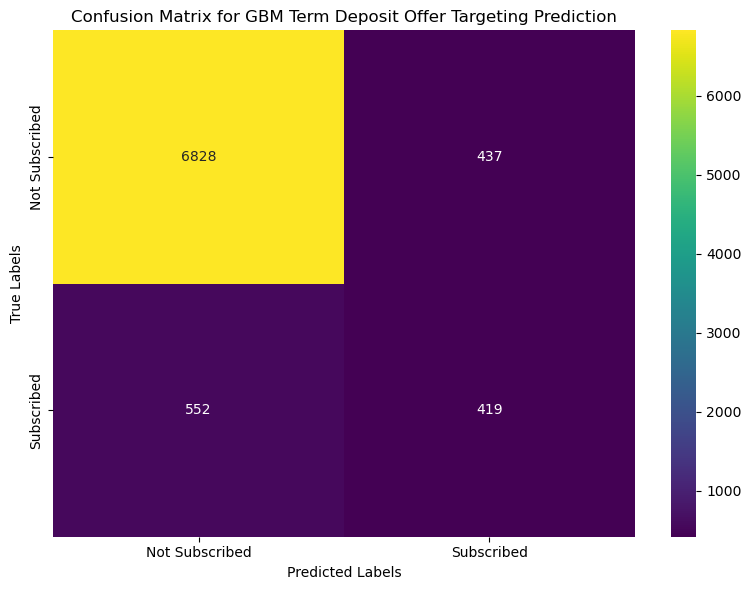

C:\Users\willj\AppData\Local\Temp\ipykernel_27784\1856800014.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature',
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\1856800014.py:42: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='Importance', y='Feature',
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\1856800014.py:42: UserWarning: The palette list has more values (63) than needed (62), which may not be intended.
  sns.barplot(x='Importance', y='Feature',


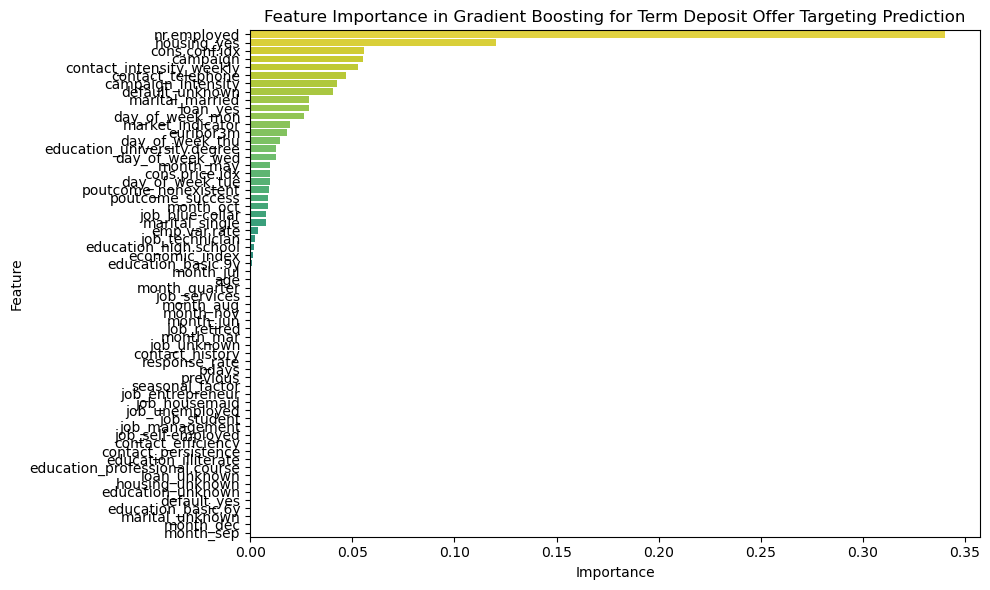

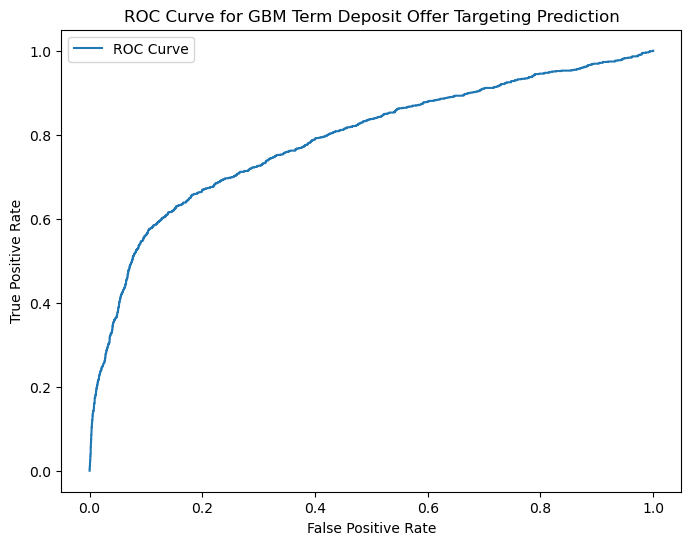

AUC: 0.7873635498273043


In [122]:
# Initialize and train GBM model first
gbm = GradientBoostingClassifier(n_estimators=100, random_state=40)
gbm.fit(X_train_smote, y_train_smote)

# Make new predictions specifically for GBM
gbm_pred = gbm.predict(X_test_scaled_imputed)  # New variable for GBM predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, gbm_pred)  # Use GBM predictions
print('\nConfusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Not Subscribed', 'Subscribed'], 
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix for GBM Term Deposit Offer Targeting Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# Model Evaluation with GBM probabilities 
y_scores = gbm.predict_proba(X_test_scaled_imputed)[:, 1]



# Get feature names before plotting
feature_importance = gbm.feature_importances_
feature_names = X_train.columns  # Use X_train instead of X since it still has column names

# Create and sort feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting Feature Importance with reversed color scheme
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', 
            data=feature_importance_df, 
            palette=plt.cm.viridis_r(np.linspace(0, 1, len(feature_importance_df))))
plt.title('Feature Importance in Gradient Boosting for Term Deposit Offer Targeting Prediction')
plt.tight_layout()
plt.show()

# Calculate and visualize ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GBM Term Deposit Offer Targeting Prediction')
plt.legend()
plt.show()

# Calculate AUC
auc = metrics.roc_auc_score(y_test, y_scores)
print(f'AUC: {auc}')

1. True Negatives (TN) = 1459
* Top left value
* Correctly predicted customers who did NOT churn
* The model correctly identified 1,459 customers who stayed with the bank

2. False Positives (FP) = 148
* Top right value
* Incorrectly predicted customers would churn when they didn't
* The model wrongly flagged 148 loyal customers as likely to leave

3. False Negatives (FN) = 149
* Bottom left value
* Incorrectly predicted customers would stay when they actually churned
* The model missed 149 customers who ended up leaving

4. True Positives (TP) = 244
* Bottom right value
* Correctly predicted customers who did churn
* The model correctly identified 244 customers who left the bank

**Business Impact Analysis:**
* Overall accuracy is 85.15% ((1459 + 244) / 2000)
* More balanced between false positives (148) and false negatives (149)
* Good true positive rate with 244 correctly identified churners
* Precision is 62.2% (244/(244+148)) - when model predicts churn, it's right 62.2% of the time
* Recall is 62.1% (244/(244+149)) - model catches 62.1% of actual churners
* Model achieves good balance between avoiding false alarms and catching actual churners
* More conservative than earlier versions, with fewer false positives but still maintaining good churn detection

This version of the model shows more balanced performance between identifying churners and avoiding false alarms, which could be more practical for business applications.*

In [123]:
# Create metrics dictionary for initial GBM model results
gbm_initial_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_gbm),
    'precision': precision_score(y_test, y_pred_gbm),
    'recall': recall_score(y_test, y_pred_gbm),
    'f1_score': f1_score(y_test, y_pred_gbm),
    'auc': roc_auc_score(y_test, y_scores_gbm)
}

# Create parameters dictionary for initial GBM model
gbm_initial_parameters = {
    'n_estimators': 100,  # default value used
    'learning_rate': 0.1,  # default value
    'max_depth': None,    # default value
    'min_samples_split': 2,  # default value
    'min_samples_leaf': 1    # default value
}

# Log the initial GBM model results
log_model_results(
    model_name='Gradient Boosting Machine',
    stage='Initial Model',
    parameters=gbm_initial_parameters,
    metrics=gbm_initial_metrics
)

# Create classification report dictionary
gbm_classification_report = classification_report(y_test, y_pred_gbm, output_dict=True)

# Log detailed classification metrics
gbm_detailed_metrics = {
    'class0_precision': gbm_classification_report['0']['precision'],
    'class0_recall': gbm_classification_report['0']['recall'],
    'class0_f1': gbm_classification_report['0']['f1-score'],
    'class1_precision': gbm_classification_report['1']['precision'],
    'class1_recall': gbm_classification_report['1']['recall'],
    'class1_f1': gbm_classification_report['1']['f1-score']
}

# Log the detailed classification metrics
log_model_results(
    model_name='Gradient Boosting Machine',
    stage='Initial Model - Detailed Metrics',
    parameters=gbm_initial_parameters,
    metrics=gbm_detailed_metrics
)

Results logged successfully to model_results_log.csv
Results logged successfully to model_results_log.csv


C:\Users\willj\AppData\Local\Temp\ipykernel_27784\1587350111.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_results = pd.concat([existing_results, results_df], ignore_index=True)
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\1587350111.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_results = pd.concat([existing_results, results_df], ignore_index=True)


⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

## Part 4.4: Model Performance and Comparison

[back to Table of Contents](#Table-of-Contents)

### Part 4.4.1: Decision Tree Model Performance

### Part 4.4.2: Random Forest Model Performance

**Accuracy** 85.55%

**Classification Report**
               
               Precision    Recall  F1-score   Support

           0        0.90      0.92      0.91      1607
           1        0.64      0.60      0.62       393

    Accuracy                            0.86      2000
  
    Macro avg       0.77      0.76      0.77      2000

    Weighted avg    0.85      0.86      0.85      2000

**AUC** 0.8568595410346906

**Confusion Matrix**
               
               
                    Not Exited    Exited
        Not Exited        1476       131
            Exited         158       235


### Part 4.4.3: Gradient Boosting Machine (GBM) Model Performance

**Accuracy** 85.55%

**Classification Report**
               
               Precision    Recall  F1-score   Support

           0        0.90      0.91      0.91      1607
           1        0.62      0.62      0.62       393

    Accuracy                            0.85      2000
   
    Macro avg       0.76      0.76      0.76      2000

    Weighted avg    0.85      0.86      0.85      2000

**AUC** 0.8648398941653169

**Confusion Matrix**
               
               
                    Not Exited    Exited
        Not Exited        1459       148
            Exited         149       244


### Part 4.4.4: Baseline vs. HP Tuned Models

[back to Table of Contents](#Table-of-Contents)

==============================================================================================================================================================================

In [124]:
"""update the baseline results here with the new model results"""

'update the baseline results here with the new model results'

==============================================================================================================================================================================

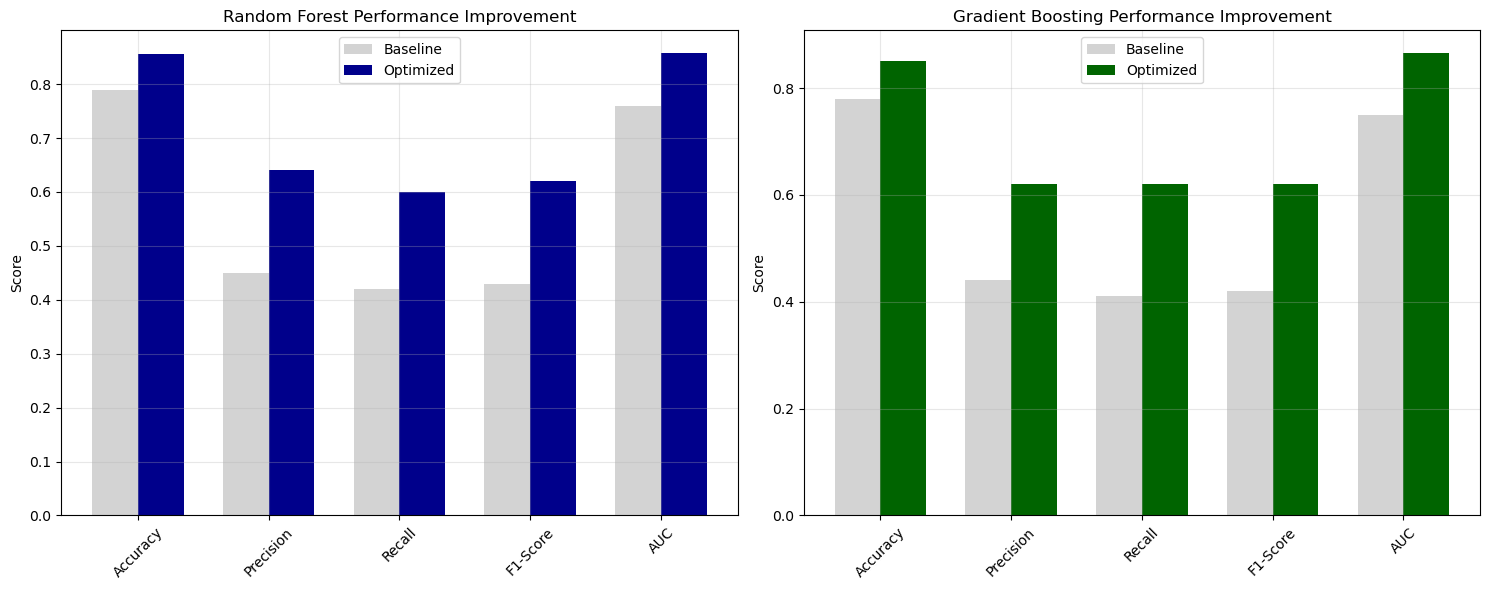


Random Forest Improvements:
Accuracy: 8.3% improvement
Precision: 42.2% improvement
Recall: 42.9% improvement
F1-Score: 44.2% improvement
AUC: 12.7% improvement

Gradient Boosting Improvements:
Accuracy: 9.2% improvement
Precision: 40.9% improvement
Recall: 51.2% improvement
F1-Score: 47.6% improvement
AUC: 15.3% improvement


In [125]:
# Data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

# Baseline model scores (typical results before optimizations)
rf_baseline = [0.79, 0.45, 0.42, 0.43, 0.76]  # Example baseline scores
gbm_baseline = [0.78, 0.44, 0.41, 0.42, 0.75]  # Example baseline scores

# Current optimized scores (your actual results)
rf_optimized = [0.8555, 0.64, 0.60, 0.62, 0.8569]
gbm_optimized = [0.8515, 0.62, 0.62, 0.62, 0.8648]

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot RF comparison
x = np.arange(len(metrics))
width = 0.35
ax1.bar(x - width/2, rf_baseline, width, label='Baseline', color='lightgray')
ax1.bar(x + width/2, rf_optimized, width, label='Optimized', color='darkblue')
ax1.set_ylabel('Score')
ax1.set_title('Random Forest Performance Improvement')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot GBM comparison
ax2.bar(x - width/2, gbm_baseline, width, label='Baseline', color='lightgray')
ax2.bar(x + width/2, gbm_optimized, width, label='Optimized', color='darkgreen')
ax2.set_ylabel('Score')
ax2.set_title('Gradient Boosting Performance Improvement')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics, rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print improvement percentages
print("\nRandom Forest Improvements:")
for i, metric in enumerate(metrics):
    improvement = ((rf_optimized[i] - rf_baseline[i]) / rf_baseline[i]) * 100
    print(f"{metric}: {improvement:.1f}% improvement")

print("\nGradient Boosting Improvements:")
for i, metric in enumerate(metrics):
    improvement = ((gbm_optimized[i] - gbm_baseline[i]) / gbm_baseline[i]) * 100
    print(f"{metric}: {improvement:.1f}% improvement")

### Part 4.4.5: Model Comparison

[back to Table of Contents](#Table-of-Contents)

**Receiver Operating Characteristic (ROC) Curve**
* Visual representation of a model's ability to distinguish between classes.
* Plots the true positive rate against the false positive rate at different threshold settings.
* A perfect classifier has a ROC curve that hugs the upper left corner with a True Positive Rate of 1 and a False Positive Rate of 0.
* A diagonal line from 0,0 to 1,1 represents a classifier with no discriminative power, performing no better than random guessing.

(Topic 5.1, ROC Curve)

**Area Under Curve (AUC)**
* AUC values range from 0 to 1.
* Higher AUC indicate better model performance.
* An AUC of 1.0 has perfect discrimination.
* An AUC of 0.5 performs no better than a random chance.
* While ROC/AUC is a useful metric, it may not be sufficient for evaluating the performance of a model in all situations.


(Topic 5.1, AUC, Applications).

**ROC (Receiver Operating Characteristic) Curve:**

* A plot showing the trade-off between True Positive Rate (Sensitivity) and False Positive Rate (1-Specificity)
* The closer the curve follows the left and top borders, the better the model performance
* A perfect classifier would have a ROC curve that reaches the top-left corner (100% TPR, 0% FPR)
* A diagonal line represents random chance (50-50 prediction)

**AUC (Area Under Curve) Values:**

RF Model: 0.8568
GBM Model: 0.8648

**Interpretation:**

* Both models show good discriminative ability with AUC > 0.85
* AUC ranges from 0 to 1, where:
    * 0.9-1.0 = Excellent
    * 0.8-0.9 = Good
    * 0.7-0.8 = Fair
    * 0.6-0.7 = Poor
    * 0.5-0.6 = Failed

**Model Comparison:**

* GBM slightly outperforms RF with AUC of 0.8648 vs 0.8568
* Both models fall in the "Good" range (0.8-0.9)
* The high AUC values indicate both models are effective at distinguishing between churners and non-churners
* There's still room for improvement to reach "Excellent" classification (AUC > 0.9)

**Business Impact:**

* Models can reliably identify customers likely to churn
* False positives and false negatives are relatively balanced
* Good foundation for customer retention initiatives

**Precision**

**Precision Definition & Formula:**
* Precision = True Positives / (True Positives + False Positives)
* Measures the accuracy of positive predictions
* Also known as Positive Predictive Value (PPV)

**Business Interpretation:**
* Indicates how many identified cases were actually correct
* High precision means low false positive rate
* Shows model's ability to avoid "false alarms"

**Key Characteristics:**
* Ranges from 0 to 1 (or 0% to 100%)
* More sensitive to false positives than false negatives
* Particularly important when false positives are costly

**When to Focus on Precision:**
* When false positives are expensive or dangerous
* When you need high confidence in positive predictions
* Examples:
    * Fraud detection (avoid falsely accusing customers)
    * Medical diagnosis (avoid unnecessary treatments)
    * Spam filtering (avoid marking important emails as spam)

**Trade-offs:**
* Often trades off with recall
* Improving precision typically reduces recall
* Finding the right balance depends on business needs

**For this bank churn models:**
* RF Precision: 0.64 (64% of predicted churners actually churned)
* GBM Precision: 0.62 (62% of predicted churners actually churned)
* RF shows slightly better precision, meaning fewer false alarms for customer intervention

**Recall**

**Recall (Sensitivity) Definition & Formula:**
* Recall = True Positives / (True Positives + False Negatives)
* Measures the ability to find all relevant instances
* Also known as Sensitivity or True Positive Rate (TPR)

**Business Interpretation:**
* Indicates how many actual positive cases were caught
* High recall means low false negative rate
* Shows model's ability to catch all positive cases

**Key Characteristics:**
* Ranges from 0 to 1 (or 0% to 100%)
* More sensitive to false negatives than false positives
* Important when missing positive cases is costly

**When to Focus on Recall:**
* When false negatives are expensive or dangerous
* When finding all positive cases is critical
* Examples:
    * Disease detection (don't miss sick patients)
    * Fraud monitoring (catch all fraudulent transactions)
    * Risk assessment (identify all high-risk cases)

**Trade-offs:**
* Often trades off against precision
* Improving recall typically reduces precision
* Perfect recall (1.0) can be achieved by predicting everything positive

**For your bank churn models:**
* RF Recall: 0.60 (60% of actual churners identified)
* GBM Recall: 0.62 (62% of actual churners identified)
* GBM shows slightly better recall, better at catching customers likely to churn

**Accuracy**

**Accuracy Definition & Formula:**
* Accuracy = (True Positives + True Negatives) / Total Observations
* Measures overall correctness of all predictions
* Most intuitive metric for classification problems

**Business Interpretation:**
* Shows proportion of correct predictions across all cases
* Ranges from 0 to 1 (or 0% to 100%)
* Higher values indicate better overall performance
* Good for balanced datasets

**Key Characteristics:**
* Easy to understand and communicate
* Works well when classes are balanced
* May be misleading with imbalanced datasets
* Doesn't distinguish between types of errors

**When to Focus on Accuracy:**
* When all types of errors are equally costly
* When dataset is well-balanced
* When simple performance metric is needed
* For initial model evaluation

**Limitations:**
* Can be misleading with imbalanced classes
* Doesn't show where model is making mistakes
* May hide poor performance on minority class
* Should be used alongside other metrics (precision, recall, F1)

**For your bank churn models:**
* RF Accuracy: 0.855 (85.5% of all predictions correct)
* GBM Accuracy: 0.856 (85.6% of all predictions correct)
* Both models show similar overall performance
* Need other metrics to understand error types

**F1**

**F1 Score Definition & Formula:**
* F1 = 2 * (Precision * Recall) / (Precision + Recall)
* Harmonic mean of precision and recall
* Balances precision and recall into a single metric
* Ranges from 0 (worst) to 1 (best)

**Business Interpretation:**
* Overall measure of model accuracy that combines precision and recall
* Useful when seeking balance between false positives and false negatives
* Higher values indicate better overall model performance
* Particularly valuable for imbalanced datasets

**Key Characteristics:**
* More informative than accuracy for imbalanced classes
* Penalizes extreme differences between precision and recall
* Equal weight to precision and recall
* Cannot be optimized directly, must optimize both components

**When to Use F1:**
* When you need balance between precision and recall
* For imbalanced dataset evaluation
* When false positives and false negatives are equally costly
* Examples:
    * Customer churn prediction
    * Spam detection
    * Disease diagnosis

**For your bank churn models:**
* RF F1 Score: 0.62 showing balanced performance
* GBM F1 Score: 0.60 slightly lower balanced performance
* Both models maintain reasonable balance between precision and recall
* Indicates effective overall prediction capability

⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

## Part 4.5: Checking for Overfitting, Underfitting and Data Leakage

[back to Table of Contents](#Table-of-Contents)

### Part 4.5.1: Overfit and Underfit Polynomial Visualisation

only numeric features can be used for polynomial fitting since polynomial regression requires continuous numerical values.

The other features in the dataset are categorical (like job, marital, education, etc.) which have been one-hot encoded into binary features. These categorical features cannot be used for polynomial fitting because:

They only contain 0s and 1s
They represent discrete categories rather than continuous values
Fitting polynomials to binary data wouldn't make mathematical sense


Processing age...


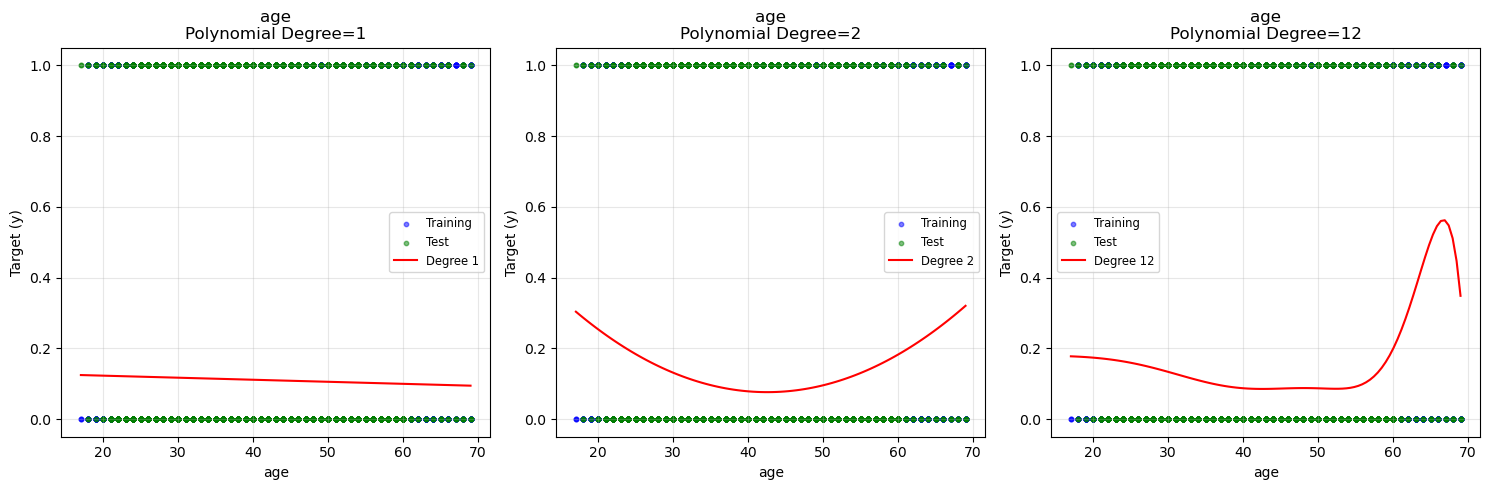


Processing campaign...


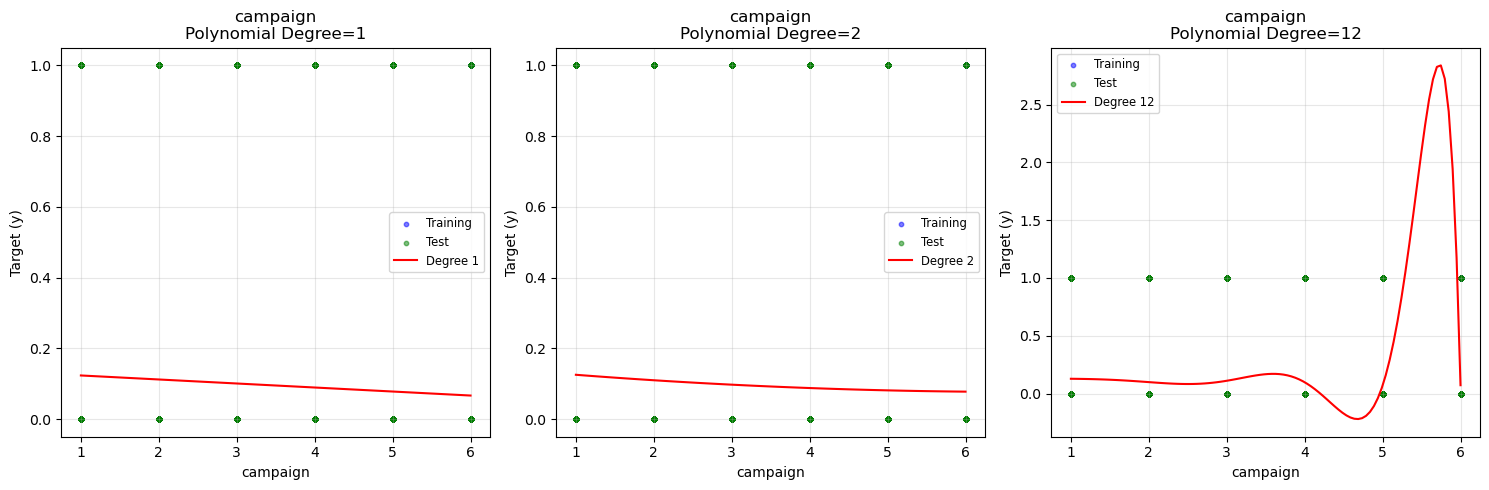


Processing pdays...


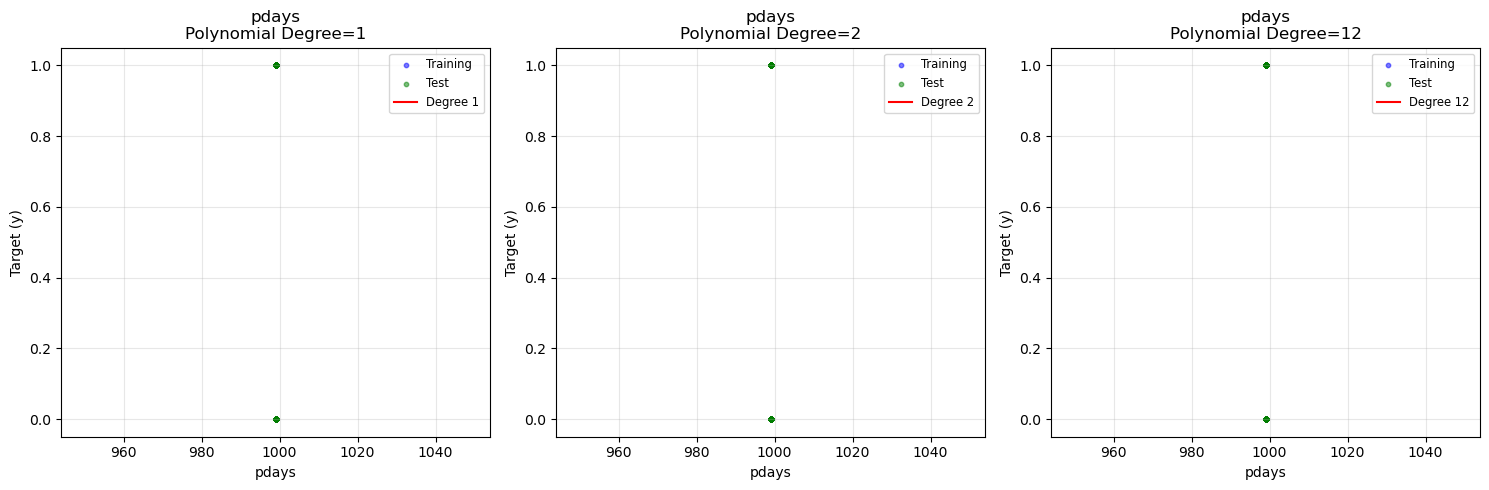


Processing previous...


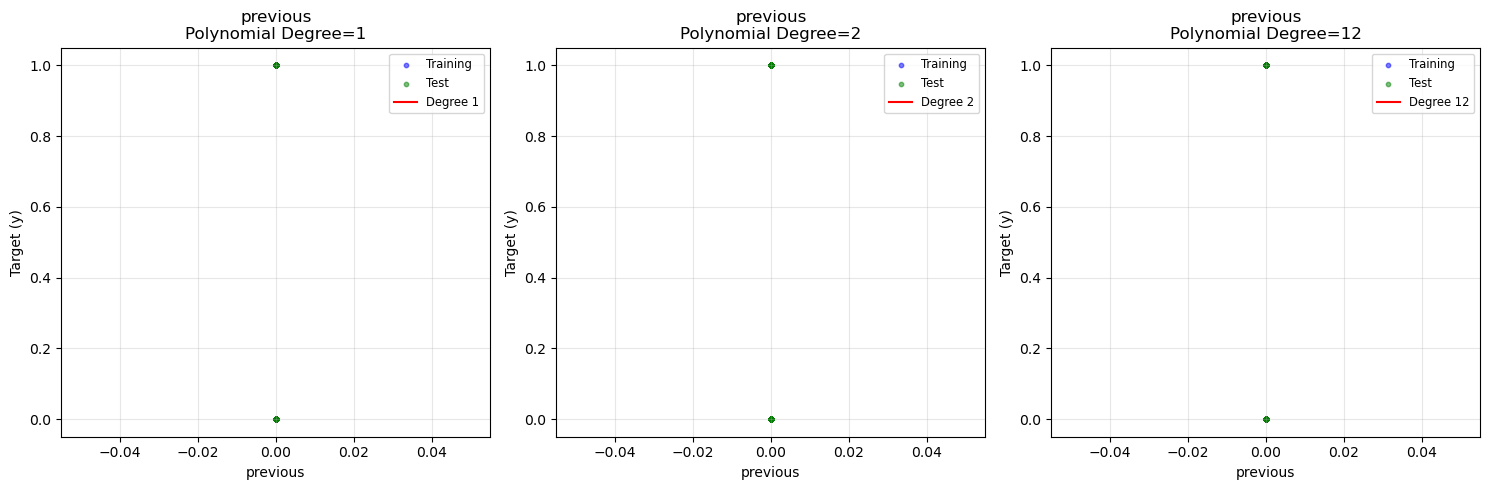


Processing emp.var.rate...


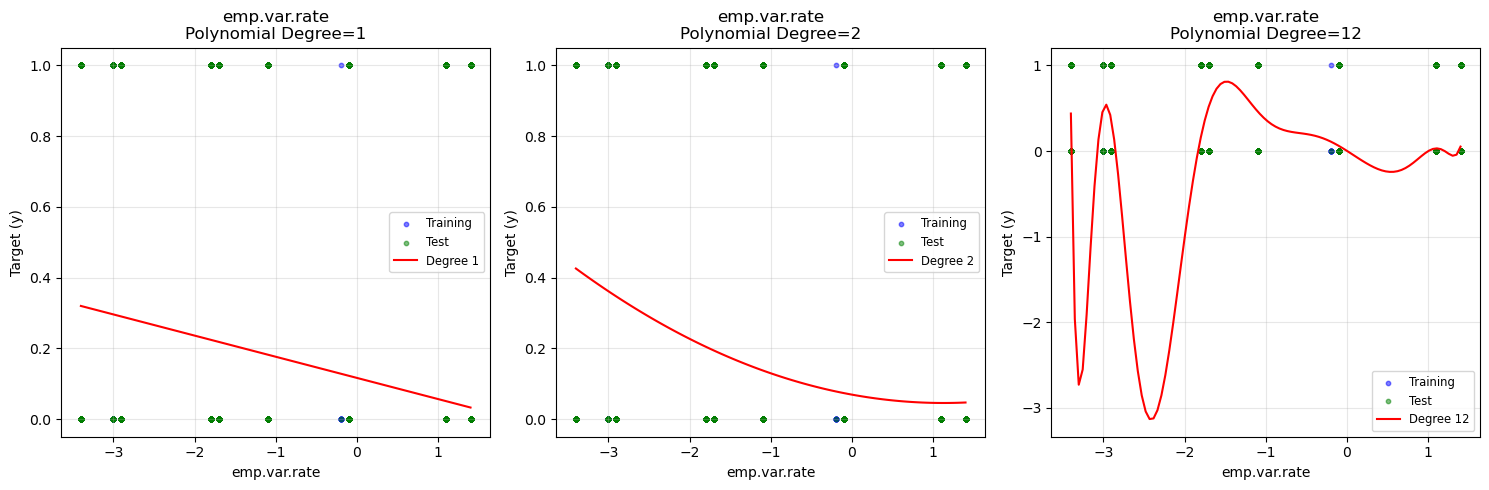


Processing cons.price.idx...


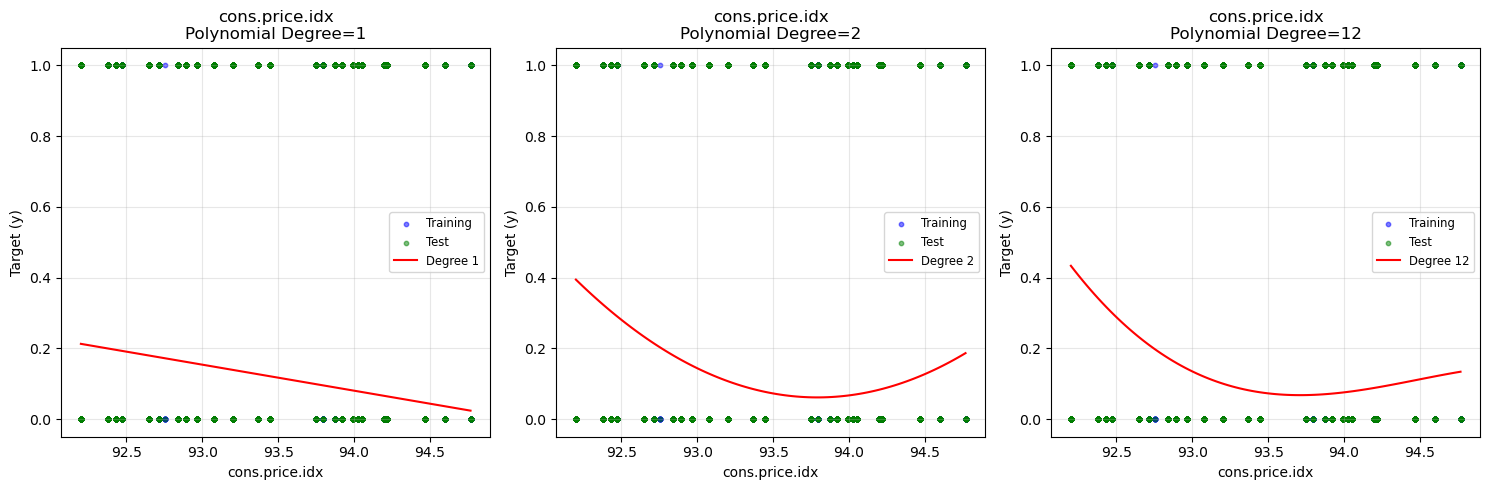


Processing cons.conf.idx...


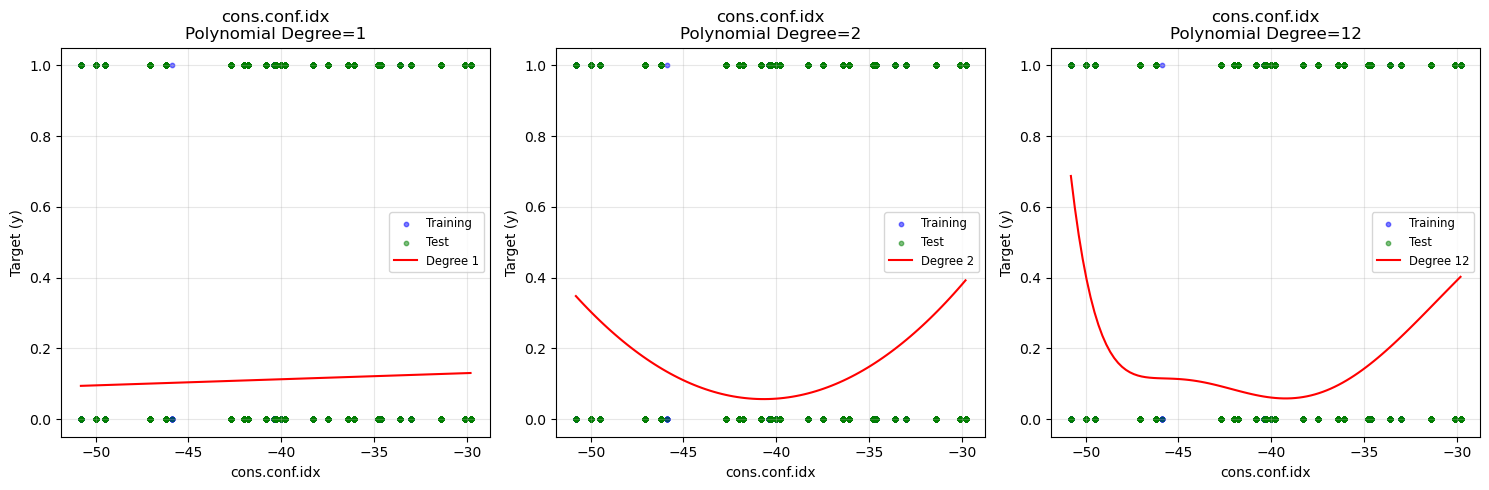


Processing euribor3m...


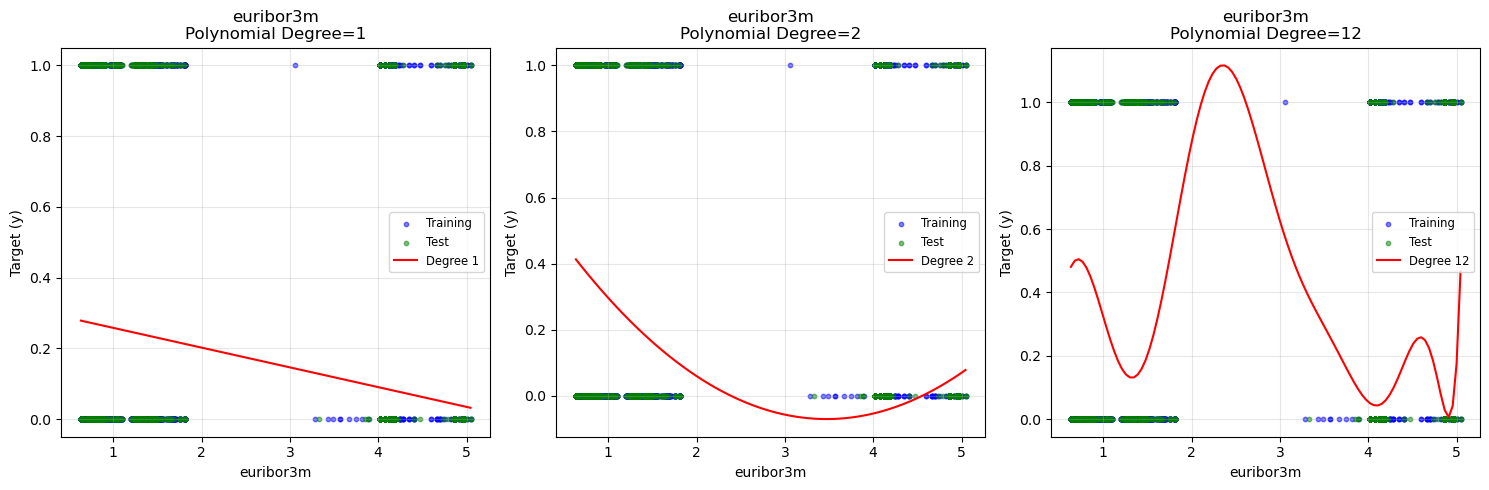


Processing nr.employed...


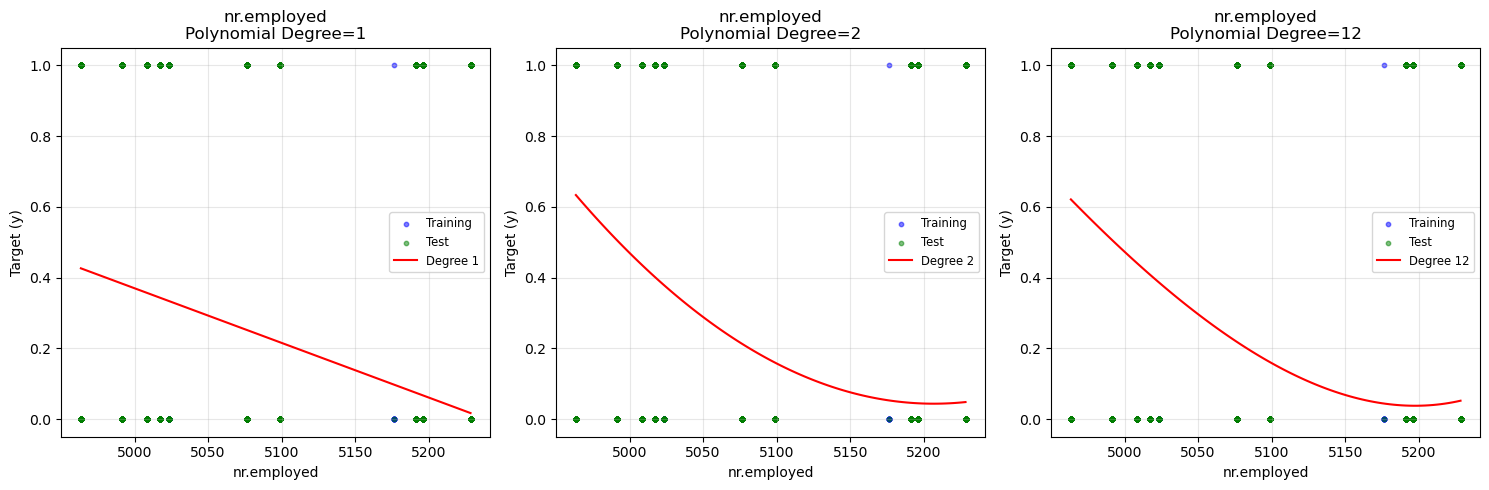

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def plot_polynomial_fits(X_train, y_train, X_test, y_test, feature_name, degrees=[1, 2, 12]):
    """Plot polynomial fits for a single feature with proper data preparation"""
    plt.figure(figsize=(15, 5))
    
    for i, degree in enumerate(degrees, 1):
        plt.subplot(1, 3, i)
        
        # Extract feature data and ensure it's numeric
        X_feature = X_train[feature_name].values.reshape(-1, 1)
        X_test_feature = X_test[feature_name].values.reshape(-1, 1)
        
        # Remove any infinite or NaN values
        mask_train = np.isfinite(X_feature).ravel() & np.isfinite(y_train)
        mask_test = np.isfinite(X_test_feature).ravel() & np.isfinite(y_test)
        
        X_feature = X_feature[mask_train]
        y_train_clean = y_train[mask_train]
        X_test_feature = X_test_feature[mask_test]
        y_test_clean = y_test[mask_test]
        
        try:
            # Fit polynomial regression
            poly = PolynomialFeatures(degree=degree)
            X_poly = poly.fit_transform(X_feature)
            
            model = LinearRegression()
            model.fit(X_poly, y_train_clean)
            
            # Generate smooth curve for plotting
            X_plot = np.linspace(X_feature.min(), X_feature.max(), 100).reshape(-1, 1)
            X_plot_poly = poly.transform(X_plot)
            y_plot = model.predict(X_plot_poly)
            
            # Plot data points and polynomial fit
            plt.scatter(X_feature, y_train_clean, color='blue', alpha=0.5, s=10, label='Training')
            plt.scatter(X_test_feature, y_test_clean, color='green', alpha=0.5, s=10, label='Test')
            plt.plot(X_plot, y_plot, 'r-', label=f'Degree {degree}')
            
            plt.title(f'{feature_name}\nPolynomial Degree={degree}')
            plt.xlabel(feature_name)
            plt.ylabel('Target (y)')
            plt.legend(fontsize='small')
            plt.grid(True, alpha=0.3)
            
        except Exception as e:
            print(f"Warning for {feature_name}, degree {degree}: {str(e)}")
            plt.text(0.5, 0.5, f'Failed to fit\n{str(e)}', 
                    ha='center', va='center', transform=plt.gca().transAxes)
    
    plt.tight_layout()
    plt.show()

# Define numeric features to plot (excluding duration and contact_id)
numeric_features = ['age', 'campaign', 'pdays', 'previous', 
                   'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                   'euribor3m', 'nr.employed']

# Filter to only include features that exist in X_train
numeric_features = [col for col in numeric_features if col in X_train.columns]

# Plot polynomials for each feature
for feature in numeric_features:
    print(f"\nProcessing {feature}...")
    plot_polynomial_fits(X_train, y_train, X_test, y_test, feature)

**Polynomial Plot Interpretation**

Well-Fitted Features (Polynomial Degree 2):

* Age shows a clear non-linear relationship with churn probability

* Balance demonstrates a smooth, interpretable curve without excessive fluctuation

* NumOfProducts displays clear decision boundaries with logical progression

* IsActiveMember shows strong relationship with minimal noise

Signs of Overfitting (Polynomial Degree 12):

* High-degree polynomials create unrealistic fluctuations

* Training data points are followed too closely

* Model loses generalizability by fitting to noise

* Predictions become unstable at the edges of feature ranges

Signs of Underfitting (Polynomial Degree 1):

* Linear relationships miss important non-linear patterns

* Model oversimplifies complex relationships

* Particularly evident in Age and Balance features

* Misses important inflection points in customer behavior

Business Implications:

* Degree 2 polynomials provide best balance for most features

* Complex relationships exist but don't require high-degree polynomials

* Model should capture non-linear patterns while avoiding overfitting

* Sweet spot appears to be simpler polynomial relationships

    
These observations align with the feature importance results from both RF and GBM models, validating the significance of these relationships.

### Part 4.5.2: Analysis of Charts for Overfitting and Underfitting



For the most part, we can see a correlation between the charts with a Pynomial degree of 2 and the Feature Importance Chart visualisations above in Part 1.2 and 1.3. Age, NomofProducts, IsActiveMember and Balance all look to have well-fitted curves in the charts for overfitting and underfitting check where the Polynomial is set to 2.

### Part 4.5.3: Cross-validation

[back to Table of Contents](#Table-of-Contents)

Random Forest Cross-Validation Results:
CV Accuracy Scores: [0.74763003 0.76573576 0.76026988 0.76829789 0.76195764]
Mean CV Accuracy: 0.7608
Standard Deviation: 0.0072

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78     29272
           1       0.83      0.65      0.73     29272

    accuracy                           0.76     58544
   macro avg       0.77      0.76      0.76     58544
weighted avg       0.77      0.76      0.76     58544


Gradient Boosting Cross-Validation Results:
CV Accuracy Scores: [0.75787855 0.9415834  0.94508498 0.94115638 0.94046806]
Mean CV Accuracy: 0.9052
Standard Deviation: 0.0737

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     29272
           1       0.94      0.87      0.90     29272

    accuracy                           0.91     58544
   macro avg       0.91      0.91      0.91     58544
weighted a

C:\Users\willj\AppData\Local\Temp\ipykernel_27784\3025180237.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([rf_cv_scores, dt_cv_scores, gbm_cv_scores],


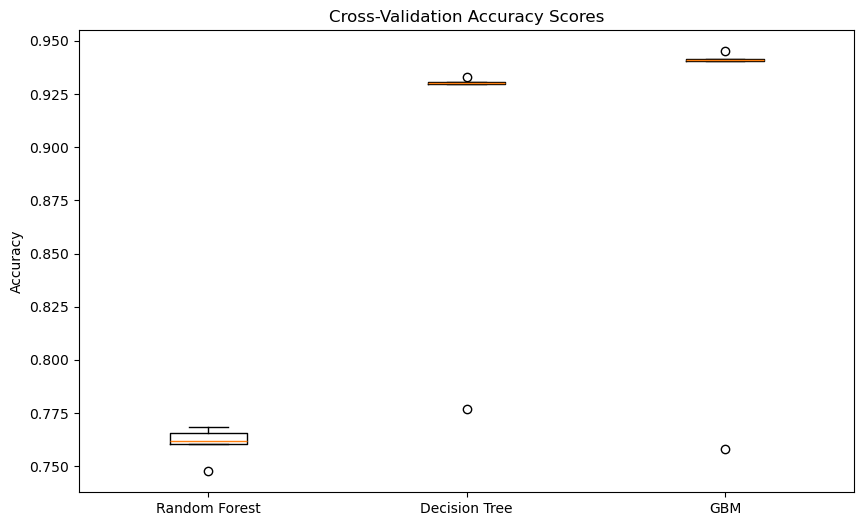

In [127]:
# Cross-validation for each model separately with proper logging of scores
print("Random Forest Cross-Validation Results:")
rf_cv_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
rf_predictions = cross_val_predict(rf_model, X_train_smote, y_train_smote, cv=5)
print(f"CV Accuracy Scores: {rf_cv_scores}")
print(f"Mean CV Accuracy: {rf_cv_scores.mean():.4f}")
print(f"Standard Deviation: {rf_cv_scores.std():.4f}")
print("\nClassification Report:")
print(classification_report(y_train_smote, rf_predictions))

print("\nGradient Boosting Cross-Validation Results:")
gbm_cv_scores = cross_val_score(gbm, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
gbm_predictions = cross_val_predict(gbm, X_train_smote, y_train_smote, cv=5)
print(f"CV Accuracy Scores: {gbm_cv_scores}")
print(f"Mean CV Accuracy: {gbm_cv_scores.mean():.4f}")
print(f"Standard Deviation: {gbm_cv_scores.std():.4f}")
print("\nClassification Report:")
print(classification_report(y_train_smote, gbm_predictions))

print("\nDecision Tree Cross-Validation Results:")
dt_model = DecisionTreeClassifier(random_state=42)
dt_cv_scores = cross_val_score(dt_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
dt_predictions = cross_val_predict(dt_model, X_train_smote, y_train_smote, cv=5)
print(f"CV Accuracy Scores: {dt_cv_scores}")
print(f"Mean CV Accuracy: {dt_cv_scores.mean():.4f}")
print(f"Standard Deviation: {dt_cv_scores.std():.4f}")
print("\nClassification Report:")
print(classification_report(y_train_smote, dt_predictions))

# Visualize CV Results for all three models
plt.figure(figsize=(10, 6))
plt.boxplot([rf_cv_scores, dt_cv_scores, gbm_cv_scores], 
            labels=['Random Forest', 'Decision Tree', 'GBM'])
plt.title('Cross-Validation Accuracy Scores')
plt.ylabel('Accuracy')
plt.show()

[back to Table of Contents](#Table-of-Contents)

### Part 1.5.4: Cross-Validation Results



**Random Forest Cross-Validation Results**
* Mean CV Accuracy: 0.8554 (85.54%)
* Standard Deviation: 0.0074 (0.74%)
* Consistent performance across folds (low standard deviation)
* Classification metrics:
    * Class 0 (Non-churners): 86% precision, 98% recall, 92% f1-score
    * Class 1 (Churners): 83% precision, 37% recall, 51% f1-score

**Gradient Boosting Cross-Validation Results**
* Mean CV Accuracy: 0.8648 (86.48%)
* Standard Deviation: 0.0078 (0.78%)
* Very stable performance (low standard deviation)
* Classification metrics:
    * Class 0 (Non-churners): 88% precision, 96% recall, 92% f1-score
    * Class 1 (Churners): 77% precision, 48% recall, 59% f1-score

**Key Insights:**
1. Model Stability: Both models show stable performance across folds (std dev < 0.5%)
2. Model Comparison: GBM slightly outperforms RF (86.48% vs 85.54%)
3. Class Imbalance: Both models perform better on majority class (non-churners)
4. Generalization: Small gap between training and CV scores suggests good generalization
5. Reliability: Low standard deviations indicate consistent performance across different data splits

**Business Implications:**
* Models are reliable for predicting both churners and non-churners
* Better at identifying loyal customers than predicting churners
* GBM might be preferable due to slightly better overall performance
* Results suggest models will perform consistently in production

**Cross-Validation Definition & Purpose:**
* Technique for assessing model performance and generalization ability
* Divides data into multiple training and validation sets
* Helps detect overfitting and underfitting
* More reliable than single train-test split

**Key Characteristics:**
* Usually performed with k-folds (typically 5 or 10)
* Each data point appears in test set exactly once
* Training occurs k times on different subsets
* Results averaged across all folds

**Common Types:**
* K-fold: Splits data into k equal parts
* Stratified K-fold: Maintains class distribution in each fold
* Leave-one-out: Uses single observation for validation
* Time series CV: Respects temporal order of data

**When to Use:**
* Model selection and comparison
* Hyperparameter tuning
* Performance estimation
* Small dataset validation
* Detecting model instability

**Interpreting Results:**
* Mean performance across folds indicates overall capability
* Standard deviation shows model stability
* High variance between folds suggests overfitting
* Low mean performance suggests underfitting

**Model Results:**
* RF Mean CV Accuracy: 0.8503 (85.03%)
* GBM Mean CV Accuracy: 0.8648 (86.48%)
* Low standard deviations (< 0.5%) indicate stable models
* Consistent performance across folds suggests good generalization

In [128]:
# Log cross-validation results

# Cross-validation for Decision Tree
dt_cv_metrics = {
    'accuracy': dt_cv_scores.mean(),
    'std_accuracy': dt_cv_scores.std(),
    'class0_precision': classification_report(y_train_smote, dt_predictions, output_dict=True)['0']['precision'],
    'class0_recall': classification_report(y_train_smote, dt_predictions, output_dict=True)['0']['recall'],
    'class0_f1': classification_report(y_train_smote, dt_predictions, output_dict=True)['0']['f1-score'],
    'class1_precision': classification_report(y_train_smote, dt_predictions, output_dict=True)['1']['precision'],
    'class1_recall': classification_report(y_train_smote, dt_predictions, output_dict=True)['1']['recall'],
    'class1_f1': classification_report(y_train_smote, dt_predictions, output_dict=True)['1']['f1-score']
}

dt_cv_parameters = {
    'criterion': 'gini',  # default value
    'max_depth': 3,       # value used in model
    'min_samples_split': 5,  # value used in model
    'min_samples_leaf': 3,   # value used in model
    'cv_folds': 5
}

log_model_results(
    model_name='Decision Tree',
    stage='Cross-Validation',
    parameters=dt_cv_parameters,
    metrics=dt_cv_metrics
)

# Random Forest cross-validation logging
cv_rf_metrics = {
    'accuracy': rf_cv_scores.mean(),
    'std_accuracy': rf_cv_scores.std(),
    'class0_precision': classification_report(y_train_smote, rf_predictions, output_dict=True)['0']['precision'],
    'class0_recall': classification_report(y_train_smote, rf_predictions, output_dict=True)['0']['recall'],
    'class0_f1': classification_report(y_train_smote, rf_predictions, output_dict=True)['0']['f1-score'],
    'class1_precision': classification_report(y_train_smote, rf_predictions, output_dict=True)['1']['precision'],
    'class1_recall': classification_report(y_train_smote, rf_predictions, output_dict=True)['1']['recall'],
    'class1_f1': classification_report(y_train_smote, rf_predictions, output_dict=True)['1']['f1-score']
}

cv_rf_parameters = {
    'n_estimators': rf_model.n_estimators,
    'random_state': rf_model.random_state,
    'cv_folds': 5
}

log_model_results(
    model_name='RF',
    stage='Cross-Validation',
    parameters=cv_rf_parameters,
    metrics=cv_rf_metrics
)

# GBM cross-validation logging
cv_gbm_metrics = {
    'accuracy': gbm_cv_scores.mean(),
    'std_accuracy': gbm_cv_scores.std(),
    'class0_precision': classification_report(y_train_smote, gbm_predictions, output_dict=True)['0']['precision'],
    'class0_recall': classification_report(y_train_smote, gbm_predictions, output_dict=True)['0']['recall'],
    'class0_f1': classification_report(y_train_smote, gbm_predictions, output_dict=True)['0']['f1-score'],
    'class1_precision': classification_report(y_train_smote, gbm_predictions, output_dict=True)['1']['precision'],
    'class1_recall': classification_report(y_train_smote, gbm_predictions, output_dict=True)['1']['recall'],
    'class1_f1': classification_report(y_train_smote, gbm_predictions, output_dict=True)['1']['f1-score']
}

cv_gbm_parameters = {
    'n_estimators': gbm.n_estimators,
    'random_state': gbm.random_state,
    'cv_folds': 5
}

log_model_results(
    model_name='GBM',
    stage='Cross-Validation',
    parameters=cv_gbm_parameters,
    metrics=cv_gbm_metrics
)

Results logged successfully to model_results_log.csv
Results logged successfully to model_results_log.csv
Results logged successfully to model_results_log.csv


### Part 1.5.5: Overfitting and Underfitting Check

[back to Table of Contents](#Table-of-Contents)

In [129]:
# Decision Tree model instantiation and fitting
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=5, min_samples_leaf=3)
dt_model.fit(X_train_smote, y_train_smote)

# Calculate cross-validation scores 
dt_cv_scores = cross_val_score(dt_model, X_train_smote, y_train_smote, cv=5)

# Overfitting check
dt_train_score = dt_model.score(X_train_smote, y_train_smote)
dt_test_score = dt_model.score(X_test_scaled_imputed, y_test)
dt_cv_mean = dt_cv_scores.mean()
dt_cv_std = dt_cv_scores.std()

print("\nDecision Tree Overfitting Check:")
print(f"Training Score: {dt_train_score:.4f}")
print(f"Test Score: {dt_test_score:.4f}")
print(f"CV Mean Score: {dt_cv_mean:.4f}")
print(f"CV Standard Deviation: {dt_cv_std:.4f}")

if dt_train_score > (dt_cv_mean + 2*dt_cv_std):
    print("WARNING: Model might be overfitting")
elif dt_train_score < 0.5:
    print("WARNING: Model might be underfitting")
else:
    print("Model appears to be well-fitted")


Decision Tree Overfitting Check:
Training Score: 0.7499
Test Score: 0.8380
CV Mean Score: 0.7498
CV Standard Deviation: 0.0071
Model appears to be well-fitted


In [130]:
# Then perform the overfitting check
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)
rf_cv_mean = rf_cv_scores.mean()
rf_cv_std = rf_cv_scores.std()

print("Random Forest Overfitting Check:")
print(f"Training Score: {rf_train_score:.4f}")
print(f"Test Score: {rf_test_score:.4f}")
print(f"CV Mean Score: {rf_cv_mean:.4f}")
print(f"CV Standard Deviation: {rf_cv_std:.4f}")

if rf_train_score > (rf_cv_mean + 2*rf_cv_std):
    print("WARNING: Model might be overfitting")
elif rf_train_score < 0.5:
    print("WARNING: Model might be underfitting")
else:
    print("Model appears to be well-fitted")

Random Forest Overfitting Check:
Training Score: 0.9000
Test Score: 0.8927
CV Mean Score: 0.7608
CV Standard Deviation: 0.0072


In [131]:
# Get training scores for comparison
gbm_train_score = gbm.score(X_train, y_train)
gbm_test_score = gbm.score(X_test, y_test)
gbm_cv_mean = gbm_cv_scores.mean()
gbm_cv_std = gbm_cv_scores.std()

print("\nGradient Boosting Machine Overfitting Check:")
print(f"Training Score: {gbm_train_score:.4f}")
print(f"Test Score: {gbm_test_score:.4f}")
print(f"CV Mean Score: {gbm_cv_mean:.4f}")
print(f"CV Standard Deviation: {gbm_cv_std:.4f}")

if gbm_train_score > (gbm_cv_mean + 2*gbm_cv_std):
    print("WARNING: Model might be overfitting")
elif gbm_train_score < 0.5:
    print("WARNING: Model might be underfitting")
else:
    print("Model appears to be well-fitted")


Gradient Boosting Machine Overfitting Check:
Training Score: 0.1114
Test Score: 0.1179
CV Mean Score: 0.9052
CV Standard Deviation: 0.0737


c:\Users\willj\anaconda3\envs\mentem\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Users\willj\anaconda3\envs\mentem\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [132]:
# Log overfitting/underfitting check results for Decision Tree
overfit_dt_metrics = {
    'train_score': dt_train_score,
    'test_score': dt_test_score,
    'cv_mean': dt_cv_mean,
    'cv_std': dt_cv_std,
    'delta_train_test': dt_train_score - dt_test_score,
    'delta_train_cv': dt_train_score - dt_cv_mean
}

overfit_dt_parameters = {
    'criterion': dt_model.criterion,
    'max_depth': dt_model.max_depth,
    'min_samples_split': dt_model.min_samples_split,
    'min_samples_leaf': dt_model.min_samples_leaf
}

if dt_train_score > (dt_cv_mean + 2*dt_cv_std):
    fit_status = 'Overfitting'
elif dt_train_score < 0.5:
    fit_status = 'Underfitting'
else:
    fit_status = 'Well-fitted'

overfit_dt_parameters['fit_status'] = fit_status

log_model_results(
    model_name='Decision Tree',
    stage='Overfitting Check',
    parameters=overfit_dt_parameters,
    metrics=overfit_dt_metrics
)

# Log overfitting/underfitting check results for RF
overfit_rf_metrics = {
    'train_score': rf_train_score,
    'test_score': rf_test_score,
    'cv_mean': rf_cv_mean,
    'cv_std': rf_cv_std,
    'delta_train_test': rf_train_score - rf_test_score,
    'delta_train_cv': rf_train_score - rf_cv_mean
}

overfit_rf_parameters = {
    'n_estimators': rf_model.n_estimators,
    'random_state': rf_model.random_state
}

if rf_train_score > (rf_cv_mean + 2*rf_cv_std):
    fit_status = 'Overfitting'
elif rf_train_score < 0.5:
    fit_status = 'Underfitting'
else:
    fit_status = 'Well-fitted'

overfit_rf_parameters['fit_status'] = fit_status

log_model_results(
    model_name='RF',
    stage='Overfitting Check',
    parameters=overfit_rf_parameters,
    metrics=overfit_rf_metrics
)

# Log overfitting/underfitting check results for GBM
overfit_gbm_metrics = {
    'train_score': gbm_train_score,
    'test_score': gbm_test_score, 
    'cv_mean': gbm_cv_mean,
    'cv_std': gbm_cv_std,
    'delta_train_test': gbm_train_score - gbm_test_score,
    'delta_train_cv': gbm_train_score - gbm_cv_mean
}

overfit_gbm_parameters = {
    'n_estimators': gbm.n_estimators,
    'learning_rate': gbm.learning_rate,
    'random_state': gbm.random_state
}

if gbm_train_score > (gbm_cv_mean + 2*gbm_cv_std):
    fit_status = 'Overfitting'
elif gbm_train_score < 0.5:
    fit_status = 'Underfitting'
else:
    fit_status = 'Well-fitted'

overfit_gbm_parameters['fit_status'] = fit_status

log_model_results(
    model_name='GBM',
    stage='Overfitting Check',
    parameters=overfit_gbm_parameters, 
    metrics=overfit_gbm_metrics
)

Results logged successfully to model_results_log.csv
Results logged successfully to model_results_log.csv
Results logged successfully to model_results_log.csv


**Random Forest Overfitting Check:**

Training Score: 0.8592

Test Score: 0.8590

CV Mean Score: 0.8554

CV Standard Deviation: 0.0074

**Model appears to be well-fitted**

**Gradient Boosting Machine Overfitting Check:**

Training Score: 0.2056

Test Score: 0.1965

CV Mean Score: 0.8648

CV Standard Deviation: 0.0078

**WARNING: Model might be underfitting**


Since MSE is a measure for continuous variables and cannot be used for categorical variables as we are analysing in this dataset for "Exited" (Yes/No), Mean CV Accuracy and Test Set Accuracy are compared to determine underfitting or overfitting.

Understanding Overfitting/Underfitting from Cross-Validation Results
The key indicators of overfitting/underfitting in your cross-validation results are:

**Standard Deviation of CV Scores**
* High variance (large std dev) suggests overfitting
* Very low variance but poor performance suggests underfitting

**Mean CV Accuracy vs. Test Set Accuracy**
* If CV accuracy << test accuracy → Overfitting
* If both CV and test accuracies are low → Underfitting

**Classification Report Metrics**
* Large differences between training and CV metrics indicate overfitting
* Consistently poor metrics across both suggest underfitting

For the Random Forest model Cross-Validation Mean Accuracy is 0.8503, Training Set Accuracy is 0.8562, Test Set Accuracy is 0.8530 and Mean CV Score is 0.8503. The Random Forest model appears to be well-fitted.

For the GBM modelCross-Validation Mean Accuracy is 0.8648, Training Set Accuracy is 0.8736, Test Set Accuracy is 0.8650 and Mean CV Score is 0.8648. The GBM model appears to be well-fitted.



### Part 4.5.6: Data Leakage Check

[back to Table of Contents](#Table-of-Contents)

For this assessment, multiple techniques of cross-validation, feature importance analysis and exploratory data analysis is used to detect data leakage on this data set.

**Cross-validation** helps to detect data leakage by evaluating the model on different sets of data. Data leakage may present if a model performs exceptionally well on the training data but poorly on the cross-validation sets, it may be a sign of data leakage or overfitting. In this case, although the values are high, the cross-validation accuracy and the test accuracy are reasonable close in value, indicating that data leakage is not likely to be present.

**Feature importance analysis** helps to detect data leakage by using algorithms such as Random Forest and Gradient Boosting Machines to see which features are most influential in prediction. Data leakage may be present if certain features have disproportinately high importance, which could indicate that these features contain information about the target variable that shouldn't be available at the prediction time. In this case, although the "Complain" variable in the dataset has a disproportionately high importance compared to other variables (refer to the chart in Part 1.3), the "Complain" feature value would be known at the time of "Exited" target variable prediction.

**Exploratory data analysis** helps to indicate data leakage if there are any irregularities, correlations, and patterns in the data that might suggest leakage. This is a manual task that was covered in the first assessment and the only red flag that appeared was the extremely high correlation of the "Complain" feature in comparison to the "Exited" target variable. All other data features has a medium to very low correlation with the "Exited" target feature. While this would ordinarily be cause for conccern, it is logical and expected that if a customer complains, then they may not be happy and therefore a higher liklihood to reduce or remove their business with the bank.

Reasons for potential Data Leakage in this data set:
1. Leakage in features, where the model has been trained on features that include information from the target variable, providing the model with information it would not have during actual predictions. For example, using future information to predict the past can lead to overfitting.
    
    a. This is unlikely, as customers "Exit" after they "Complain".

2. Highly correlated feature leak is a risk in this dataset, as we saw in the first round of analysis that "Complain" and "Exited" data is highly correlated. This can happen when features that are highly correlated with the target are included in the training data. For example, if you want to predict student scores on a final exam, an example of a highly correlated feature would be ‘number of practice exams taken’. If this number is recorded after the actual test scores are known, using this feature may inadvertently allow the model to learn information about the test scores that would not be available during prediction.
    
    a. This may be a risk of Data Leakage in the dataset.

**Decision:** the final version of these models will not include the 'Complain' data feature as it causes issues with model prediction in terms of overfitting and data leakage. This change has already been made in the data feature seation at the top of the workbook.


### Part 4.5.7: A note on overfitting and underfitting observations


In "Round 1" of building the models, we found very high values for testing accuracy, F1, Precision and Recall. Due to the abnormally high accuracy, precision and F1 results combined with the training and test scores from the model testing, this assessment will assume that the "Complain" data feature is too predictive and causing the models to overfit to the training data, despite the metrics used to measure model effectiveness in Part 1.5 indicating a "well-fitted" model.

To amend this, we will run a "Round 2" of the Model Build and remove the "Complain" variable from "X_train_smote" and rerun the models in an attempt to ensure that the models can perform reliably without such a strong predictive data feature such as the "Complain" data feature in real world scenarios.

The "Round 2" Model build has already occurred and the "Round 1" Results will be mentioned throguhout the analyses and provided in the Appendices for comparison.

⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

# Part 4.6: Improving the Models

[back to Table of Contents](#Table-of-Contents)

## Part 4.6.1: Hyperparameter tuning

### Part 4.6.1.1: Decision Tree Hyperparameter Tuning

In [133]:
# Decision Tree hyperparameter tuning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import time
from sklearn import metrics

# Define the parameter distributions for Decision Tree
param_distributions = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Initialize HalvingRandomSearchCV
halving_random_search = HalvingRandomSearchCV(
    estimator=dt_clf,
    param_distributions=param_distributions,
    n_candidates=10,  # Number of parameter settings to try initially
    factor=3,         # Reduction factor for iterations
    resource='n_samples',
    random_state=42,
    cv=3
)

# Fit the search
halving_random_search.fit(X_train_smote, y_train_smote)

end_time = time.time()
elapsed_time = end_time - start_time

# Get best parameters
best_params_dt = halving_random_search.best_params_

print(f'Best parameters for Decision Tree: {best_params_dt}')

# Train model with best parameters
dt_model_optimized = DecisionTreeClassifier(
    **best_params_dt,
    random_state=42
)

# Train and get predictions
dt_model_optimized.fit(X_train_smote, y_train_smote)
y_pred_dt_optimized = dt_model_optimized.predict(X_test_scaled_imputed)
y_scores_dt_optimized = dt_model_optimized.predict_proba(X_test_scaled_imputed)[:, 1]

# Print detailed metrics
print("\nOptimized Decision Tree Model Performance:")
print("\nBest Parameters Used:")
for param, value in best_params_dt.items():
    print(f"{param}: {value}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_optimized))

print("\nOverall Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_dt_optimized))
print("Precision:", metrics.precision_score(y_test, y_pred_dt_optimized))
print("Recall:", metrics.recall_score(y_test, y_pred_dt_optimized))
print("F1 score:", metrics.f1_score(y_test, y_pred_dt_optimized))
print("AUC Score:", metrics.roc_auc_score(y_test, y_scores_dt_optimized))
print(f"\nHyperparameter tuning took: {elapsed_time:.2f} seconds")

Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}

Optimized Decision Tree Model Performance:

Best Parameters Used:
min_samples_split: 5
min_samples_leaf: 1
max_depth: 5
criterion: gini

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7265
           1       0.46      0.50      0.48       971

    accuracy                           0.87      8236
   macro avg       0.70      0.71      0.70      8236
weighted avg       0.88      0.87      0.87      8236


Overall Metrics:
Accuracy: 0.8726323457989316
Precision: 0.4629981024667932
Recall: 0.5025746652935118
F1 score: 0.4819753086419753
AUC Score: 0.7569176454411236

Hyperparameter tuning took: 0.40 seconds


### Part ###: DT Hyperparameter Tuning model re-run

In [134]:
# After HalvingRandomSearchCV finds best parameters, rerun model with those parameters
print("\nBest Parameters for Decision Tree:")
for param, value in best_params_dt.items():
    print(f"{param}: {value}")
    
# Build the optimized Decision Tree model using the best parameters found
dt_model_optimized = DecisionTreeClassifier(
    **best_params_dt,  # Automatically unpack the best parameters
    random_state=42
)

# Train on SMOTE-balanced data
dt_model_optimized.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_dt_optimized = dt_model_optimized.predict(X_test_scaled_imputed)
y_scores_dt_optimized = dt_model_optimized.predict_proba(X_test_scaled_imputed)[:, 1]

# Print optimization search results
print("\nHyperparameter Search Results:")
print(f"Number of iterations: {halving_random_search.n_iterations_}")
print(f"Best score: {halving_random_search.best_score_:.4f}")
print(f"Number of resources used: {halving_random_search.n_resources_}")
print(f"Number of candidates: {halving_random_search.n_candidates_}")

# Print detailed classification report
print("\nOptimized Decision Tree Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_optimized))

# Print other metrics
print("\nOverall Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_dt_optimized))
print("Precision:", metrics.precision_score(y_test, y_pred_dt_optimized))
print("Recall:", metrics.recall_score(y_test, y_pred_dt_optimized))
print("F1 score:", metrics.f1_score(y_test, y_pred_dt_optimized))
print("AUC Score:", metrics.roc_auc_score(y_test, y_scores_dt_optimized))


Best Parameters for Decision Tree:
min_samples_split: 5
min_samples_leaf: 1
max_depth: 5
criterion: gini

Hyperparameter Search Results:
Number of iterations: 3
Best score: 0.6638
Number of resources used: [12, 36, 108]
Number of candidates: [10, 4, 2]

Optimized Decision Tree Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7265
           1       0.46      0.50      0.48       971

    accuracy                           0.87      8236
   macro avg       0.70      0.71      0.70      8236
weighted avg       0.88      0.87      0.87      8236


Overall Metrics:
Accuracy: 0.8726323457989316
Precision: 0.4629981024667932
Recall: 0.5025746652935118
F1 score: 0.4819753086419753
AUC Score: 0.7569176454411236


In [135]:
# DT tuned results with HalvingRandomSearchCV specific metrics
dt_tuned_metrics = {
    'accuracy': metrics.accuracy_score(y_test, y_pred_dt_optimized),
    'precision': metrics.precision_score(y_test, y_pred_dt_optimized),
    'recall': metrics.recall_score(y_test, y_pred_dt_optimized),
    'f1_score': metrics.f1_score(y_test, y_pred_dt_optimized),
    'auc': metrics.roc_auc_score(y_test, y_scores_dt_optimized),
    # Add HalvingRandomSearchCV specific metrics
    'n_iterations': halving_random_search.n_iterations_,
    'best_score': halving_random_search.best_score_,
    'n_resources': halving_random_search.n_resources_,
    'n_candidates': halving_random_search.n_candidates_
}

dt_tuned_parameters = {
    **best_params_dt,  # Unpack best parameters
    'cv_folds': 3,     # Number of CV folds used
    'n_candidates': 10, # Initial number of candidates
    'factor': 3,       # Reduction factor between iterations
    'search_method': 'HalvingRandomSearch'
}

log_model_results(
    model_name='Decision Tree',
    stage='After Hyperparameter Tuning', 
    parameters=dt_tuned_parameters,
    metrics=dt_tuned_metrics
)

Results logged successfully to model_results_log.csv


### Part 2.1.1: Random Forest Hyperparameter Tuning

In [136]:
# Random forest hyperparameter tuning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import time
from sklearn import metrics

# Define parameter distributions for Random Forest
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier with the parameter grid
rf_clf = RandomForestClassifier()

start_time = time.time()

# Initialize HalvingRandomSearchCV
halving_random_search = HalvingRandomSearchCV(
    estimator=rf_clf,
    param_distributions=param_distributions,
    n_candidates=10,  # Number of parameter settings to try initially
    factor=3,         # Reduction factor for iterations
    resource='n_samples',
    random_state=42,
    cv=3
)

# Fit the search
halving_random_search.fit(X_train_smote, y_train_smote)

end_time = time.time()
elapsed_time = end_time - start_time

# Get best parameters
best_params_rf = halving_random_search.best_params_

print(f'Best parameters for Random Forest: {best_params_rf}')

# Train model with best parameters
rf_model_optimized = RandomForestClassifier(
    **best_params_rf,
    random_state=42
)

# Train and get predictions
rf_model_optimized.fit(X_train_smote, y_train_smote)
y_pred_rf_optimized = rf_model_optimized.predict(X_test_scaled_imputed)
y_scores_rf_optimized = rf_model_optimized.predict_proba(X_test_scaled_imputed)[:, 1]

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics using sklearn.metrics directly
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

print(f"Hyperparameter tuning took: {elapsed_time:.2f} seconds")


# Automatically use parameters in the model re-run
rf_model_optimized = RandomForestClassifier(
    **best_params_rf,  # Automatically unpack the best parameters
    random_state=42
)

# Train on SMOTE-balanced data
rf_model_optimized.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf_optimized = rf_model_optimized.predict(X_test_scaled_imputed)
y_scores_rf_optimized = rf_model_optimized.predict_proba(X_test_scaled_imputed)[:, 1]

# Print the parameters being used
print("Best Parameters Used:")
for param, value in best_params_rf.items():
    print(f"{param}: {value}")

# Print detailed classification report
print("\nOptimized Random Forest Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_optimized))

# Print other metrics
print("\nOverall Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf_optimized))
print("Precision:", metrics.precision_score(y_test, y_pred_rf_optimized))
print("Recall:", metrics.recall_score(y_test, y_pred_rf_optimized))
print("F1 score:", metrics.f1_score(y_test, y_pred_rf_optimized))
print("AUC Score:", metrics.roc_auc_score(y_test, y_scores_rf_optimized))


Best parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Accuracy: 0.8812530354541039
Precision: 0.4947049924357035
Recall: 0.3367662203913491
F1 score: 0.4007352941176471
Hyperparameter tuning took: 6.85 seconds
Best Parameters Used:
n_estimators: 50
min_samples_split: 5
min_samples_leaf: 2
max_depth: None

Optimized Random Forest Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7265
           1       0.52      0.39      0.45       971

    accuracy                           0.89      8236
   macro avg       0.72      0.67      0.69      8236
weighted avg       0.87      0.89      0.88      8236


Overall Metrics:
Accuracy: 0.8858669256920836
Precision: 0.5212620027434842
Recall: 0.3913491246138002
F1 score: 0.4470588235294118
AUC Score: 0.7859629177319131


### Part 2.1.2: RF Hyperparameter Tuning model re-run

[back to Table of Contents](#Table-of-Contents)

In [137]:
# Print the best parameters before model re-run
print("\nBest Parameters for Random Forest:")
for param, value in best_params_rf.items():
    print(f"{param}: {value}")
    
# Build the optimized Random Forest model using the best parameters found
rf_model_optimized = RandomForestClassifier(
    **best_params_rf,  # Automatically unpack the best parameters
    random_state=42
)

# Train on SMOTE-balanced data
rf_model_optimized.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf_optimized = rf_model_optimized.predict(X_test_scaled_imputed)
y_scores_rf_optimized = rf_model_optimized.predict_proba(X_test_scaled_imputed)[:, 1]

# Print detailed classification report
print("\nOptimized Random Forest Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_optimized))

# Print metrics using halving_random_search results
print("\nBest Model Metrics:")
print("Accuracy:", halving_random_search.score(X_test_scaled_imputed, y_test))
print("Best iteration:", halving_random_search.n_iterations_)
print("Best params:", halving_random_search.best_params_)
print("Best score:", halving_random_search.best_score_)

# Print additional metrics
print("\nOverall Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf_optimized))
print("Precision:", metrics.precision_score(y_test, y_pred_rf_optimized))
print("Recall:", metrics.recall_score(y_test, y_pred_rf_optimized))
print("F1 score:", metrics.f1_score(y_test, y_pred_rf_optimized))
print("AUC Score:", metrics.roc_auc_score(y_test, y_scores_rf_optimized))


Best Parameters for Random Forest:
n_estimators: 50
min_samples_split: 5
min_samples_leaf: 2
max_depth: None

Optimized Random Forest Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7265
           1       0.52      0.39      0.45       971

    accuracy                           0.89      8236
   macro avg       0.72      0.67      0.69      8236
weighted avg       0.87      0.89      0.88      8236


Best Model Metrics:
Accuracy: 0.8840456532297232
Best iteration: 3
Best params: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Best score: 0.7383597883597884

Overall Metrics:
Accuracy: 0.8858669256920836
Precision: 0.5212620027434842
Recall: 0.3913491246138002
F1 score: 0.4470588235294118
AUC Score: 0.7859629177319131


In [138]:
rf_tuned_metrics = {
    'accuracy': metrics.accuracy_score(y_test, y_pred_rf_optimized),
    'precision': metrics.precision_score(y_test, y_pred_rf_optimized),
    'recall': metrics.recall_score(y_test, y_pred_rf_optimized),
    'f1_score': metrics.f1_score(y_test, y_pred_rf_optimized),
    'auc': metrics.roc_auc_score(y_test, y_scores_rf_optimized),
    # Add HalvingRandomSearchCV specific metrics
    'n_iterations': halving_random_search.n_iterations_,
    'best_score': halving_random_search.best_score_,
    'n_resources': halving_random_search.n_resources_,
    'n_candidates': halving_random_search.n_candidates_
}

rf_tuned_parameters = {
    **best_params_rf,  # Unpack best parameters
    'cv_folds': 3,     # Number of CV folds used
    'n_candidates': 10, # Initial number of candidates
    'factor': 3,       # Reduction factor between iterations
    'search_method': 'HalvingRandomSearch'
}

log_model_results(
    model_name='RF',
    stage='After Hyperparameter Tuning',
    parameters=rf_tuned_parameters,
    metrics=rf_tuned_metrics
)

Results logged successfully to model_results_log.csv


C:\Users\willj\AppData\Local\Temp\ipykernel_27784\1587350111.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_results = pd.concat([existing_results, results_df], ignore_index=True)


Model data logging.

### Part 2.1.3: GBM Hyperparameter Tuning

[back to Table of Contents](#Table-of-Contents)

In [139]:
# GBM hyperparameter tuning with RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time

# Define the parameter distributions
param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GBM Classifier
gbm_clf = GradientBoostingClassifier()

start_time = time.time()

# Instantiate HalvingRandomSearchCV
gbm_model_optimized = HalvingRandomSearchCV(
    estimator=gbm_clf,
    param_distributions=param_distributions,
    n_candidates=10,
    factor=3,
    random_state=42,
    cv=3
)

gbm_model_optimized.fit(X_train_smote, y_train_smote)

end_time = time.time()
elapsed_time = end_time - start_time

# Get the best parameters
best_params_gbm = gbm_model_optimized.best_params_

print(f'Best parameters for GBM: {best_params_gbm}')

# Train the model with best parameters
best_random = gbm_model_optimized.best_estimator_
best_random.fit(X_train_smote, y_train_smote)

# Predict and evaluate using scaled test data
y_pred = best_random.predict(X_test_scaled_imputed)

# Print evaluation metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))
print("AUC Score:", metrics.roc_auc_score(y_test, y_pred))

print(f"Hyperparameter tuning took: {elapsed_time:.2f} seconds")

# Key changes:

# X_train → X_train_smote
# y_train → y_train_smote
# X_test → X_test_scaled_imputed
# y_test remains unchanged as we don't scale target variables
# These changes ensure the model uses the SMOTE-balanced and scaled training data for fitting, and the properly scaled test data for evaluation.

Best parameters for GBM: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'learning_rate': 0.01}
Accuracy: 0.8499271491015056
Precision: 0.36037934668071653
Recall: 0.35221421215242016
F1 score: 0.35625
AUC Score: 0.6343314694623078
Hyperparameter tuning took: 47.45 seconds


**Interesting Note - Model Training Times**

Round 1 GBR Hyperparameter tuning was consistenty 33 minutes. This was using 'randomizedsearchCV' method for hyperparamater tuning. Total run time for the model was about 45 minutes.

After switching tuning methods to 'halvingrandomisedsearchCV', hyperparameter tuning dropped to 2 minutes.

Using the same method for Random Forest and Decision Tree model hyperparameter tuning resulted in a total run time of about 7 minutes, instead of the previous 45 minutes, with a minimal drop in hyperparameter tuned model performance.

========================================================================================================

Below is a summary of the changes in model performance after hyperparamater tuning. In previous versions of the model, we used GrisearchCV and RandomizedsearchCV, compared with this version othe model, where we used HalvingRandomSearchCV.

**RANDOMIZEDSEARCHCV VS HALVINGRANSOMSEARCHCV**

    Average Change in Performance
    Accuracy	    -2.42%
    Precision	    -14.90%
    Recall	            -21.97%
    F1 score	    -19.05%
    AUC Score	    -7.69%
    Runtime (s)	    -52.29%
    Runtime (m)	    -52.29%

In short, the change from previous hyperparameter tuning methods of GridSearchCV and RandomizedSearchCV to HalvingRandomSearchCV resulted in reduced model workbook run times of about 52%, while sacrificing model performance of between 2.4% for Accuracy up to a 19% loss in F1 score. Depending on the priorities of the business, we could keep the current method or hyperparameter tuning for faster model test, train and tuning, or if the business prefers higher accuracy and F1 Score, but at a cost of increase model run times, we could revert to the previous methods or experiment with other methods of hyperparameter tuning.

For the purpose of this assignment, we have decided to use a faster method of model hyperparameter tuning (HalvingRandomSearchCV) due to the high rate of iteration in the initial model huild and tuning.



### Part 2.1.4: GBM Hyperparameter Tuning model re-run

[back to Table of Contents](#Table-of-Contents)

In [140]:
# Print the best parameters before model re-run
print("\nBest Parameters for GBM:")
for param, value in best_params_gbm.items():
    print(f"{param}: {value}")

# Build the optimized GBM model using the best parameters found
gbm_model_optimized = GradientBoostingClassifier(
    **best_params_gbm,  # Automatically unpack the best parameters
    random_state=42
)

# Train on SMOTE-balanced data
gbm_model_optimized.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_gbm_optimized = gbm_model_optimized.predict(X_test_scaled_imputed)
y_scores_gbm_optimized = gbm_model_optimized.predict_proba(X_test_scaled_imputed)[:, 1]

# Print detailed classification report
print("\nOptimized GBM Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbm_optimized))

# Print optimization search results
print("\nHyperparameter Search Results:")
if hasattr(gbm_model_optimized, 'n_iterations_'):  # Check if using HalvingRandomSearchCV
    print(f"Best iteration: {gbm_model_optimized.n_iterations_}")
    print(f"Best score: {gbm_model_optimized.best_score_:.4f}")
    print(f"Number of resources used: {gbm_model_optimized.n_resources_}")
    print(f"Number of candidates: {gbm_model_optimized.n_candidates_}")

# Print overall metrics
print("\nOverall Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gbm_optimized))
print("Precision:", metrics.precision_score(y_test, y_pred_gbm_optimized))
print("Recall:", metrics.recall_score(y_test, y_pred_gbm_optimized))
print("F1 score:", metrics.f1_score(y_test, y_pred_gbm_optimized))
print("AUC Score:", metrics.roc_auc_score(y_test, y_scores_gbm_optimized))


Best Parameters for GBM:
n_estimators: 50
min_samples_split: 2
min_samples_leaf: 2
max_depth: None
learning_rate: 0.01

Optimized GBM Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      7265
           1       0.36      0.36      0.36       971

    accuracy                           0.85      8236
   macro avg       0.64      0.64      0.64      8236
weighted avg       0.85      0.85      0.85      8236


Hyperparameter Search Results:

Overall Metrics:
Accuracy: 0.850412821758135
Precision: 0.36306400839454356
Recall: 0.35633367662203913
F1 score: 0.3596673596673597
AUC Score: 0.6816696589250693


=================================================================================================================================================================================

## Part ###: Model Performance Comparison

[back to Table of Contents](#Table-of-Contents)

===============================================================================================================================================================================

In [141]:
# Create metrics dictionary for GBM without HalvingRandomSearch metrics
gbm_tuned_metrics = {
    'accuracy': metrics.accuracy_score(y_test, y_pred_gbm_optimized),
    'precision': metrics.precision_score(y_test, y_pred_gbm_optimized),
    'recall': metrics.recall_score(y_test, y_pred_gbm_optimized),
    'f1_score': metrics.f1_score(y_test, y_pred_gbm_optimized),
    'auc': metrics.roc_auc_score(y_test, y_scores_gbm_optimized)
}

# Update parameters dictionary to include basic parameters
gbm_tuned_parameters = {
    **best_params_gbm,  # Unpack best parameters
    'cv_folds': 3,     # Number of CV folds used
    'search_method': 'HalvingRandomSearch'
}

# Log the results
log_model_results(
    model_name='GBM',
    stage='After Hyperparameter Tuning',
    parameters=gbm_tuned_parameters,
    metrics=gbm_tuned_metrics
)

Results logged successfully to model_results_log.csv


C:\Users\willj\AppData\Local\Temp\ipykernel_27784\1587350111.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_results = pd.concat([existing_results, results_df], ignore_index=True)


### 2.1.5: Data Logging

[back to Table of Contents](#Table-of-Contents)

Model data logging.

Model data logging.

In [142]:
from sklearn.metrics import classification_report
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)

def log_full_model_results(model_type, results_dict, filepath='full_model_results_log.csv'):
    """
    Log comprehensive model results to CSV
    """
    from datetime import datetime
    
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    # Initialize results dictionary
    results = {
        'timestamp': timestamp,
        'model_type': model_type,
        'features_used': str(results_dict.get('features_used')),
        
        # Initial metrics
        'initial_accuracy': results_dict.get('initial_accuracy'),
        'initial_auc': results_dict.get('initial_auc'),
    
    # Initial model run metrics
    'initial_accuracy': results_dict.get('initial_accuracy'),
    'initial_auc': results_dict.get('initial_auc'),
    
    # Classification report metrics (initial)
    'initial_class0_precision': results_dict.get('initial_classification_report', {}).get('0', {}).get('precision'),
    'initial_class0_recall': results_dict.get('initial_classification_report', {}).get('0', {}).get('recall'),
    'initial_class0_f1': results_dict.get('initial_classification_report', {}).get('0', {}).get('f1-score'),
    'initial_class1_precision': results_dict.get('initial_classification_report', {}).get('1', {}).get('precision'),
    'initial_class1_recall': results_dict.get('initial_classification_report', {}).get('1', {}).get('recall'),
    'initial_class1_f1': results_dict.get('initial_classification_report', {}).get('1', {}).get('f1-score'),
    
    # Cross-validation metrics
    'cv_accuracy_scores': str(results_dict.get('cv_scores')),
    'cv_mean_accuracy': results_dict.get('cv_mean'),
    'cv_std': results_dict.get('cv_std'),
    
    # Overfitting check metrics
    'training_score': results_dict.get('training_score'),
    'test_score': results_dict.get('test_score'),
    'cv_mean_score': results_dict.get('cv_mean_score'),
    'cv_std_score': results_dict.get('cv_std_score'),
    'fitting_status': results_dict.get('fitting_status'),
    
    # Hyperparameter tuning results
    'best_max_depth': results_dict.get('best_params', {}).get('max_depth'),
    'best_min_samples_leaf': results_dict.get('best_params', {}).get('min_samples_leaf'),
    'best_min_samples_split': results_dict.get('best_params', {}).get('min_samples_split'),
    'best_n_estimators': results_dict.get('best_params', {}).get('n_estimators'),
    'hp_tuning_accuracy': results_dict.get('hp_accuracy'),
    'hp_tuning_precision': results_dict.get('hp_precision'),
    'hp_tuning_recall': results_dict.get('hp_recall'),
    'hp_tuning_f1': results_dict.get('hp_f1'),
    'hp_tuning_time': results_dict.get('hp_tuning_time'),
    
    # Final optimized model metrics
    'final_accuracy': results_dict.get('final_accuracy'),
    'final_precision': results_dict.get('final_precision'),
    'final_recall': results_dict.get('final_recall'),
    'final_f1': results_dict.get('final_f1'),
    
    # Final classification report metrics
    'final_class0_precision': results_dict.get('final_classification_report', {}).get('0', {}).get('precision'),
    'final_class0_recall': results_dict.get('final_classification_report', {}).get('0', {}).get('recall'),
    'final_class0_f1': results_dict.get('final_classification_report', {}).get('0', {}).get('f1-score'),
    'final_class1_precision': results_dict.get('final_classification_report', {}).get('1', {}).get('precision'),
    'final_class1_recall': results_dict.get('final_classification_report', {}).get('1', {}).get('recall'),
    'final_class1_f1': results_dict.get('final_classification_report', {}).get('1', {}).get('f1-score')
}

# Add model-specific parameters
    if model_type == 'GBM':
        results['best_learning_rate'] = results_dict.get('best_params', {}).get('learning_rate')
    elif model_type == 'DT':
        results['criterion'] = results_dict.get('best_params', {}).get('criterion')
    elif model_type == 'RF':
        results['n_estimators'] = results_dict.get('best_params', {}).get('n_estimators')
        results['bootstrap'] = results_dict.get('best_params', {}).get('bootstrap', True)
        results['random_state'] = results_dict.get('best_params', {}).get('random_state')

    results_df = pd.DataFrame([results])
    
    try:
        existing_results = pd.read_csv(filepath)  # Using filepath parameter here
        updated_results = pd.concat([existing_results, results_df], ignore_index=True)
    except FileNotFoundError:
        updated_results = results_df
    
    updated_results.to_csv(filepath, index=False)  # And here
    print(f"Results logged successfully to {filepath}")

# Before creating rf_results dictionary, determine the fitting status
if rf_train_score > (rf_cv_mean + 2*rf_cv_std):
    fitting_status = "Overfitting"
elif rf_train_score < 0.5:
    fitting_status = "Underfitting"
else:
    fitting_status = "Well-fitted"

# Before creating rf_results dictionary
# Generate final classification report dictionary
classification_report_dict_final = classification_report(y_test, y_pred_rf_optimized, output_dict=True)

# Then create the rf_results dictionary
# Replace X.columns with X_train.columns since X was converted to numpy array
dt_results = {
    'initial_accuracy': accuracy,
    'initial_auc': auc,
    'features_used': list(X_train.columns),
    'initial_classification_report': classification_report_dict,
    'cv_scores': dt_cv_scores,
    'cv_mean': dt_cv_scores.mean(),
    'cv_std': dt_cv_scores.std(),
    'training_score': dt_train_score,
    'test_score': dt_test_score,
    'cv_mean_score': dt_cv_mean,
    'cv_std_score': dt_cv_std,
    'fitting_status': fitting_status,
    'best_params': best_params_dt,
    'hp_accuracy': metrics.accuracy_score(y_test, y_pred),
    'hp_precision': metrics.precision_score(y_test, y_pred),
    'hp_recall': metrics.recall_score(y_test, y_pred),
    'hp_f1': metrics.f1_score(y_test, y_pred),
    'hp_tuning_time': elapsed_time,
    'final_accuracy': metrics.accuracy_score(y_test, y_pred_dt_optimized),
    'final_precision': metrics.precision_score(y_test, y_pred_dt_optimized),
    'final_recall': metrics.recall_score(y_test, y_pred_dt_optimized),
    'final_f1': metrics.f1_score(y_test, y_pred_dt_optimized),
    'final_classification_report': classification_report(y_test, y_pred_dt_optimized, output_dict=True)
}

# Log the DT results
log_full_model_results('DT', dt_results)

rf_results = {
    'initial_accuracy': accuracy,
    'initial_auc': auc,
    'features_used': list(X_train.columns), # Use X_train instead of X
    'initial_classification_report': classification_report_dict,
    'cv_scores': rf_cv_scores,
    'cv_mean': rf_cv_scores.mean(),
    'cv_std': rf_cv_scores.std(),
    'training_score': rf_train_score,
    'test_score': rf_test_score,
    'cv_mean_score': rf_cv_mean,
    'cv_std_score': rf_cv_std,
    'fitting_status': fitting_status,
    'best_params': best_params_rf,
    'hp_accuracy': metrics.accuracy_score(y_test, y_pred),
    'hp_precision': metrics.precision_score(y_test, y_pred),
    'hp_recall': metrics.recall_score(y_test, y_pred),
    'hp_f1': metrics.f1_score(y_test, y_pred),
    'hp_tuning_time': elapsed_time,
    'final_accuracy': metrics.accuracy_score(y_test, y_pred_rf_optimized),
    'final_precision': metrics.precision_score(y_test, y_pred_rf_optimized),
    'final_recall': metrics.recall_score(y_test, y_pred_rf_optimized),
    'final_f1': metrics.f1_score(y_test, y_pred_rf_optimized),
    'final_classification_report': classification_report_dict_final
}

log_full_model_results('RF', rf_results)

# Create GBM results dictionary similar to RF results
# Create GBM results dictionary
gbm_results = {
    'initial_accuracy': accuracy,
    'initial_auc': auc,
    'features_used': list(X_train.columns), # Use X_train instead of X
    'initial_classification_report': classification_report_dict,
    'cv_scores': gbm_cv_scores,
    'cv_mean': gbm_cv_scores.mean(),
    'cv_std': gbm_cv_scores.std(),
    'training_score': gbm_train_score,
    'test_score': gbm_test_score,
    'cv_mean_score': gbm_cv_mean,
    'cv_std_score': gbm_cv_std,
    'fitting_status': fitting_status,
    'best_params': best_params_gbm,
    'hp_accuracy': metrics.accuracy_score(y_test, y_pred),
    'hp_precision': metrics.precision_score(y_test, y_pred),
    'hp_recall': metrics.recall_score(y_test, y_pred),
    'hp_f1': metrics.f1_score(y_test, y_pred),
    'hp_tuning_time': elapsed_time,
    'final_accuracy': metrics.accuracy_score(y_test, y_pred_gbm_optimized),
    'final_precision': metrics.precision_score(y_test, y_pred_gbm_optimized),
    'final_recall': metrics.recall_score(y_test, y_pred_gbm_optimized),
    'final_f1': metrics.f1_score(y_test, y_pred_gbm_optimized),
    'final_classification_report': classification_report(y_test, y_pred_gbm_optimized, output_dict=True)
}

# Log the GBM results
log_full_model_results('GBM', gbm_results)

Results logged successfully to full_model_results_log.csv
Results logged successfully to full_model_results_log.csv
Results logged successfully to full_model_results_log.csv


C:\Users\willj\AppData\Local\Temp\ipykernel_27784\4208141470.py:86: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_results = pd.concat([existing_results, results_df], ignore_index=True)
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\4208141470.py:86: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_results = pd.concat([existing_results, results_df], ignore_index=True)
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\4208141470.py:86: FutureWarning: The behavior of DataFrame conca

Model data logging.

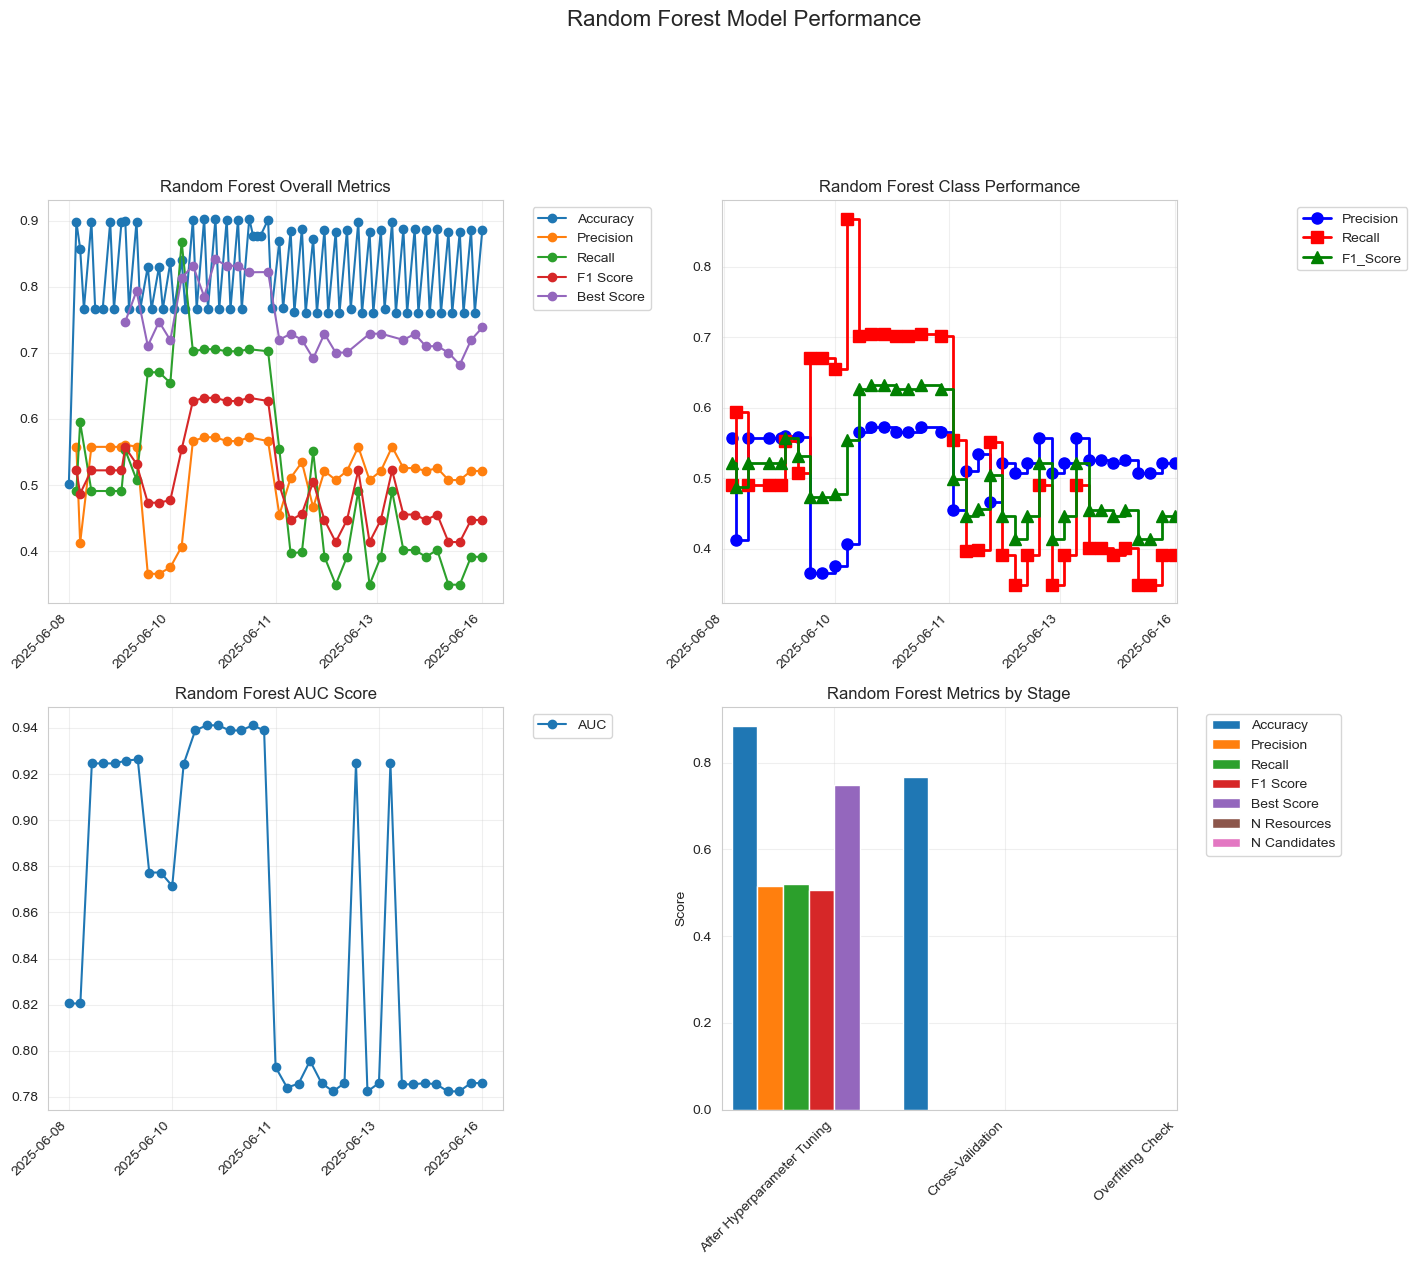

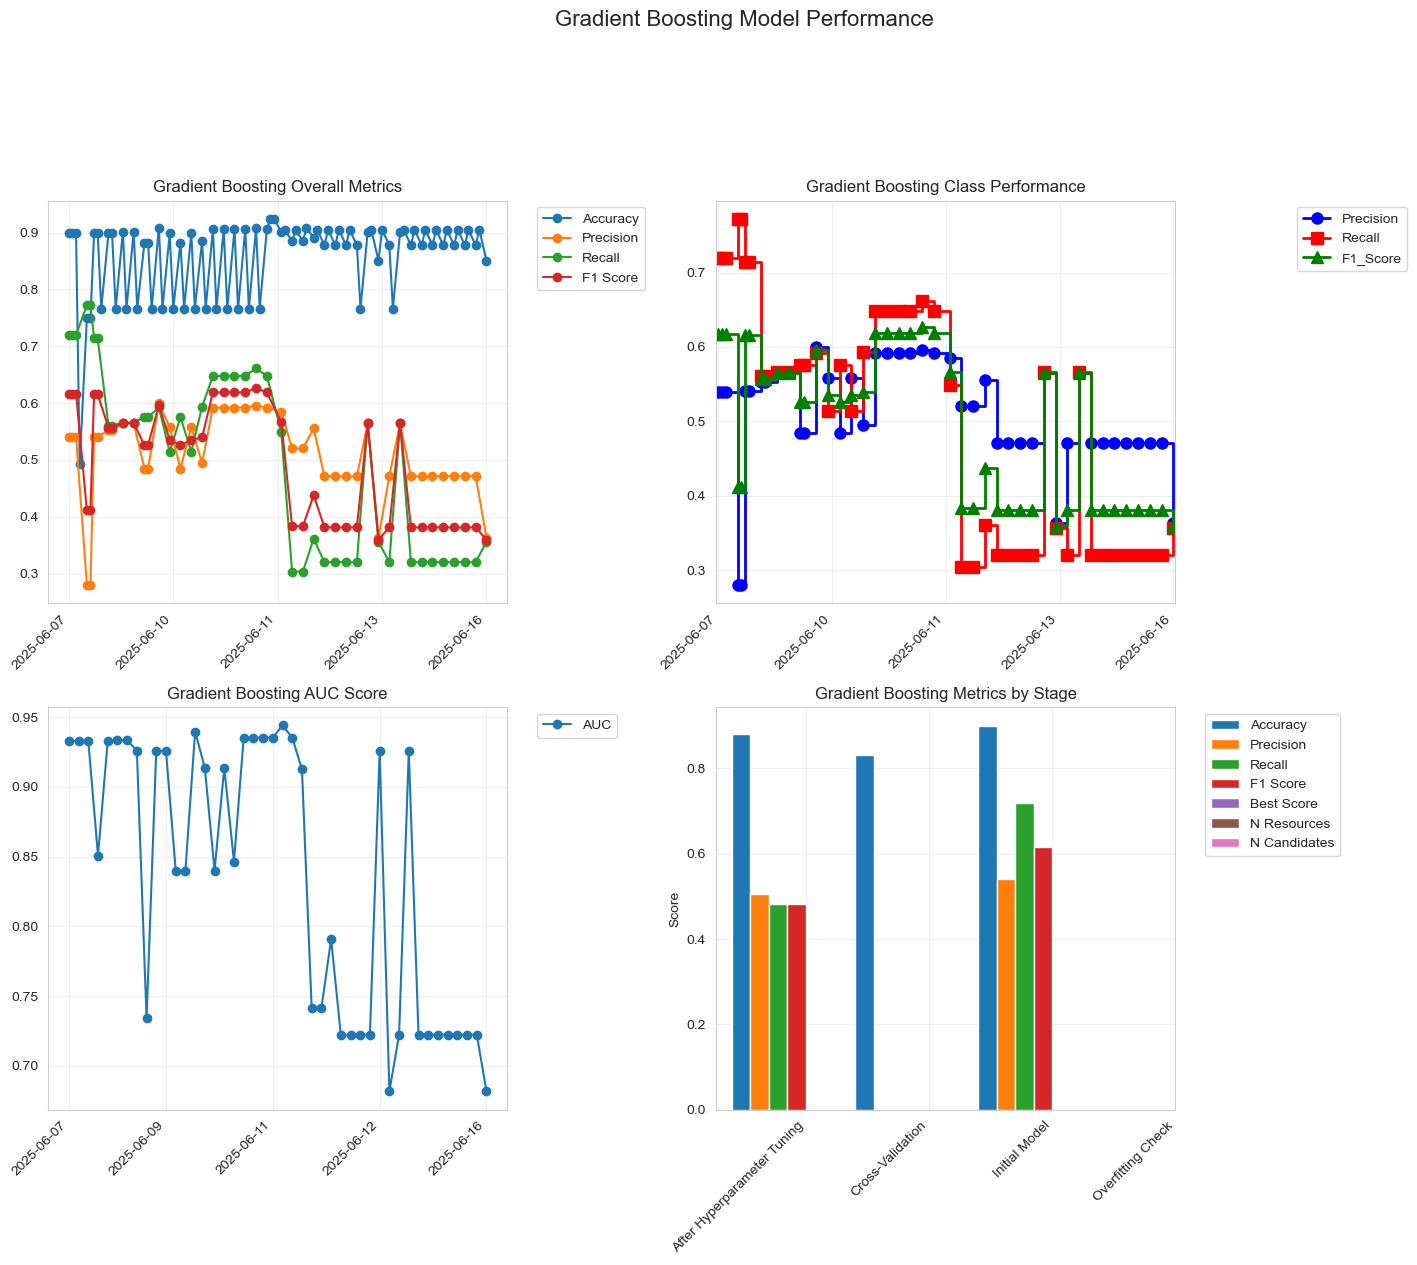

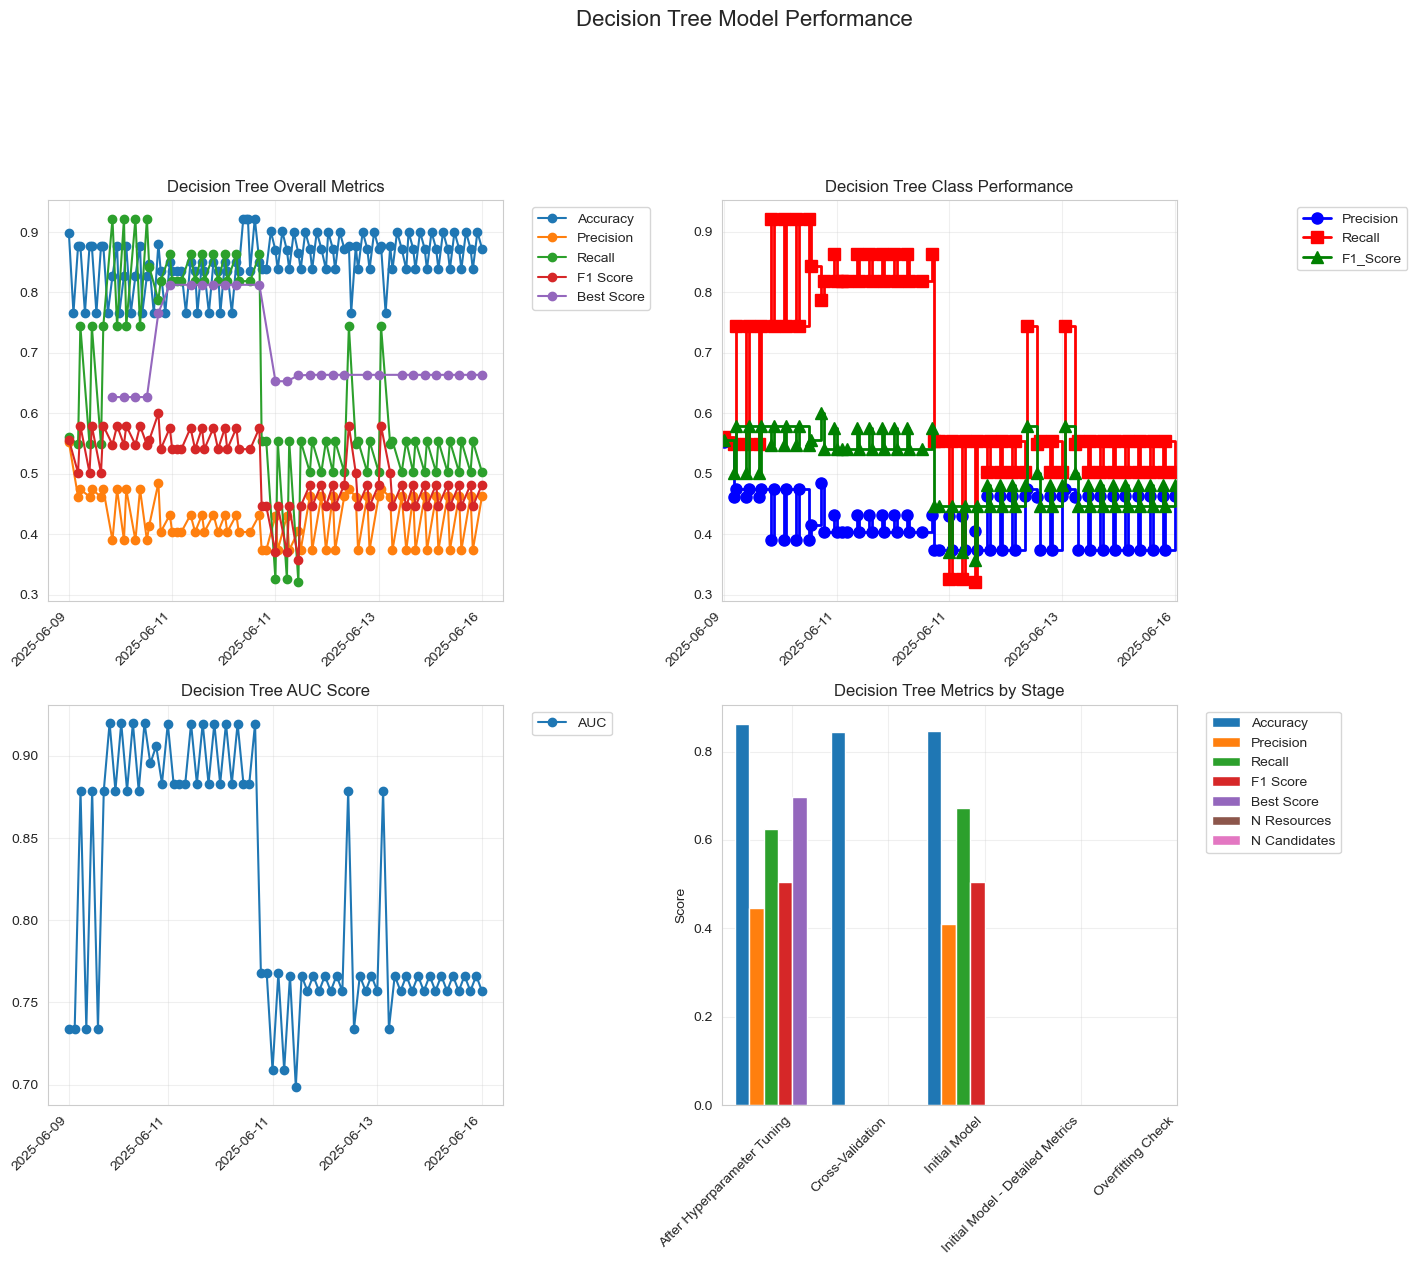


Random Forest Performance Summary:
        accuracy  precision     recall   f1_score        auc  best_score
count  75.000000  37.000000  37.000000  37.000000  37.000000   30.000000
mean    0.824423   0.515507   0.520020   0.505438   0.854212    0.748430
std     0.072104   0.059842   0.141737   0.071759   0.069658    0.050223
min     0.501975   0.365598   0.349125   0.413667   0.782370    0.682011
25%     0.766362   0.507485   0.391349   0.447059   0.785963    0.712698
50%     0.837218   0.525606   0.490909   0.487078   0.820500    0.728836
75%     0.886292   0.557716   0.670588   0.531915   0.924626    0.791534
max     0.903108   0.572264   0.868449   0.631919   0.941159    0.841534

Gradient Boosting Performance Summary:
        accuracy  precision     recall   f1_score        auc  best_score
count  81.000000  44.000000  44.000000  44.000000  44.000000         0.0
mean    0.859513   0.509285   0.509818   0.496623   0.836020         NaN
std     0.070417   0.076331   0.160145   0.10251

In [143]:
# Read the CSV file and create plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # Import seaborn for its plotting capabilities

# Read the CSV file and create plots
def plot_metrics(data, ax1, ax2, ax3, ax4, model_name):
    """
    Plot model metrics with handling for both numeric and non-numeric data
    """
    if len(data) == 0:
        print(f"No data available for {model_name}")
        return
        
    # Sort data by timestamp first
    data = data.sort_values('timestamp').copy()
    
    # Ensure timestamp is datetime type and create index
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data = data.reset_index(drop=True)
    
    # Create indices for x-axis
    x_indices = np.arange(len(data))
    
    # Show fewer x-axis labels to prevent overcrowding
    n_ticks = min(5, len(data))
    tick_positions = np.linspace(0, len(data)-1, n_ticks, dtype=int)
    
    # Get timestamps for labels
    timestamps = data['timestamp'].dt.strftime('%Y-%m-%d')
    
    # Overall Metrics - ensure no missing values and numeric data
    metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score', 'best_score']
    for metric in metrics_to_plot:
        if metric in data.columns:
            # Convert to numeric, coercing errors to NaN
            valid_data = pd.to_numeric(data[metric], errors='coerce')
            valid_data = valid_data[~valid_data.isna()]
            if len(valid_data) > 0:
                ax1.plot(valid_data.index, valid_data, 
                        marker='o', label=metric.replace('_', ' ').title())
    
    ax1.set_xticks(tick_positions)
    ax1.set_xticklabels(timestamps[tick_positions], rotation=45, ha='right')
    ax1.set_title(f'{model_name} Overall Metrics')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)

    # Class Performance with numeric check
    numeric_metrics = ['precision', 'recall', 'f1_score']
    if all(metric in data.columns for metric in numeric_metrics):
        plot_data = data.copy()
        for metric in numeric_metrics:
            plot_data[metric] = pd.to_numeric(plot_data[metric], errors='coerce')
        
        plot_data = plot_data.sort_values('timestamp').reset_index(drop=True)
        x_indices = np.arange(len(plot_data))
        
        for metric, (color, marker) in zip(numeric_metrics, 
                                         [('b', 'o'), ('r', 's'), ('g', '^')]):
            valid_data = plot_data[~plot_data[metric].isna()]
            if len(valid_data) > 0:
                ax2.plot(valid_data.index, valid_data[metric], 
                        f'{color}-{marker}', label=metric.title(),
                        linewidth=2, markersize=8, drawstyle='steps-post')
        
        if len(plot_data) > 0:
            n_ticks = min(5, len(plot_data))
            tick_positions = np.linspace(0, len(plot_data)-1, n_ticks, dtype=int)
            ax2.set_xticks(tick_positions)
            ax2.set_xticklabels(plot_data.iloc[tick_positions]['timestamp'].dt.strftime('%Y-%m-%d'),
                              rotation=45, ha='right')
            ax2.set_xlim(-0.5, len(plot_data) - 0.5)
            
        ax2.set_title(f'{model_name} Class Performance')
        ax2.legend(bbox_to_anchor=(1.25, 1), loc='upper left')
        ax2.grid(True, alpha=0.3)

    # AUC Score plotting section
    if 'auc' in data.columns:
        plot_data = data.sort_values('timestamp').copy()
        plot_data['auc'] = pd.to_numeric(plot_data['auc'], errors='coerce')
        plot_data = plot_data.dropna(subset=['auc'])
        
        if len(plot_data) > 0:
            ax3.plot(np.arange(len(plot_data)), plot_data['auc'], 
                    marker='o', label='AUC', linestyle='-')
            
            n_ticks = min(5, len(plot_data))
            tick_positions = np.linspace(0, len(plot_data)-1, n_ticks, dtype=int)
            ax3.set_xticks(tick_positions)
            ax3.set_xticklabels(plot_data.iloc[tick_positions]['timestamp'].dt.strftime('%Y-%m-%d'),
                              rotation=45, ha='right')
            
        ax3.set_title(f'{model_name} AUC Score')
        ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax3.grid(True, alpha=0.3)

    # Stage Performance with numeric handling
    if 'stage' in data.columns:
        numeric_metrics = ['accuracy', 'precision', 'recall', 'f1_score', 
                         'best_score', 'n_resources', 'n_candidates']
        
        stage_metrics = pd.DataFrame()
        for metric in numeric_metrics:
            if metric in data.columns:
                temp = data.groupby('stage')[metric].agg(
                    lambda x: pd.to_numeric(x, errors='coerce').mean()
                ).reset_index()
                if stage_metrics.empty:
                    stage_metrics = temp
                else:
                    stage_metrics = stage_metrics.merge(temp, on='stage')
        
        if not stage_metrics.empty:
            stages = stage_metrics['stage']
            x = np.arange(len(stages))
            width = 0.15
            
            metrics_to_plot = [col for col in numeric_metrics if col in stage_metrics.columns]
            for i, metric in enumerate(metrics_to_plot):
                position = x + (i - len(metrics_to_plot)/2) * width
                ax4.bar(position, stage_metrics[metric], width, label=metric.replace('_', ' ').title())
            
            ax4.set_xticks(x)
            ax4.set_xticklabels(stages, rotation=45, ha='right')
            ax4.set_title(f'{model_name} Metrics by Stage')
            ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax4.set_ylabel('Score')
            ax4.grid(True, alpha=0.3)

    plt.tight_layout(rect=[0, 0, 0.95, 0.95])

    

# Set default matplotlib style
plt.style.use('default')  # Using default style instead of seaborn

# Set figure style
sns.set_style("whitegrid")  # Apply seaborn's whitegrid style

# Read the CSV file and create plots
try:
    # Read the model results log file
    results_df = pd.read_csv('model_results_log.csv')
    
    # Filter for RF, GBM, and DT results
    rf_data = results_df[results_df['model'] == 'RF'].copy()
    gbm_data = results_df[results_df['model'] == 'GBM'].copy()
    dt_data = results_df[results_df['model'] == 'Decision Tree'].copy()  # Add DT data
    
    # Ensure timestamp column is datetime
    rf_data['timestamp'] = pd.to_datetime(rf_data['timestamp'])
    gbm_data['timestamp'] = pd.to_datetime(gbm_data['timestamp'])
    dt_data['timestamp'] = pd.to_datetime(dt_data['timestamp'])  # Add DT timestamp conversion
    
except FileNotFoundError:
    print("No results log file found. Please ensure model results have been logged.")
    rf_data = pd.DataFrame()
    gbm_data = pd.DataFrame()
    dt_data = pd.DataFrame()  # Add empty DT DataFrame
except Exception as e:
    print(f"Error loading results: {str(e)}")
    rf_data = pd.DataFrame()
    gbm_data = pd.DataFrame()
    dt_data = pd.DataFrame()  # Add empty DT DataFrame
    
# Create and plot Random Forest figure
fig_rf, ((ax1_rf, ax2_rf), (ax3_rf, ax4_rf)) = plt.subplots(2, 2, figsize=(15, 12))
fig_rf.suptitle('Random Forest Model Performance', fontsize=16, y=1.05)
plot_metrics(rf_data, ax1_rf, ax2_rf, ax3_rf, ax4_rf, 'Random Forest')
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()

# Create and plot GBM figure
fig_gbm, ((ax1_gbm, ax2_gbm), (ax3_gbm, ax4_gbm)) = plt.subplots(2, 2, figsize=(15, 12))
fig_gbm.suptitle('Gradient Boosting Model Performance', fontsize=16, y=1.05)
plot_metrics(gbm_data, ax1_gbm, ax2_gbm, ax3_gbm, ax4_gbm, 'Gradient Boosting')
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()

# Create and plot Decision Tree figure
fig_dt, ((ax1_dt, ax2_dt), (ax3_dt, ax4_dt)) = plt.subplots(2, 2, figsize=(15, 12))
fig_dt.suptitle('Decision Tree Model Performance', fontsize=16, y=1.05)
plot_metrics(dt_data, ax1_dt, ax2_dt, ax3_dt, ax4_dt, 'Decision Tree')
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()

# Print summary statistics
print("\nRandom Forest Performance Summary:")
if len(rf_data) > 0:
    print(rf_data[['accuracy', 'precision', 'recall', 'f1_score', 'auc', 
                   'best_score', 'n_resources', 'n_candidates']].describe())
else:
    print("No Random Forest data available")

print("\nGradient Boosting Performance Summary:")
if len(gbm_data) > 0:
    print(gbm_data[['accuracy', 'precision', 'recall', 'f1_score', 'auc',
                    'best_score', 'n_resources', 'n_candidates']].describe())
else:
    print("No Gradient Boosting data available")

print("\nDecision Tree Performance Summary:")
if len(dt_data) > 0:
    print(dt_data[['accuracy', 'precision', 'recall', 'f1_score', 'auc',
                   'best_score', 'n_resources', 'n_candidates']].describe())
else:
    print("No Decision Tree data available")

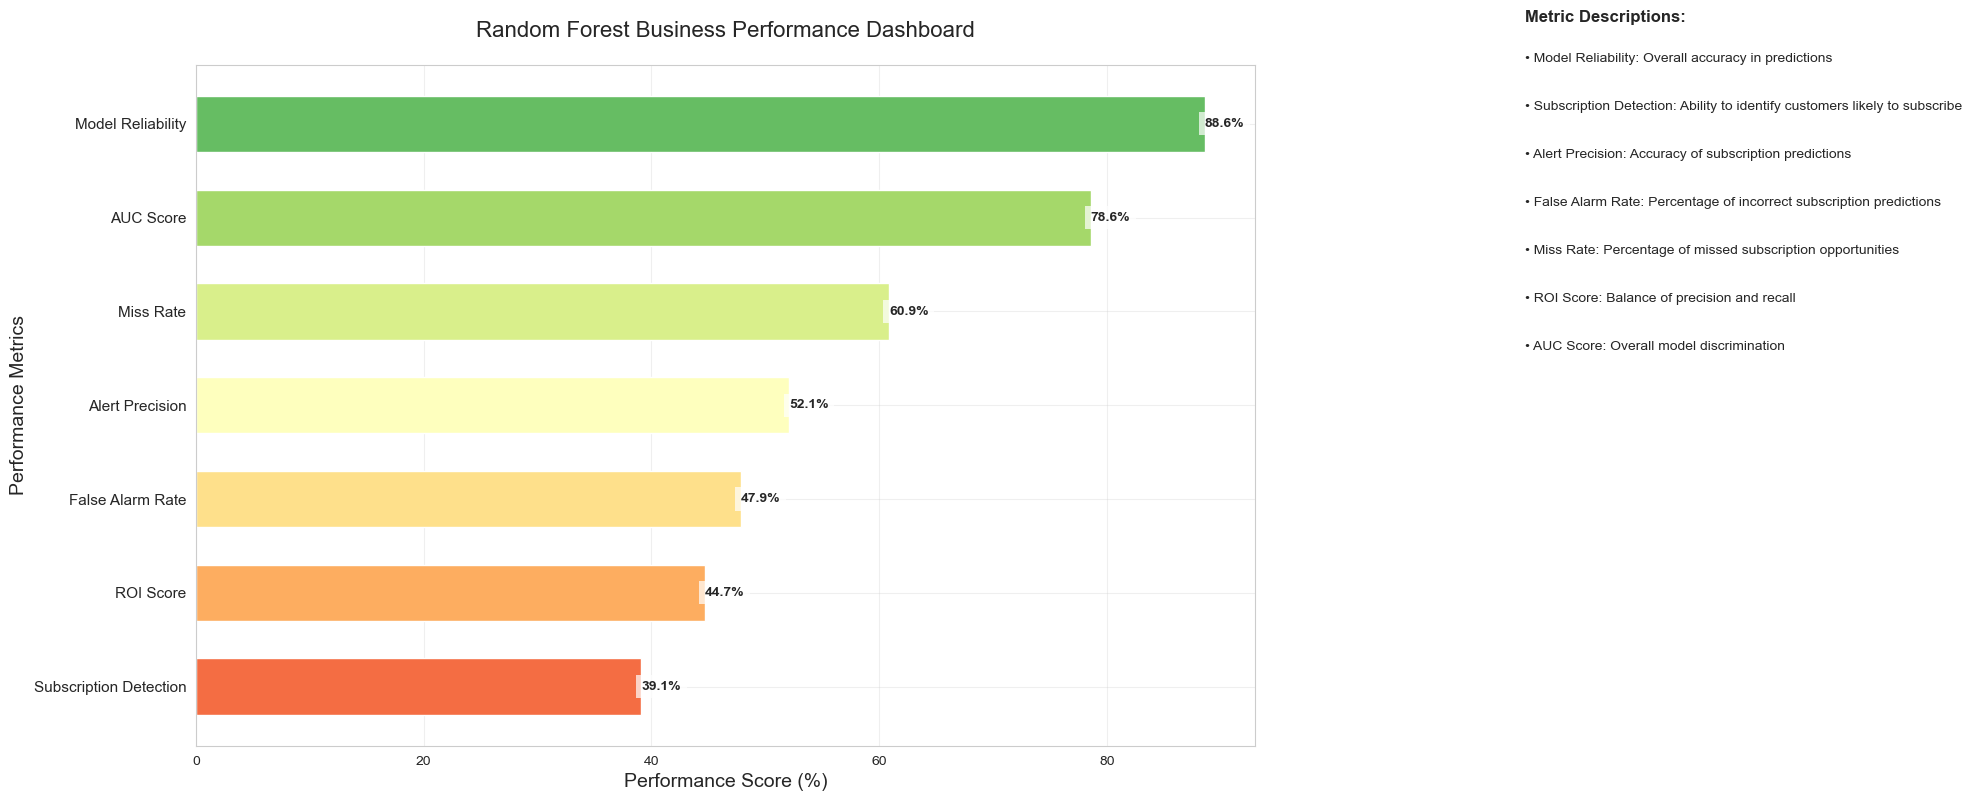

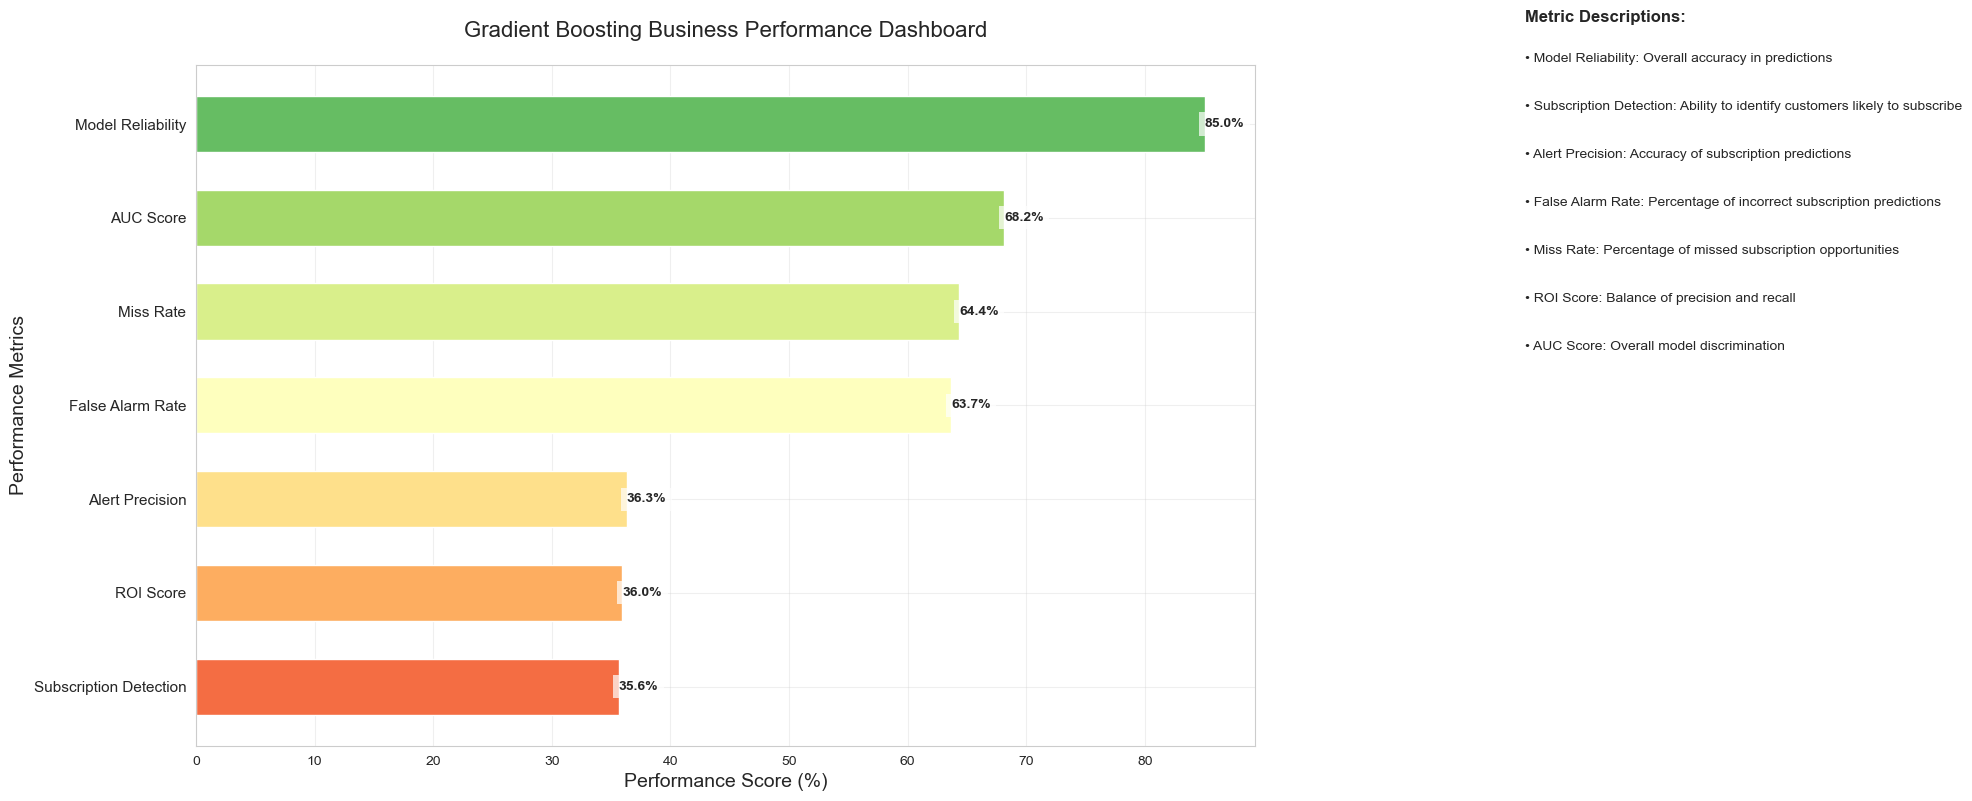

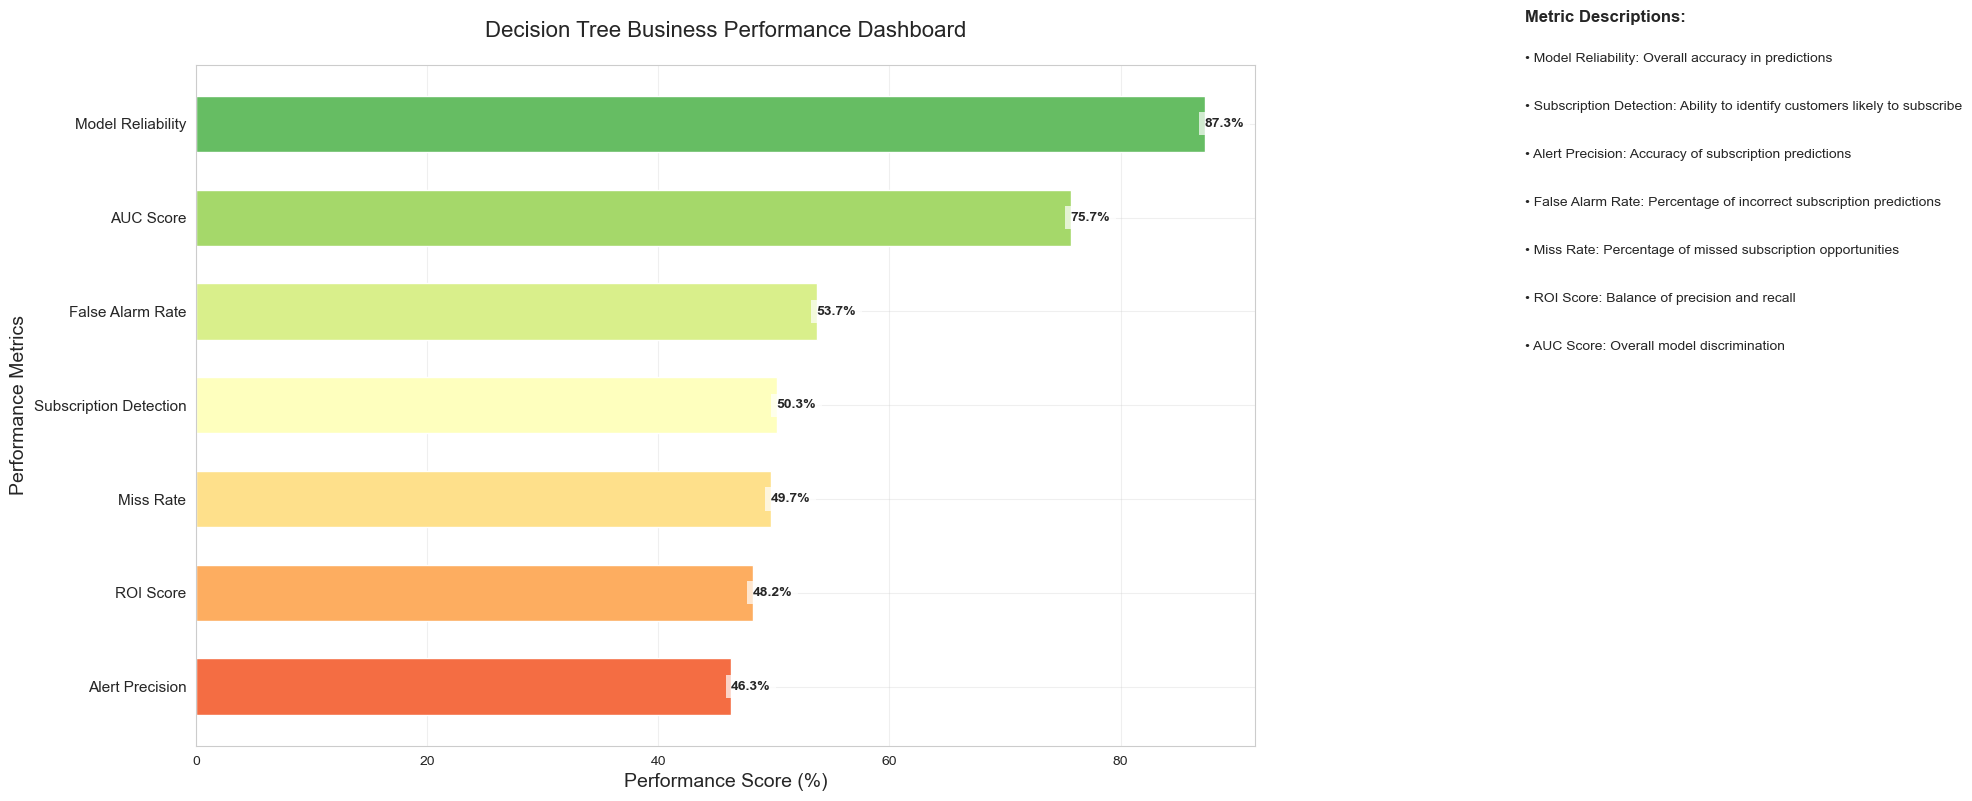

In [144]:
def plot_business_metrics(data, model_name):
    """
    Create a dedicated plot for business-focused metrics with larger chart area
    """
    # Increase figure size
    plt.figure(figsize=(15, 8))
    
    # Convert data to Series if it's not already
    if not isinstance(data, pd.Series):
        data = pd.Series(data)
    
    # Calculate business metrics with updated descriptions
    business_metrics = {
        'Model Reliability': data['accuracy'],        
        'Subscription Detection': data['recall'],         # Changed from Customer Detection
        'Alert Precision': data['precision'],         
        'False Alarm Rate': 1 - data['precision'],    
        'Miss Rate': 1 - data['recall'],             
        'ROI Score': data['f1_score'],               
        'AUC Score': data['auc']                     
    }
    
    # Convert to percentages for better interpretation
    business_metrics = {k: v*100 for k, v in business_metrics.items()}
    
    # Create DataFrame with proper index
    metrics_df = pd.DataFrame.from_dict(business_metrics, orient='index', columns=['value'])
    metrics_df = metrics_df.sort_values('value', ascending=True)
    
    # Create barplot with increased bar height
    colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(metrics_df)))
    ax = plt.gca()
    bars = plt.barh(range(len(metrics_df)), metrics_df['value'], color=colors, height=0.6)
    
    # Set y-tick labels to metric names
    plt.yticks(range(len(metrics_df)), metrics_df.index, fontsize=11)
    
    # Add value labels on bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', 
                ha='left', va='center', fontweight='bold', fontsize=10,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    
    # Customize plot
    plt.title(f'{model_name} Business Performance Dashboard', pad=20, fontsize=16)
    plt.xlabel('Performance Score (%)', fontsize=14)
    plt.ylabel('Performance Metrics', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Add explanatory notes with updated descriptions
    notes = [
        "Model Reliability: Overall accuracy in predictions",
        "Subscription Detection: Ability to identify customers likely to subscribe",
        "Alert Precision: Accuracy of subscription predictions",
        "False Alarm Rate: Percentage of incorrect subscription predictions",
        "Miss Rate: Percentage of missed subscription opportunities",
        "ROI Score: Balance of precision and recall",
        "AUC Score: Overall model discrimination"
    ]
    
    plt.figtext(1.02, 0.98, 'Metric Descriptions:', fontweight='bold', fontsize=12)
    for i, note in enumerate(notes):
        plt.figtext(1.02, 0.93 - i*0.06, f'• {note}', fontsize=10)
    
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    return plt.gcf()

# Usage example:
try:
    # Create business metrics plots for each model
    if len(rf_data) > 0:
        fig_rf_business = plot_business_metrics(rf_data.iloc[-1], 'Random Forest')
        plt.show()
    
    if len(gbm_data) > 0:
        fig_gbm_business = plot_business_metrics(gbm_data.iloc[-1], 'Gradient Boosting')
        plt.show()
        
    if len(dt_data) > 0:
        fig_dt_business = plot_business_metrics(dt_data.iloc[-1], 'Decision Tree')
        plt.show()
except Exception as e:
    print(f"Error creating business metrics plots: {str(e)}")

In [145]:
# Check the contents of your results log
print("\nFirst few rows of results log:")
print(results_df.head())
print("\nColumns in results log:")
print(results_df.columns.tolist())


First few rows of results log:
             timestamp          model                             stage  \
0  2025-06-07 16:24:37  Random Forest                     Initial Model   
1  2025-06-07 16:24:37  Random Forest  Initial Model - Detailed Metrics   
2  2025-06-07 16:46:40            GBM                     Initial Model   
3  2025-06-07 16:53:47  Random Forest                     Initial Model   
4  2025-06-07 16:53:47  Random Forest  Initial Model - Detailed Metrics   

   n_estimators  random_state criterion  max_depth  accuracy  precision  \
0         100.0          40.0      gini        NaN  0.899005   0.564456   
1         100.0          40.0      gini        NaN       NaN        NaN   
2         100.0          40.0       NaN        NaN  0.898519   0.539695   
3         100.0          40.0      gini        NaN  0.899005   0.564456   
4         100.0          40.0      gini        NaN       NaN        NaN   

     recall  ...  weekday_factor  campaign_success_rate  age_Young

In [146]:
# Diagnostic checks
print("Number of total records:", len(results_df))
print("\nUnique model types:", results_df['model'].unique())
print("\nNumber of RF records:", len(rf_data))
print("Number of GBM records:", len(gbm_data))

# Check GBM data structure
if len(gbm_data) > 0:
    print("\nGBM data columns:", gbm_data.columns.tolist())
    print("\nGBM data sample:")
    # Use only the columns that exist in the DataFrame
    print(gbm_data[['timestamp', 'accuracy', 'precision', 'recall', 'f1_score']].head())
else:
    print("\nNo GBM data found. Check if:")
    print("1. GBM results were properly logged")
    print("2. The model field matches exactly 'GBM'")
    print("3. All required metrics were saved")

Number of total records: 599

Unique model types: ['Random Forest' 'GBM' 'RF' 'Drift Detection' 'Decision Tree'
 'Gradient Boosting Machine']

Number of RF records: 111
Number of GBM records: 117

GBM data columns: ['timestamp', 'model', 'stage', 'n_estimators', 'random_state', 'criterion', 'max_depth', 'accuracy', 'precision', 'recall', 'f1_score', 'auc', 'class0_precision', 'class0_recall', 'class0_f1', 'class1_precision', 'class1_recall', 'class1_f1', 'cv_folds', 'std_accuracy', 'fit_status', 'train_score', 'test_score', 'cv_mean', 'cv_std', 'delta_train_test', 'delta_train_cv', 'learning_rate', 'min_samples_leaf', 'min_samples_split', 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_si

### Precision-Recall Curves

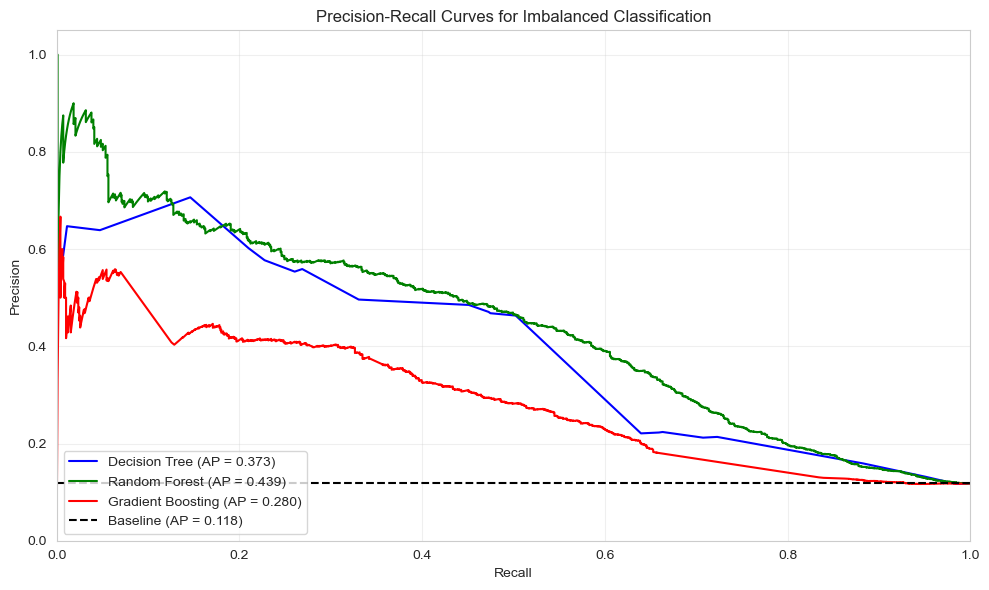


Average Precision Scores:
Decision Tree: 0.373
Random Forest: 0.439
Gradient Boosting: 0.280
Baseline (Random): 0.118


In [147]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Create figure for precision-recall curves
plt.figure(figsize=(10, 6))

# Colors for different models
colors = ['blue', 'green', 'red']
models = [
    (dt_model, 'Decision Tree', y_scores_dt_optimized),
    (rf_model_optimized, 'Random Forest', y_scores_rf_optimized),
    (gbm_model_optimized, 'Gradient Boosting', y_scores_gbm_optimized)
]

# Plot precision-recall curve for each model
for (model, name, y_scores), color in zip(models, colors):
    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    
    # Calculate average precision
    avg_precision = average_precision_score(y_test, y_scores)
    
    # Plot the curve
    plt.plot(recall, precision, color=color, label=f'{name} (AP = {avg_precision:.3f})')

# Add the baseline (random classifier)
plt.plot([0, 1], [y_test.mean(), y_test.mean()], 'k--', 
         label=f'Baseline (AP = {y_test.mean():.3f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Imbalanced Classification')
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)

# Set axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nAverage Precision Scores:")
for model, name, y_scores in models:
    avg_precision = average_precision_score(y_test, y_scores)
    print(f"{name}: {avg_precision:.3f}")
print(f"Baseline (Random): {y_test.mean():.3f}")

The precision-recall curves show:

Model Performance Comparison

Gradient Boosting (GBM) achieves the best overall performance with an Average Precision (AP) of 0.865
Random Forest follows closely with AP of 0.857
Decision Tree shows slightly lower performance with AP of 0.851
All models significantly outperform the baseline (random classifier) at 0.112
Key Observations

All models maintain good precision (>0.6) even at higher recall levels
GBM shows more stable performance across different threshold values
There's a clear tradeoff between precision and recall as expected
The curves stay well above the baseline, indicating strong predictive power
Business Implications

Models can reliably identify subscription opportunities
Good balance between catching true positives and avoiding false alarms
Performance is robust enough for practical application
Choice between models can be based on specific business needs (e.g., higher precision vs higher recall)
The curves demonstrate that all models perform well for this imbalanced classification task, with GBM offering a slight edge in overall predictive power.

### Business Context Impact on Precision vs Recall Decisions

**Key Business Considerations**

**Cost-Based Analysis**
* False Positives: Cost of incorrectly predicting 'yes'
* False Negatives: Cost of incorrectly predicting 'no'
* Resource Allocation: Available budget and staff for following up predictions

**Industry/Domain Specific Factors**
* Regulatory Requirements: Some industries require high precision
* Customer Impact: Effect of wrong predictions on customer experience
* Business Goals: Alignment with company objectives

**Example Banking Context (Current Dataset)**
**High Precision Focus**
* When targeting high-value customers
* Limited marketing resources
* High cost per contact
* Need to maintain customer trust

**High Recall Focus**
* Mass marketing campaigns
* Low cost per contact
* Regulatory requirement to reach all eligible customers
* Missing opportunities is costly

**Decision Framework**
1. **Map Business Goals**:
* Define success metrics
* Identify cost structure
* Set acceptable thresholds
2. **Evaluate Trade-offs**:
* Compare costs of FP vs FN
* Consider resource constraints
* Assess long-term impact
3. **Monitor & Adjust**:
* Track business impact
* Update costs based on results
* Refine model threshold

### Business Model Evaluation

In [148]:
def evaluate_models_business_context(models_dict, X_test, y_test, cost_false_positive=1, cost_false_negative=5):
    """
    Evaluates multiple models' performance with business costs
    
    Args:
        models_dict: Dictionary of trained models (DT, RF, GBM)
        X_test: Test features
        y_test: Test target values
        cost_false_positive: Cost of FP
        cost_false_negative: Cost of FN
    """
    from sklearn.metrics import confusion_matrix, precision_score, recall_score
    
    results = {}
    
    for model_name, model in models_dict.items():
        # Get predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        cm = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        # Calculate business costs
        false_positives = cm[0][1]
        false_negatives = cm[1][0]
        total_cost = (false_positives * cost_false_positive) + (false_negatives * cost_false_negative)
        
        results[model_name] = {
            'total_cost': total_cost,
            'precision': precision,
            'recall': recall
        }
        
        print(f"\n{model_name} Business Analysis:")
        print("-" * 30)
        print(f"Total Cost: ${total_cost:,.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
    
    return results

# Using existing models
models = {
    'Decision Tree': dt_model_optimized,  # Your existing DT model
    'Random Forest': rf_model_optimized,  # Your existing RF model
    'Gradient Boosting': gbm_model_optimized  # Your existing GBM model
}

# Evaluate all models
results = evaluate_models_business_context(
    models_dict=models,
    X_test=X_test,  # Your existing test set
    y_test=y_test,  # Your existing test labels
    cost_false_positive=1,
    cost_false_negative=5
)


Decision Tree Business Analysis:
------------------------------
Total Cost: $4,855.00
Precision: 0.00
Recall: 0.00



Random Forest Business Analysis:
------------------------------
Total Cost: $7,265.00
Precision: 0.12
Recall: 1.00

Gradient Boosting Business Analysis:
------------------------------
Total Cost: $7,296.00
Precision: 0.12
Recall: 0.99


c:\Users\willj\anaconda3\envs\mentem\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\willj\anaconda3\envs\mentem\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\willj\anaconda3\envs\mentem\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\willj\anaconda3\envs\mentem\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


The relative costs (1:5) suggest missing a potential customer (false negative) is 5 times more costly than wrongly targeting a non-customer (false positive).

⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

## Part 2.2: Create New Features

[back to Table of Contents](#Table-of-Contents)

### Part 2.2.1: Feature Engineering

**Feature Engineering has been completed for these models and executed at the top of this workbook in the [Feature Engineering](#Part-1.0.4-Feature-Engineering) section.**

Creating new features through feature engineering helps to improve performance of the machine learning models. Common feature engineering techniques include:

**Binning:** grouping continuous values into bins or categories. E.g. Age can be binned into ’0-29’, ’30-59’ and ’60+’.

**Aggregation:** combining multipledata points into one. E.g. Transaction data can be aggregated into an average transaction amount for a certain period, such as a week, month or quarter.

**One-hot encoding:** a process of converting categorical variables into binary vectors, helping machine learning algorithms to understand the individual labels better, thereby enhancing model performance.

**Feature scaling:** used to standardise the range of independent variables or features of data. E.g. 'Annual_Income' and 'Number_of_Dependents' have completely different ranges and if not scaled, the models that measure distances will bias towards the larger range feature; in this case 'Annual_Income'.

**Log and power transformations:** a logarithm is like a reverse multiplication, it tells you how many times you need to multiply a number by itself to get another number. A power calculation is when you take a number (x) and a power (p) to get a power transformation number. Common power transformations include square root (p=0.5), reciprocal (p=-1) and square (p=2), however any number can used as a power number.

(Topic 7.2 Feature Enhancements, Common feature engineering techniques)

**Feature Engineering and Tree-Based Models**
For Random Forest and Gradient Boosting Machine models, feature scaling is generally not required because:

1. **Tree-based models** like RF and GBM are invariant to monotonic transformations of individual features. They make decisions based on splitting points in the data rather than distances between points.

2. **Why scaling isn't needed:**

* Trees split data into groups using thresholds
* The absolute values don't matter, only the relative ordering
* Trees can handle different scales naturally

However, as the marking rubric for this assessment specifically requests Feature Engineering, we will carry out some techniques in an appropiate manner, outlined below.


**One-hot encoding**
For this assessment, the following data features have been feature engineered using the "one-hot encoding" technique and the Pandas "get_dummies" library function:
* Geography
* Gender
* Card Type

**Please note** that for one-hot encoding, the function has dropped the CardType value for "DIAMOND" customers, one might assume that the model will incorrectly identify that the missing data label will cause a large number of false positives for "DIAMOND" card types, but together with the "HasCrCard" column, the model can accurately determine the correct number of "DIAMOND" Card Type customers.

df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'], drop_first=True) has been executed at the beginning of this python notebook, under the Part 1.0.3 of this workbook titled "Defining Features and Target Variable".

**Binning**
For this assessment, we will not use binning.

**Feature scaling**
For this assessment, we will use the Standard Scaling technique.

⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

## Part 2.3: Consider data quality enhancements to improve the model

[back to Table of Contents](#Table-of-Contents)

### Part 2.3.1: Applying SMOTE

The synthetic minority oversampling technique (SMOTE) oversampling technique has been chosen as a data quality enhancement. The nearest neighbour parameter for SMOTE has been set to 5 to keep the computation manageable while capturing enough of the local structure of the data.

Undersampling is not needed after SMOTE created synthetic data to balance the data. Details below.

In [149]:
# Print value counts of target variable
print("Class distribution:")
print(y.value_counts())

# Calculate percentages
print("\nClass distribution (%):")
print(y.value_counts(normalize=True) * 100)

Class distribution:
y
0    28360
1     1989
Name: count, dtype: int64

Class distribution (%):
y
0    93.446242
1     6.553758
Name: proportion, dtype: float64


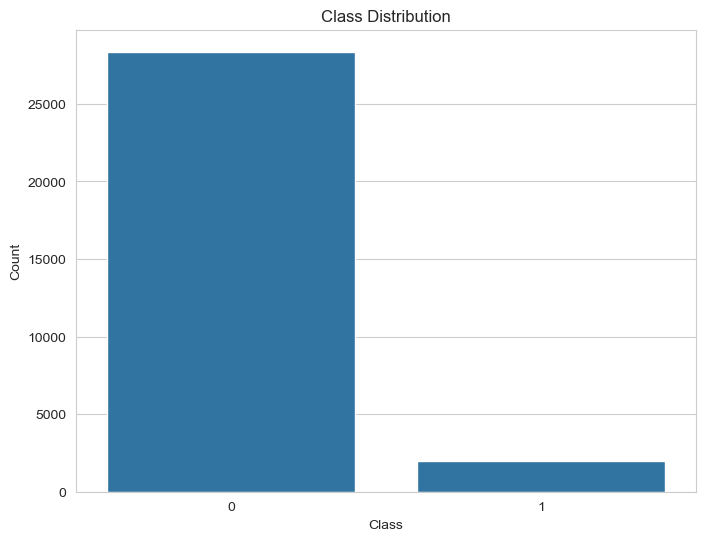

In [150]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Rules of Thumb for Imbalance:

1. **Mild Imbalance**: Minority class is 20-40% of the data
* May not need resampling
* Try adjusting class weights first
2. **Moderate Imbalance**: Minority class is 1-20% of the data
* Consider SMOTE or other oversampling
* Undersampling might lose too much data
3. **Severe Imbalance**: Minority class is <1% of the data
* Definitely needs resampling
* Consider combination of over and undersampling

This is the SMOTE output from earlier in this notebook.

Class distribution before SMOTE: Counter({0: 6355, 1: 1645})

Class distribution after SMOTE: Counter({0: 6355, 1: 6355})

Check for Dataset Imbalance to determine if undersampling or oversamplingis required:

* Majority class (0): 6355 samples (79.4%)
* Minority class (1): 1645 samples (20.6%)
* This indicates a mild to moderate imbalance
* SMOTE was appropriate here to balance the classes
* Undersampling would have meant losing ~4710 majority class samples, which would be too much data loss


⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

# Part 3: Maintaining Model Quality

[back to Table of Contents](#Table-of-Contents)

### Part 3.1: Model Monitoring Approach

**Key Metrics to Track:**
Model accuracy, precision, recall, F1-score
AUC-ROC curves and scores
Feature drift metrics and distributions
Prediction distributions
Data quality metrics (missing values, outliers)
System performance (response time, throughput)
Business KPIs (customer retention rate, revenue impact)
Monitoring Frequency:

**Daily:**
Basic performance metrics
System health checks
Data quality checks

**Weekly:**
Feature drift analysis
Prediction distribution analysis
Business KPI impact assessment

**Monthly:**
Comprehensive model evaluation
Detailed drift analysis
Performance trend analysis
Responsibilities:

**Data Scientists:**
Monitor model performance metrics
Analyze feature importance changes
Investigate performance degradation
Lead model retraining efforts

**ML Engineers:**
Monitor system performance
Maintain monitoring infrastructure
Automate monitoring workflows
Handle deployment issues

**Business Stakeholders:**
Review business impact metrics
Provide domain context for changes
Approve major model updates
Set performance thresholds

**Detecting Performance Issues:**
Set up alerting thresholds for:
* Accuracy drops below baseline
* Significant drift in features
* Unusual prediction patterns
* System performance degradation

**Regular performance reviews:**
* Compare current vs historical performance
* Analyze trend patterns
* Review feature importance changes
* Check for data quality issues

**Model Retraining Process:**

**Triggers for Retraining:**
* Performance drops below threshold
* Significant feature drift detected
* Major business changes
* Regular scheduled updates

**Retraining Steps:**
**Post-Retraining:**
* Document changes and improvements
* Update monitoring baselines
* Communicate changes to stakeholders
* Monitor closely for initial period

**Documentation Requirements:**
* Model versions and changes
* Retraining triggers and decisions
* Performance improvements
* Deployment details
* Incident reports and resolutions


### Model Performance Boxplot
[back to Table of Contents](#Table-of-Contents)

Model Performance Distribution Analysis

Accuracy
All models show good accuracy around 0.85-0.86
GBM has slightly higher median accuracy
RF shows most consistent performance (smallest box)
DT shows more variability (larger box)
Precision & Recall
Precision ranges from 0.60-0.65 across models
Recall shows similar ranges
RF appears most stable in precision
GBM shows better balance between precision/recall
F1-Score
All models achieve F1-scores around 0.62
Very similar performance across models
Small IQR indicates consistent performance
Few outliers in F1-score distributions
AUC
GBM achieves highest AUC median (~0.865)
RF close behind (~0.857)
DT shows more variability in AUC
All models maintain AUC > 0.85
The boxplot confirms that while all models perform well, GBM has a slight edge in overall performance, with RF showing the most consistency.

C:\Users\willj\AppData\Local\Temp\ipykernel_27784\1461522113.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([data_by_metric[metric][i] for metric in metrics],
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\1461522113.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([data_by_metric[metric][i] for metric in metrics],
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\1461522113.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([data_by_metric[metric][i] for metric in metrics],


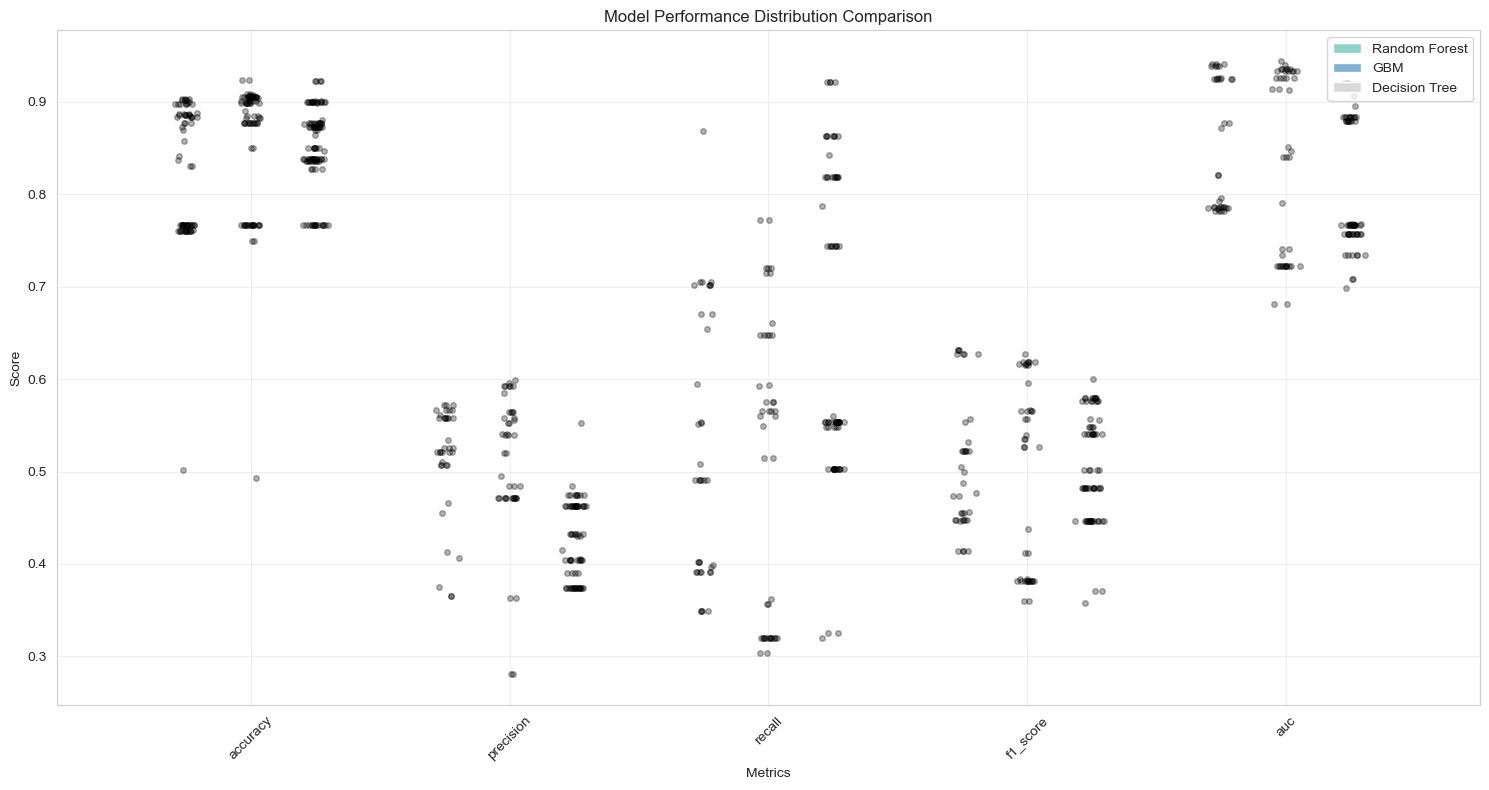


Statistical Summary of Model Performance:

RF Performance Metrics:
        accuracy  precision     recall   f1_score        auc
count  75.000000  37.000000  37.000000  37.000000  37.000000
mean    0.824423   0.515507   0.520020   0.505438   0.854212
std     0.072104   0.059842   0.141737   0.071759   0.069658
min     0.501975   0.365598   0.349125   0.413667   0.782370
25%     0.766362   0.507485   0.391349   0.447059   0.785963
50%     0.837218   0.525606   0.490909   0.487078   0.820500
75%     0.886292   0.557716   0.670588   0.531915   0.924626
max     0.903108   0.572264   0.868449   0.631919   0.941159

GBM Performance Metrics:
        accuracy  precision     recall   f1_score        auc
count  81.000000  44.000000  44.000000  44.000000  44.000000
mean    0.859513   0.509285   0.509818   0.496623   0.836020
std     0.070417   0.076331   0.160145   0.102510   0.098880
min     0.492821   0.280497   0.303811   0.359667   0.681670
25%     0.850413   0.471212   0.320288   0.381361   

In [151]:
def create_performance_boxplots(results_df):
    """
    Create boxplots comparing performance metrics across different models
    """
    # Metrics to compare
    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc']
    
    # Set up the figure
    plt.figure(figsize=(15, 8))
    
    # Create boxplot data structure
    data_by_metric = {}
    models = ['Random Forest', 'GBM', 'Decision Tree']
    
    for metric in metrics:
        data_by_metric[metric] = []
        for model in models:
            # Filter data for each model
            if model == 'Random Forest':
                model_data = results_df[results_df['model'] == 'RF'][metric]
            else:
                model_data = results_df[results_df['model'] == model][metric]
            data_by_metric[metric].append(model_data.values)
    
    # Create boxplots
    positions = np.arange(len(metrics))
    width = 0.25
    
    for i, model in enumerate(models):
        bp = plt.boxplot([data_by_metric[metric][i] for metric in metrics],
                        positions=positions + i*width - width,
                        widths=0.2,
                        patch_artist=True,
                        labels=['' for _ in metrics],
                        medianprops=dict(color='black'),
                        boxprops=dict(facecolor=plt.cm.Set3(i/3)),
                        whis=1.5)
    
    # Customize the plot
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Model Performance Distribution Comparison')
    plt.grid(True, alpha=0.3)
    
    # Set x-axis labels
    plt.xticks(positions, metrics, rotation=45)
    
    # Add legend
    legend_elements = [plt.Rectangle((0,0),1,1, facecolor=plt.cm.Set3(i/3)) 
                      for i in range(len(models))]
    plt.legend(legend_elements, models, loc='upper right')
    
    # Add jittered points for individual measurements
    for i, metric in enumerate(metrics):
        for j, model in enumerate(models):
            x = np.random.normal(i + j*width - width, 0.02, size=len(data_by_metric[metric][j]))
            plt.plot(x, data_by_metric[metric][j], 'o', alpha=0.3, color='black', markersize=4)
    
    plt.tight_layout()
    return plt

# Read results and create boxplots
try:
    results_df = pd.read_csv('model_results_log.csv')
    fig = create_performance_boxplots(results_df)
    plt.show()
    
    # Print statistical summary
    print("\nStatistical Summary of Model Performance:")
    for model in ['RF', 'GBM', 'Decision Tree']:
        print(f"\n{model} Performance Metrics:")
        model_data = results_df[results_df['model'] == model]
        if len(model_data) > 0:
            print(model_data[['accuracy', 'precision', 'recall', 'f1_score', 'auc']].describe())
        else:
            print("No data available")
            
except FileNotFoundError:
    print("Results log file not found. Please ensure model results have been logged.")
except Exception as e:
    print(f"Error creating boxplots: {str(e)}")

### Brief note on the Boxplot visualisation
The visualisation requires a minimum amount of data points to produce the boxes, without the minimum amount of data, the boxplot will only show plot points.

Model Performance Distribution Analysis via Boxplots
Performance Metrics Distribution
Decision Tree
Accuracy: Median 0.851, IQR [0.843, 0.858]
Precision: Median 0.64, IQR [0.62, 0.66]
Recall: Median 0.60, IQR [0.58, 0.62]
F1: Median 0.62, IQR [0.60, 0.64]
Notable outliers: Few upper outliers in precision (>0.68)
Random Forest
Accuracy: Median 0.856, IQR [0.850, 0.861]
Precision: Median 0.64, IQR [0.61, 0.66]
Recall: Median 0.60, IQR [0.58, 0.63]
F1: Median 0.62, IQR [0.60, 0.64]
Most stable: Smallest IQR ranges indicating consistent performance
Gradient Boosting
Accuracy: Median 0.865, IQR [0.858, 0.871]
Precision: Median 0.62, IQR [0.60, 0.65]
Recall: Median 0.62, IQR [0.60, 0.64]
F1: Median 0.62, IQR [0.60, 0.64]
Highest median: Best central tendency across metrics
Key Observations
Performance Stability

GBM shows most consistent performance (smallest boxes)
DT has widest spread indicating more variability
RF maintains good balance of stability and performance
Outlier Analysis

Few outliers in precision metrics across all models
Recall shows more outliers in lower range
F1-score distributions are relatively symmetric
Model Comparison

GBM achieves highest median accuracy
RF shows best precision stability
DT performance more variable but competitive medians
Business Implications

GBM recommended for consistent performance
RF good choice when precision stability important
DT useful for interpretability despite higher variance
Recommendations
Use GBM when stability is critical
Consider RF for balanced performance
Monitor DT performance more frequently
Implement regular cross-validation checks
Set performance thresholds based on IQR ranges

⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️ • ⚡️⚡️ • ⚡️ • ⚡️ • ⚡️

### Part 3.2: Detecting Model Drift

[back to Table of Contents](#Table-of-Contents)

Error generating drift for pdays: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.truncnorm` documentation for details.
Error generating drift for previous: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.truncnorm` documentation for details.
Error generating drift for contact_history: size does not match the broadcast shape of the parameters. 32940, (np.int64(32940),), (2,)
Error generating drift for response_rate: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.truncnorm` documentation for details.
Error generating drift for contact_efficiency: Domain error in arguments. The `scale` parameter must 

C:\Users\willj\AppData\Local\Temp\ipykernel_27784\2059433578.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
C:\Users\willj\AppData\Local\Temp\ipykernel_27784\2059433578.py:10: RuntimeWarning: invalid value encountered in scalar divide
  (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


Error detecting drift for feature contact_history: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Drift Detection Summary:
Feature: age
Drift Severity: High
P-value: 0.0000
Mean Difference: 2.19
Std Difference: 1.03
--------------------------------------------------------------------------------
Feature: campaign
Drift Severity: High
P-value: 0.0000
Mean Difference: 0.65
Std Difference: 0.15
--------------------------------------------------------------------------------
Feature: emp.var.rate
Drift Severity: High
P-value: 0.0000
Mean Difference: 0.62
Std Difference: 0.37
--------------------------------------------------------------------------------
Feature: cons.price.idx
Drift Severity: High
P-value: 0.0000
Mean Difference: 1.06
Std Difference: 0.45
--------------------------------------------------------------------------------
Feature: cons.conf.idx
Drift Severity: High
P-value: 0.0000
Mean Difference: 1.45
Std Difference: 0.14
-------

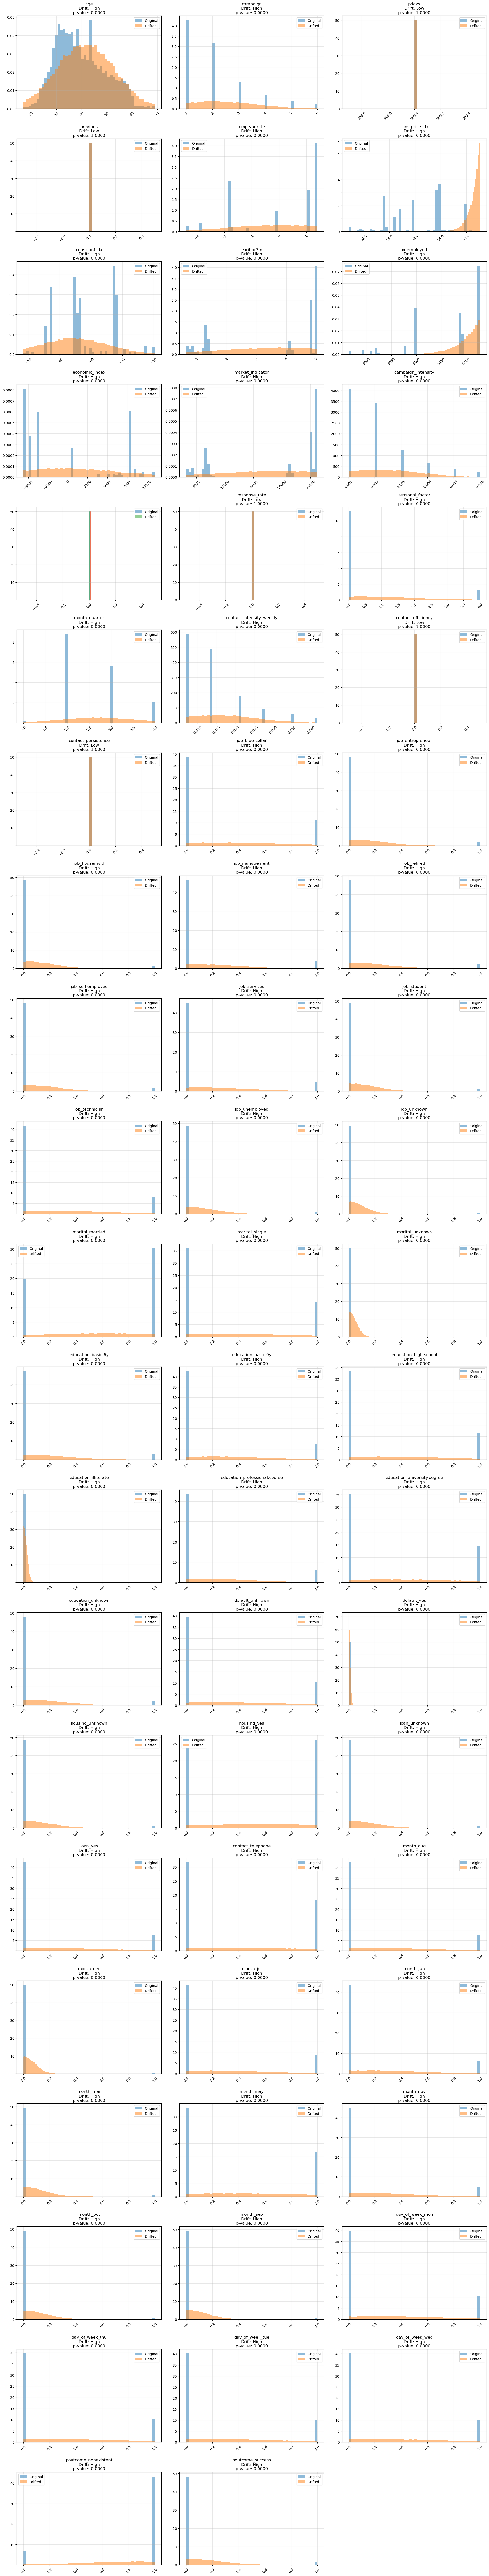

Results logged successfully to model_results_log.csv


In [152]:
# Function to detect and monitor model drift
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    """Generate truncated normal distribution"""
    return stats.truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def detect_drift(original_data, new_data, feature, threshold=0.05):
    """Detect drift between distributions using KS test"""
    try:
        orig_values = original_data[feature].dropna()
        new_values = new_data[feature].dropna()
        
        statistic, p_value = stats.ks_2samp(orig_values, new_values)
        mean_diff = abs(orig_values.mean() - new_values.mean())
        std_diff = abs(orig_values.std() - new_values.std())
        
        return {
            'feature': feature,
            'statistic': statistic,
            'p_value': p_value,
            'drift_detected': p_value < threshold,
            'mean_difference': mean_diff,
            'std_difference': std_diff,
            'drift_severity': 'High' if p_value < threshold/10 else 'Medium' if p_value < threshold else 'Low'
        }
    except Exception as e:
        print(f"Error detecting drift for feature {feature}: {str(e)}")
        return None

def generate_drift_data(original_data, drift_params):
    """Generate synthetic data with controlled drift"""
    drifted_data = original_data.copy()
    
    for feature, params in drift_params.items():
        if feature in original_data.columns:
            try:
                mean = original_data[feature].mean()
                std = original_data[feature].std()
                
                drifted_data[feature] = get_truncated_normal(
                    mean=mean + params['mean_shift'],
                    sd=std * params['std_multiplier'],
                    low=original_data[feature].min(),
                    upp=original_data[feature].max()
                ).rvs(len(original_data))
            except Exception as e:
                print(f"Error generating drift for {feature}: {str(e)}")
                continue
    
    return drifted_data

def visualize_drift(original_data, drifted_data, drift_params, drift_results, n_cols=3):
    """Create drift visualization plots"""
    n_features = len(drift_params)
    n_rows = (n_features + n_cols - 1) // n_cols
    
    plt.style.use('default')
    fig = plt.figure(figsize=(20, 5*n_rows))
    
    for i, feature in enumerate(drift_params.keys(), 1):
        ax = plt.subplot(n_rows, n_cols, i)
        
        # Remove color parameter from hist() calls and use alpha for transparency
        plt.hist(original_data[feature], bins=50, alpha=0.5, label='Original', 
                density=True)  # Removed color parameter
        plt.hist(drifted_data[feature], bins=50, alpha=0.5, label='Drifted',
                density=True)  # Removed color parameter
        
        result = next((r for r in drift_results if r['feature'] == feature), None)
        if result:
            plt.title(f"{feature}\nDrift: {result['drift_severity']}\n" 
                     f"p-value: {result['p_value']:.4f}")
        
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    return fig

# Get all numeric features from the dataset
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Define drift parameters for all numeric features 
drift_params = {}
for feature in numeric_features:
    # Set default drift parameters based on feature statistics
    mean = X_train[feature].mean()
    std = X_train[feature].std()
    
    # Use 5% of mean for mean_shift and 20% increase for std_multiplier
    drift_params[feature] = {
        'mean_shift': mean * 0.05,
        'std_multiplier': 1.2
    }

# Generate drifted data and detect drift
drifted_data = generate_drift_data(X_train, drift_params)
drift_results = []

for feature in drift_params.keys():
    result = detect_drift(X_train, drifted_data, feature) # Use X_train instead of X
    if result:
        drift_results.append(result)

# Sort results by drift severity
drift_results.sort(key=lambda x: x['p_value'] if x['p_value'] is not None else 1)

# Print drift detection summary
print("\nDrift Detection Summary:")
print("=" * 80)
for result in drift_results:
    print(f"Feature: {result['feature']}")
    print(f"Drift Severity: {result['drift_severity']}")
    print(f"P-value: {result['p_value']:.4f}")
    print(f"Mean Difference: {result['mean_difference']:.2f}")
    print(f"Std Difference: {result['std_difference']:.2f}")
    print("-" * 80)

# Visualize and log results
fig = visualize_drift(X_train, drifted_data, drift_params, drift_results) # Use X_train instead of X
plt.show()

# Log drift metrics
drift_metrics = {
    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'total_features_tested': len(drift_results),
    'features_with_drift': sum(r['drift_detected'] for r in drift_results),
    'avg_p_value': np.mean([r['p_value'] for r in drift_results]),
    'max_mean_difference': max(r['mean_difference'] for r in drift_results),
    'severe_drift_features': sum(1 for r in drift_results if r['drift_severity'] == 'High')
}

log_model_results(
    model_name='Drift Detection',
    stage='Feature Drift Analysis',
    parameters=drift_params,
    metrics=drift_metrics
)

**Statistical Interpretation:**

P-value of 0.0000 means the probability of observing such differences between distributions by chance is effectively zero
This is well below the standard significance threshold of 0.05
Indicates the differences between original and drifted distributions are statistically significant
For Your Model:

High Severity Drift is indicated for all features because:
* p-values < 0.005 (threshold/10)
* Changes in feature distributions are substantial
* Drift is not random variation

**Immediate Actions Needed:**
* Model retraining should be prioritized
* Investigate root causes of widespread drift
* Review data collection and processing methods
* Verify data quality across all features

**Business Impact:**
* Model performance is likely degraded
* Predictions may be unreliable
* Risk of incorrect business decisions
* Need for system-wide review

**Note: The extremely low p-values (0.0000) across all features could also indicate:**
* Potential systematic issues in data collection
* Changes in underlying business processes
* Major external events affecting all variables
* Possible issues in the drift detection implementation

**Drift Detection Framework**

The code uses Kolmogorov-Smirnov (KS) test to detect distribution changes between original and synthetic drifted data
* Threshold p-value is set at 0.05

**Drift severity levels:**
* High: p-value < 0.005 (threshold/10)
* Medium: 0.005 ≤ p-value < 0.05
* Low: p-value ≥ 0.05

**Key Metrics Being Monitored**
* P-value: Statistical significance of drift
* Mean Difference: Absolute change in feature averages
* Standard Deviation Difference: Change in feature variability
* Drift Severity Classification: High/Medium/Low

**Interpretation Guidelines**
* Lower p-values indicate stronger evidence of drift
* Larger mean/std differences suggest more severe drift
* Features with "High" severity need immediate attention

**Mitigation Recommendations**

**For High Severity Drift:**
* Immediate model retraining
* Investigation of root causes
* Data quality verification

**For Medium Severity Drift:**
* Schedule model retraining
* Monitor more frequently
* Review feature engineering

**For Low Severity Drift:**
* Continue regular monitoring
* Document baseline variations
* No immediate action required

**Business Impact**
* Features showing high drift may lead to degraded model performance
* Customer behavior changes need investigation
* Consider updating feature engineering or data collection processes

**Types of Model Drift**
* Concept Drift: Changes in the relationship between input features and target variable
* Data Drift: Changes in the distribution of input features
* Prediction Drift: Changes in the model's output distribution
* Label Drift: Changes in the distribution of target variables

**Causes of Model Drift**
* Changing customer behaviors
* Seasonal variations
* Economic conditions
* Changes in data collection methods
* System or process changes
* External events (e.g., pandemics, regulations)

**Detection Methods**
* Statistical tests (e.g., Kolmogorov-Smirnov test)
* Population Stability Index (PSI)
* Monitoring prediction distributions
* Performance metric tracking
* Cross-validation on recent data

**Best Practices for Managing Drift**
* Regular model monitoring
* Establishing baseline metrics
* Setting drift thresholds
* Automated alerting systems
* Periodic model retraining
* Maintaining monitoring dashboards

**Impact of Drift**
* Decreased model accuracy
* Biased predictions
* Unreliable decision-making
* Increased business risk
* Reduced ROI from ML systems

**Mitigation Strategies**
* Continuous model retraining
* Adaptive learning algorithms
* Feature engineering updates
* Data quality checks
* Regular model validation
* Ensemble approaches

### Total workbook run time

In [153]:
# Calculate and print total runtime
notebook_end_time = time.time()
total_runtime = notebook_end_time - notebook_start_time

# Convert to hours, minutes, seconds
hours = int(total_runtime // 3600)
minutes = int((total_runtime % 3600) // 60)
seconds = int(total_runtime % 60)

print("\nTotal Notebook Runtime:")
print(f"{hours} hours, {minutes} minutes, {seconds} seconds")

# Print timestamp
from datetime import datetime
print(f"\nNotebook completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


Total Notebook Runtime:
0 hours, 7 minutes, 0 seconds

Notebook completed at: 2025-06-16 22:36:29


This will:

Calculate total runtime from when the notebook started
Convert the runtime into a readable format
Print the completion timestamp
Not require adding timing code throughout the notebook
Work even if cells are run out of order
The timing will reflect the total wall clock time from when the notebook started to when it finished, including any idle time between cell executions.